# 2010 Baja CA EQ: QTM Catalog Analysis



In [1]:
# IMPORT CELL

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats

import obspy
from obspy.core import UTCDateTime
from obspy import read

import seaborn as sns
import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

print("Imported!")

Imported!


In [2]:
%%time
# QTM catalog: read-in cell

QTM_Data = pd.read_csv("qtm_final_9.5dev.hypo", sep = "\s+")

Wall time: 13.4 s


In [3]:
QTM_Data.head()
QTM_Data.shape

(1811362, 17)

In [4]:
# Prep QTM catalog for analysis

QTM_TEST = QTM_Data.copy(deep = False) # shallow copy of QTM data
QTM_TEST.head()
QTM_TEST.shape

(1811362, 17)

In [5]:
# Baja CA EQ: read-in cell

# Baja CA Earthquake data:
# Date/Time: 2010-04-04 22:40:42 (UTC)
# Coords/Depth: 32.286N 115.295W, 10.0 km depth
# Magnitude: 7.2

# Baja data as a list:
BajaData = [2010, 4, 4, 22, 40, 42, "", 32.286, -115.295, 10.0, 7.2, "", "", "", "", "", ""]
#type(BajaDataRow)

#Baja data as a pd.series?
BajaDataSeries = pd.Series(BajaData, index = QTM_TEST.columns)
#BajaDataSeries

In [6]:
# Append Baja EQ to dataframe
QTM_TEST_1 = QTM_TEST.append(BajaDataSeries, ignore_index = True)

# STEPS FROM HERE
# Add a column: POSIX timestamp? CHECK!
# Loop through each row to give POSIX timestamps using UTCDateTime()
# Index by timestamp

In [7]:
%%time
# SAMPLE CELL

#len(QTM_TEST.columns)
#QTM_TEST.insert(len(QTM_TEST.columns), "Time", 1)
#QTM_TEST = QTM_TEST.drop(["Time"], axis = 1)

#QTM_TEST['POSIX TIME'] = UTCDateTime(QTM_TEST['YEAR'], QTM_TEST['MONTH'], \
#                                     QTM_TEST['DAY'], QTM_TEST['HOUR'], \
#                                     QTM_TEST['MINUTE'], QTM_TEST['SECOND'])

#print(range(len(QTM_TEST)))
#print(QTM_TEST.index)

#for i in QTM_TEST.index:
    #QTM_TEST['POSIX TIME'][i] = UTCDateTime(QTM_TEST['YEAR'][i], QTM_TEST['MONTH'][i], \
    #                                       QTM_TEST['DAY'][i], QTM_TEST['HOUR'][i], \
    #                                        QTM_TEST['MINUTE'][i], QTM_TEST['SECOND'][i])
    #print(QTM_TEST['POSIX TIME'][i])

# testing with samples    
Sample = QTM_TEST_1[:100000]    

# x = row
Sample['POSIX TIME'] = Sample.apply(lambda x : UTCDateTime(int(x['YEAR']), int(x['MONTH']), int(x['DAY']), 
                                    int(x['HOUR']), int(x['MINUTE']), x['SECOND']), axis = 1 )
Sample.head()    
#QTM_TEST['POSIX TIME'] = 
#QTM_TEST.head()

Wall time: 4.6 s


,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,MAGNITUDE,MAGP5,MAGP95,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME
0,2008,1,1,0,1,31.150,1,36.00636,-117.80533,1.694,-0.33,-0.65,0.09,14234568,0.26,0.022,0,2008-01-01T00:01:31.150000Z
1,2008,1,1,0,4,12.531,2,33.26719,-116.28997,11.567,0.78,0.59,0.9,37614600,0.348,0.026,1,2008-01-01T00:04:12.531000Z
2,2008,1,1,0,4,18.539,3,33.45944,-116.58639,10.438,0.37,0.27,0.48,10310729,0.515,0.018,1,2008-01-01T00:04:18.539000Z
3,2008,1,1,0,7,32.377,4,33.59068,-116.63390,13.378,0.38,0.28,0.47,37190560,0.404,0.017,1,2008-01-01T00:07:32.377000Z
4,2008,1,1,0,13,35.803,5,33.49738,-116.57621,7.997,-0.27,-0.41,-0.13,10297685,0.182,0.018,1,2008-01-01T00:13:35.803000Z


In [8]:
# Cleanup cell
# Another dataframe
# ERROR when running next cell's code: some minutes/second <0, >59
QTM_TEST_2 = QTM_TEST_1.loc[QTM_TEST_1['MINUTE'] < 60] 
QTM_TEST_2 = QTM_TEST_2.loc[QTM_TEST_2['MINUTE'] >= 0]
QTM_TEST_2 = QTM_TEST_2.loc[QTM_TEST_2['SECOND'] < 60]
QTM_TEST_2 = QTM_TEST_2.loc[QTM_TEST_2['SECOND'] >= 0]
QTM_TEST_2.head()
#QTM_TEST_2.shape

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,MAGNITUDE,MAGP5,MAGP95,TEMPLATEID,STACKCC,MAD,RELOCATED?
0,2008,1,1,0,1,31.150,1,36.00636,-117.80533,1.694,-0.33,-0.65,0.09,14234568,0.26,0.022,0
1,2008,1,1,0,4,12.531,2,33.26719,-116.28997,11.567,0.78,0.59,0.9,37614600,0.348,0.026,1
2,2008,1,1,0,4,18.539,3,33.45944,-116.58639,10.438,0.37,0.27,0.48,10310729,0.515,0.018,1
3,2008,1,1,0,7,32.377,4,33.59068,-116.63390,13.378,0.38,0.28,0.47,37190560,0.404,0.017,1
4,2008,1,1,0,13,35.803,5,33.49738,-116.57621,7.997,-0.27,-0.41,-0.13,10297685,0.182,0.018,1


In [9]:
%%time
# Unix time creation cell: .apply() function
# MOST TIME-CONSUMING; TRY VECTORIZATION

QTM_TEST_2['POSIX TIME'] = QTM_TEST_2.apply(lambda x : UTCDateTime(int(x['YEAR']), int(x['MONTH']), int(x['DAY']), 
                                                               int(x['HOUR']), int(x['MINUTE']), x['SECOND']), 
                                                               axis = 1)
# Adding their UNIX timestamp to each earthquake; ~50 seconds to run
QTM_TEST_2.head()

Wall time: 1min 24s


,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,MAGNITUDE,MAGP5,MAGP95,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME
0,2008,1,1,0,1,31.150,1,36.00636,-117.80533,1.694,-0.33,-0.65,0.09,14234568,0.26,0.022,0,2008-01-01T00:01:31.150000Z
1,2008,1,1,0,4,12.531,2,33.26719,-116.28997,11.567,0.78,0.59,0.9,37614600,0.348,0.026,1,2008-01-01T00:04:12.531000Z
2,2008,1,1,0,4,18.539,3,33.45944,-116.58639,10.438,0.37,0.27,0.48,10310729,0.515,0.018,1,2008-01-01T00:04:18.539000Z
3,2008,1,1,0,7,32.377,4,33.59068,-116.63390,13.378,0.38,0.28,0.47,37190560,0.404,0.017,1,2008-01-01T00:07:32.377000Z
4,2008,1,1,0,13,35.803,5,33.49738,-116.57621,7.997,-0.27,-0.41,-0.13,10297685,0.182,0.018,1,2008-01-01T00:13:35.803000Z


In [10]:
# Float timestamp cell

QTM_TEST_2['TIMESTAMP'] = QTM_TEST_2['POSIX TIME'].apply(lambda x : x.timestamp)
QTM_TEST_2.tail()

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,MAGNITUDE,MAGP5,MAGP95,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP
1811358,2017,12,31,23,43,3.831,37844223,33.49740,-116.52822,10.157,0.84,0.84,0.84,37844223,1.0,0.01,1,2017-12-31T23:43:03.831000Z,1.514764e+09
1811359,2017,12,31,23,44,19.261,1774273,33.49404,-116.52622,10.177,-0.52,-0.7,-0.33,37833447,0.251,0.018,1,2017-12-31T23:44:19.261000Z,1.514764e+09
1811360,2017,12,31,23,50,21.250,1774274,33.04985,-116.42122,9.809,0.02,-0.17,0.18,14892036,0.21,0.022,0,2017-12-31T23:50:21.250000Z,1.514764e+09
1811361,2017,12,31,23,53,10.630,1774275,35.89807,-117.91783,3.262,-0.51,-0.65,-0.39,37693248,0.326,0.022,0,2017-12-31T23:53:10.630000Z,1.514764e+09
1811362,2010,4,4,22,40,42.000,,32.28600,-115.29500,10.000,7.20,,,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09


In [11]:
# Unix time creation cell: Jesse's function for vectorizing

def timestamps(input_tuple):
    return UTCDateTime(input_tuple[0], input_tuple[1], input_tuple[2], 
                       input_tuple[3], input_tuple[4], input_tuple[5], input_tuple[6])

#QTM_TEST_2["SECOND"]

In [12]:
%%time 
# ^^ this checks time?
# Unix time creation cell: Jesse's vectorizing
# Save some time?

tmp = QTM_TEST_2["SECOND"]
secint = [ int(math.modf(tmp.values[i])[1]) for i in range(len(tmp)) ]
secfrac = [ int(math.modf(tmp.values[i])[0]*1e6) for i in range(len(tmp)) ]
inputs = np.array(list(zip(QTM_TEST_2["YEAR"].astype(int), QTM_TEST_2["MONTH"].astype(int), 
                           QTM_TEST_2["DAY"].astype(int), QTM_TEST_2["HOUR"].astype(int), 
                           QTM_TEST_2["MINUTE"].astype(int), secint, secfrac)))
# ERROR HERE: won't work unless I do .astype(int) on ["SECOND"] as well
# Ryo Okuwaki helped with cleaning this up
outputs = np.apply_along_axis(timestamps, 1, inputs)

Wall time: 31.6 s


In [13]:
QTM_TEST_2['VECTORIZATION'] = outputs
QTM_TEST_2["VTIMESTAMP"] = QTM_TEST_2["VECTORIZATION"].apply(lambda x : x.timestamp)
QTM_TEST_2.head()
#type(outputs[0])

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,MAGP5,MAGP95,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP
0,2008,1,1,0,1,31.150,1,36.00636,-117.80533,1.694,...,-0.65,0.09,14234568,0.26,0.022,0,2008-01-01T00:01:31.150000Z,1.199146e+09,2008-01-01T00:01:31.149999Z,1.199146e+09
1,2008,1,1,0,4,12.531,2,33.26719,-116.28997,11.567,...,0.59,0.9,37614600,0.348,0.026,1,2008-01-01T00:04:12.531000Z,1.199146e+09,2008-01-01T00:04:12.531000Z,1.199146e+09
2,2008,1,1,0,4,18.539,3,33.45944,-116.58639,10.438,...,0.27,0.48,10310729,0.515,0.018,1,2008-01-01T00:04:18.539000Z,1.199146e+09,2008-01-01T00:04:18.539000Z,1.199146e+09
3,2008,1,1,0,7,32.377,4,33.59068,-116.63390,13.378,...,0.28,0.47,37190560,0.404,0.017,1,2008-01-01T00:07:32.377000Z,1.199146e+09,2008-01-01T00:07:32.377000Z,1.199146e+09
4,2008,1,1,0,13,35.803,5,33.49738,-116.57621,7.997,...,-0.41,-0.13,10297685,0.182,0.018,1,2008-01-01T00:13:35.803000Z,1.199146e+09,2008-01-01T00:13:35.802999Z,1.199146e+09


In [14]:
# Sort in Baja EQ
QTM_FULL = QTM_TEST_2.sort_values(by = ["TIMESTAMP"], ascending = True)
NewIndices = list(range(len(QTM_FULL)))
QTM_FULL = QTM_FULL.set_index([NewIndices]) # Reset indices
QTM_FULL.tail()

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,MAGP5,MAGP95,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP
1811353,2017,12,31,23,41,36.428,37844215,33.49749,-116.52836,10.230,...,0.36,0.36,37844215,1.0,0.01,1,2017-12-31T23:41:36.428000Z,1.514764e+09,2017-12-31T23:41:36.427999Z,1.514764e+09
1811354,2017,12,31,23,43,3.831,37844223,33.49740,-116.52822,10.157,...,0.84,0.84,37844223,1.0,0.01,1,2017-12-31T23:43:03.831000Z,1.514764e+09,2017-12-31T23:43:03.831000Z,1.514764e+09
1811355,2017,12,31,23,44,19.261,1774273,33.49404,-116.52622,10.177,...,-0.7,-0.33,37833447,0.251,0.018,1,2017-12-31T23:44:19.261000Z,1.514764e+09,2017-12-31T23:44:19.260999Z,1.514764e+09
1811356,2017,12,31,23,50,21.250,1774274,33.04985,-116.42122,9.809,...,-0.17,0.18,14892036,0.21,0.022,0,2017-12-31T23:50:21.250000Z,1.514764e+09,2017-12-31T23:50:21.250000Z,1.514764e+09
1811357,2017,12,31,23,53,10.630,1774275,35.89807,-117.91783,3.262,...,-0.65,-0.39,37693248,0.326,0.022,0,2017-12-31T23:53:10.630000Z,1.514764e+09,2017-12-31T23:53:10.630000Z,1.514764e+09


In [15]:
# Define an event in the Baja EQ time range
#QTM_Range = QTM_FULL.loc[QTM_FULL["EVENTID"] == ""] # Get Baja EQ
#BajaIndex = QTM_Range.index[0]
#print(BajaIndex - 20)
#for i in range(30): # Get the 30 EQs that came before Baja EQ
#    QTM_Range = QTM_Range.append(QTM_FULL.loc[BajaIndex - i - 1])
        
#for i in range(30): # Get the 30 EQs that came after Baja EQ
#    QTM_Range = QTM_Range.append(QTM_FULL.loc[BajaIndex + i + 1])
    
# 30d*24hr*60m*60s
#print(30*24*60*60)
#QTM_Range   

In [16]:
# Define an event in the Baja EQ time range!
QTM_Range = QTM_FULL.loc[QTM_FULL["EVENTID"] == ""] # Get Baja EQ
BajaTimestamp = float(QTM_Range["TIMESTAMP"])
#print("EQ Timestamp:", BajaTimestamp)
#print("Add/subtract by this many seconds for 30 day timeframe:")
Amount = 30*24*60*60 # 30d*24hr*60min*60sec
#print(Amount)
Over = BajaTimestamp + Amount # Up to this timestamp after Baja EQ
Under = BajaTimestamp - Amount # Down to this timestamp before Baja EQ

QTM_Range = QTM_Range.append(QTM_FULL.loc[(QTM_FULL["TIMESTAMP"] >= Under)]) # Get EQs from a month before on
QTM_Range = QTM_Range.loc[QTM_Range["TIMESTAMP"] <= Over] # Only include EQs from up to a month after
QTM_Range = QTM_Range.sort_index() # Resort by index for chronological order

print(BajaTimestamp)
QTM_Range # Verify that I have all data only from one month before and one month after Baja EQ!

1270420842.0


,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,MAGP5,MAGP95,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP
341563,2010,3,5,22,40,56.570,332205,33.63921,-116.69371,16.395,...,-0.22,0.28,11023517,0.208,0.021,0,2010-03-05T22:40:56.570000Z,1.267829e+09,2010-03-05T22:40:56.570000Z,1.267829e+09
341564,2010,3,5,22,44,28.810,332206,33.00096,-116.33812,8.098,...,-0.35,0.11,14599964,0.274,0.024,0,2010-03-05T22:44:28.810000Z,1.267829e+09,2010-03-05T22:44:28.809999Z,1.267829e+09
341565,2010,3,5,22,59,35.670,332207,33.68388,-116.70518,16.740,...,-0.0,0.4,9715717,0.182,0.019,0,2010-03-05T22:59:35.670000Z,1.267830e+09,2010-03-05T22:59:35.670000Z,1.267830e+09
341566,2010,3,5,23,22,38.272,14597244,33.89683,-116.20141,9.967,...,1.41,1.41,14597244,1.0,0.01,1,2010-03-05T23:22:38.272000Z,1.267831e+09,2010-03-05T23:22:38.271999Z,1.267831e+09
341567,2010,3,5,23,37,37.430,332209,33.17265,-115.61604,2.806,...,-0.12,0.34,11247074,0.191,0.02,0,2010-03-05T23:37:37.430000Z,1.267832e+09,2010-03-05T23:37:37.429999Z,1.267832e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479972,2010,5,4,22,34,42.330,14693572,32.22300,-115.27750,8.680,...,1.36,1.36,14693572,1.0,0.01,0,2010-05-04T22:34:42.330000Z,1.273012e+09,2010-05-04T22:34:42.329999Z,1.273012e+09
479973,2010,5,4,22,35,48.290,14693580,32.20351,-115.25989,3.764,...,2.19,2.19,14693580,1.0,0.01,1,2010-05-04T22:35:48.290000Z,1.273013e+09,2010-05-04T22:35:48.289999Z,1.273013e+09
479974,2010,5,4,22,36,27.620,36905559,32.65953,-115.79090,8.256,...,0.3,0.3,36905559,1.0,0.01,0,2010-05-04T22:36:27.620000Z,1.273013e+09,2010-05-04T22:36:27.620000Z,1.273013e+09
479975,2010,5,4,22,37,25.670,465027,33.72415,-116.82370,17.104,...,-0.04,0.44,14063504,0.233,0.019,0,2010-05-04T22:37:25.670000Z,1.273013e+09,2010-05-04T22:37:25.670000Z,1.273013e+09


In [17]:
# Insert row "RELATIVE DAY" from -30 to +30, with Baja EQ at 0!
QTM_Range["RELATIVE DAY"] = (QTM_Range["TIMESTAMP"] - BajaTimestamp)/86400
QTM_Range["RELATIVE DAY"] = QTM_Range["RELATIVE DAY"].round()

#Insert row "RELATIVE HOUR" from -30*24 to +30*24, with Baja EQ at 0!
QTM_Range["RELATIVE HOUR"] = (QTM_Range["TIMESTAMP"] - BajaTimestamp)/(86400/24)
QTM_Range["RELATIVE HOUR"] = QTM_Range["RELATIVE HOUR"].round()

QTM_Range.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LATITUDE,LONGITUDE,DEPTH,MAGNITUDE,TIMESTAMP,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
count,138415.0,138415.000000,138415.000000,138415.000000,138415.000000,138415.000000,138415.000000,138415.000000,138415.000000,138415.000000,1.384150e+05,1.384150e+05,138415.000000,138415.000000
mean,2010.0,3.968905,14.952635,11.117531,29.467363,29.945023,32.889294,-115.984080,7.680820,0.320269,1.271238e+09,1.271238e+09,9.454842,227.045855
std,0.0,0.406485,7.670835,6.737742,17.312006,17.305365,0.522737,0.493026,4.041327,0.824003,1.056493e+06,1.056493e+06,12.241157,293.469497
min,2010.0,3.000000,1.000000,0.000000,0.000000,0.003000,31.916670,-121.569000,-1.608000,-1.970000,1.267829e+09,1.267829e+09,-30.000000,-720.000000
25%,2010.0,4.000000,9.000000,5.000000,14.000000,14.910000,32.645400,-116.012195,5.068000,-0.250000,1.270784e+09,1.270784e+09,4.000000,101.000000
50%,2010.0,4.000000,14.000000,11.000000,29.000000,29.923000,32.677480,-115.792430,7.585000,0.180000,1.271296e+09,1.271296e+09,10.000000,243.000000
75%,2010.0,4.000000,21.000000,17.000000,44.000000,44.910000,32.998440,-115.740800,9.690000,0.740000,1.271972e+09,1.271972e+09,18.000000,431.000000
max,2010.0,5.000000,31.000000,23.000000,59.000000,59.999000,36.780670,-114.810330,43.980000,7.200000,1.273013e+09,1.273013e+09,30.000000,720.000000


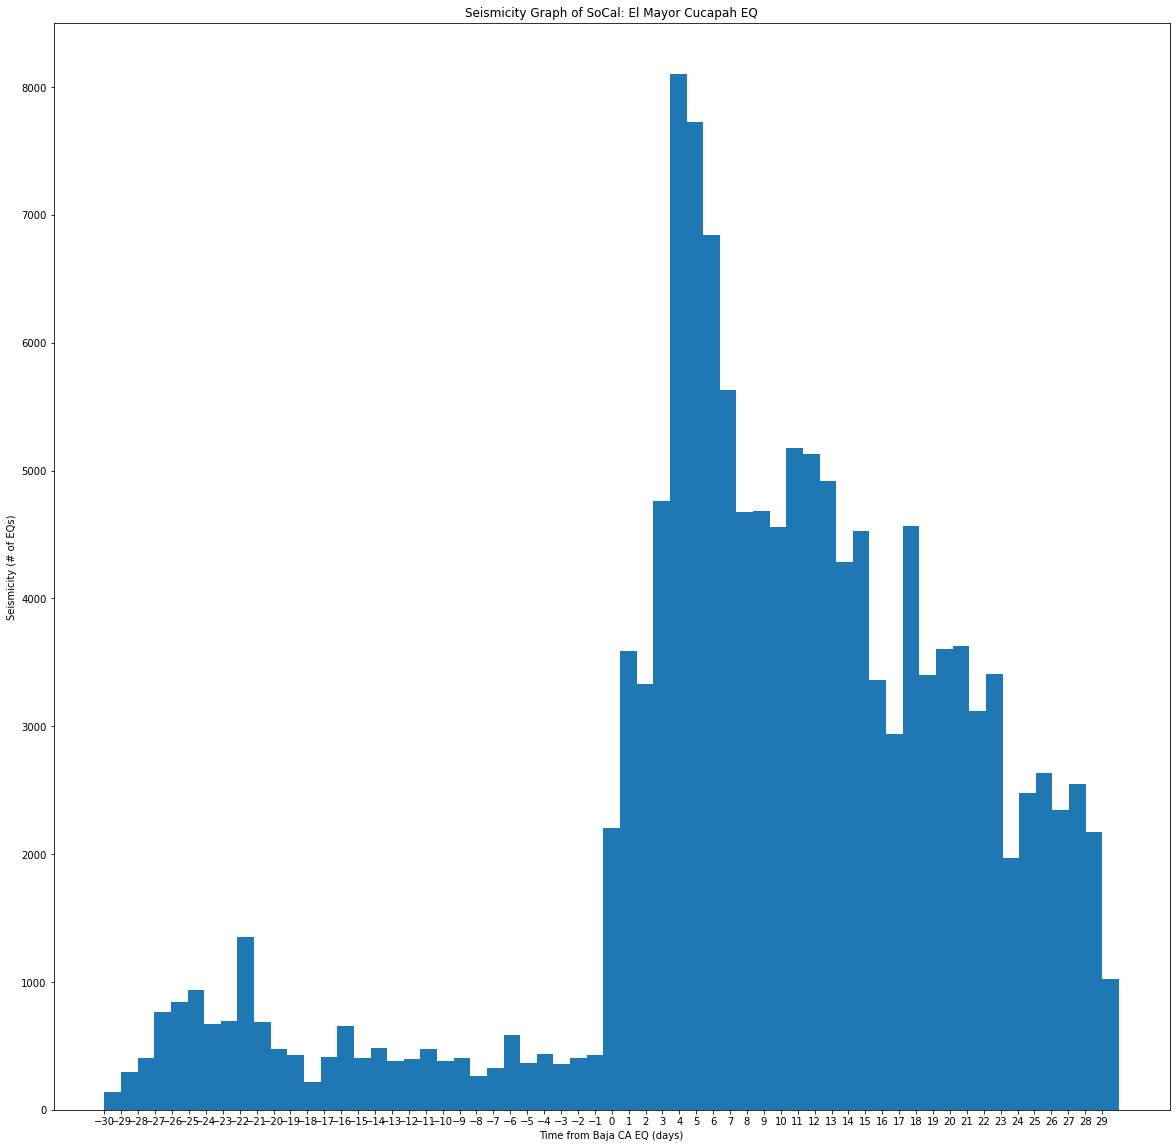

In [18]:
# 1
# a
# Seismicity graph: x-axis = time in days, y-axis = EQs (seismicity) within a day

plt.figure(figsize=(20,20))
plt.hist(QTM_Range["RELATIVE DAY"], bins = 61); # Histogram showing # EQs per relative day; 
# the # of bins = # of days, including day 0, when Baja EQ occurred
plt.xlabel("Time from Baja CA EQ (days)");
plt.ylabel("Seismicity (# of EQs)");
plt.title("Seismicity Graph of SoCal: El Mayor Cucapah EQ");
plt.xticks(range(-30,30));

plt.savefig("SeismicityDays.png", facecolor = "white")

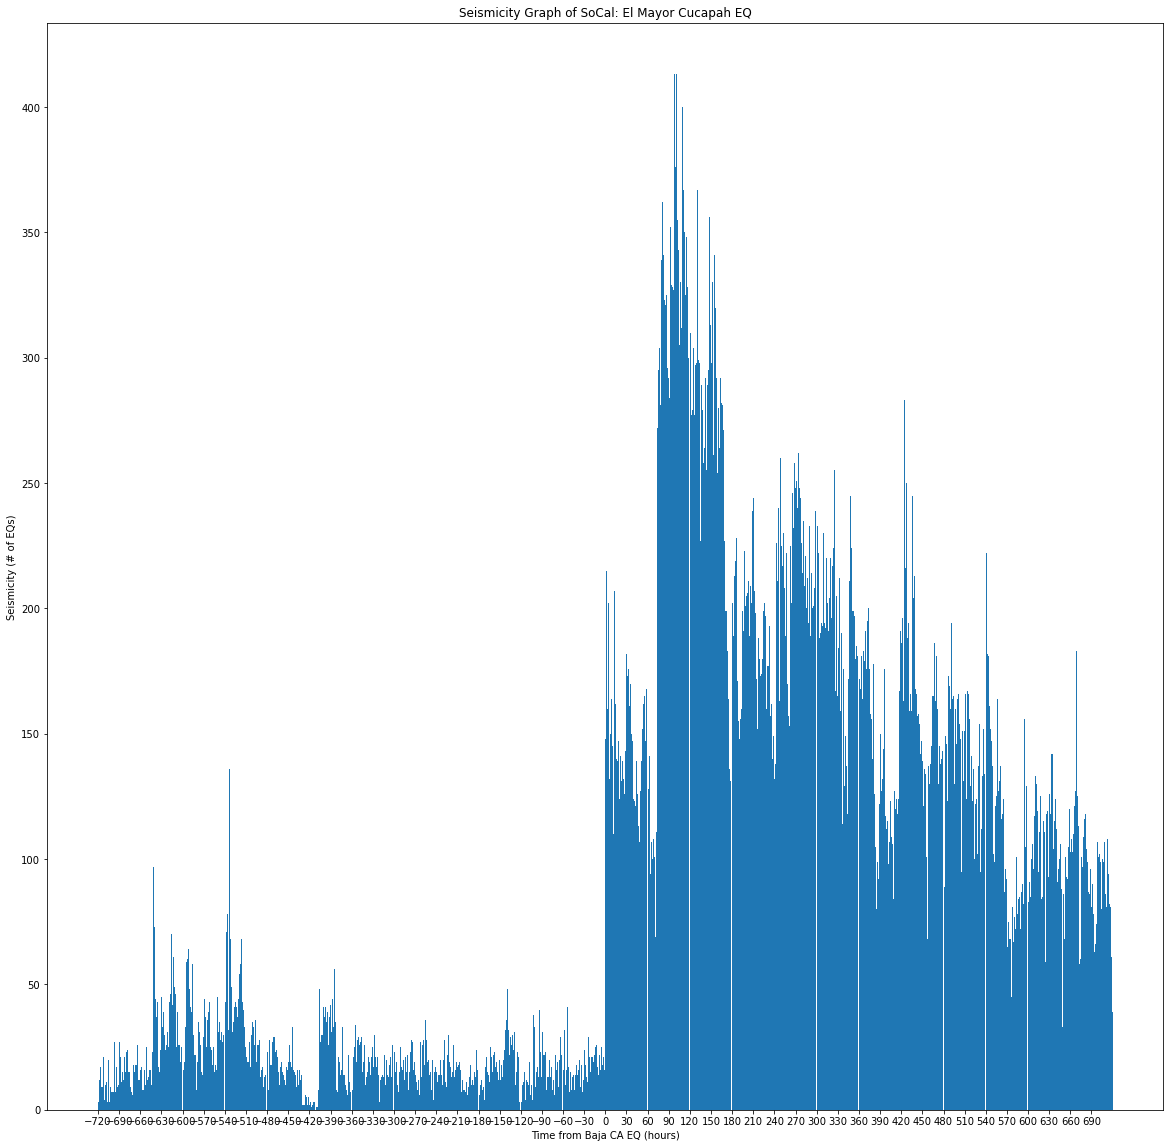

In [19]:
# 1
# b
# Seismicity graph: x-axis = time in hours, y-axis = EQs (seismicity) within an hour

plt.figure(figsize=(20,20))
plt.hist(QTM_Range["RELATIVE HOUR"], bins = 61*24); # Histogram showing # EQs per relative day; 
# the # of bins = # of hours, including day 0, when Baja EQ occurred
plt.xlabel("Time from Baja CA EQ (hours)");
plt.ylabel("Seismicity (# of EQs)");
plt.title("Seismicity Graph of SoCal: El Mayor Cucapah EQ");
plt.xticks(np.arange(-720, 720, step = 30));

plt.savefig("SeismicityHours.png", facecolor = "white")

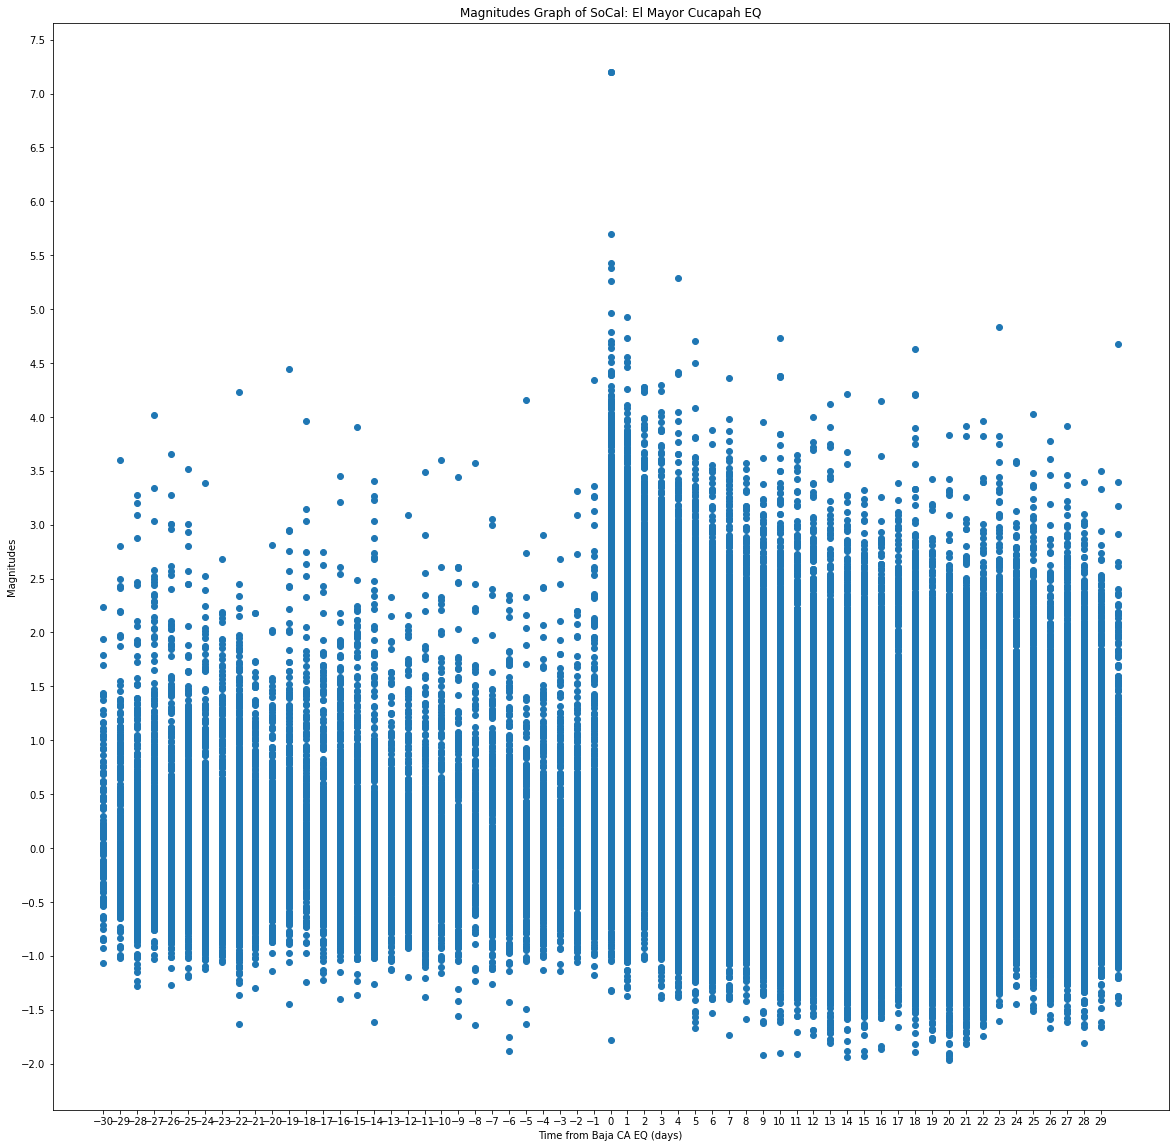

In [20]:
# 2
# a
# Magnitude figure: x-axis = time in days, y-axis = magnitudes; plot all EQs

plt.figure(figsize=(20,20))
plt.scatter(QTM_Range["RELATIVE DAY"], QTM_Range["MAGNITUDE"]);
plt.xlabel("Time from Baja CA EQ (days)");
plt.ylabel("Magnitudes");
plt.title("Magnitudes Graph of SoCal: El Mayor Cucapah EQ");
plt.xticks(range(-30,30));
plt.yticks(np.arange(-2, 8, step = 0.5))

plt.savefig("MagnitudeDays.png", facecolor = "white")

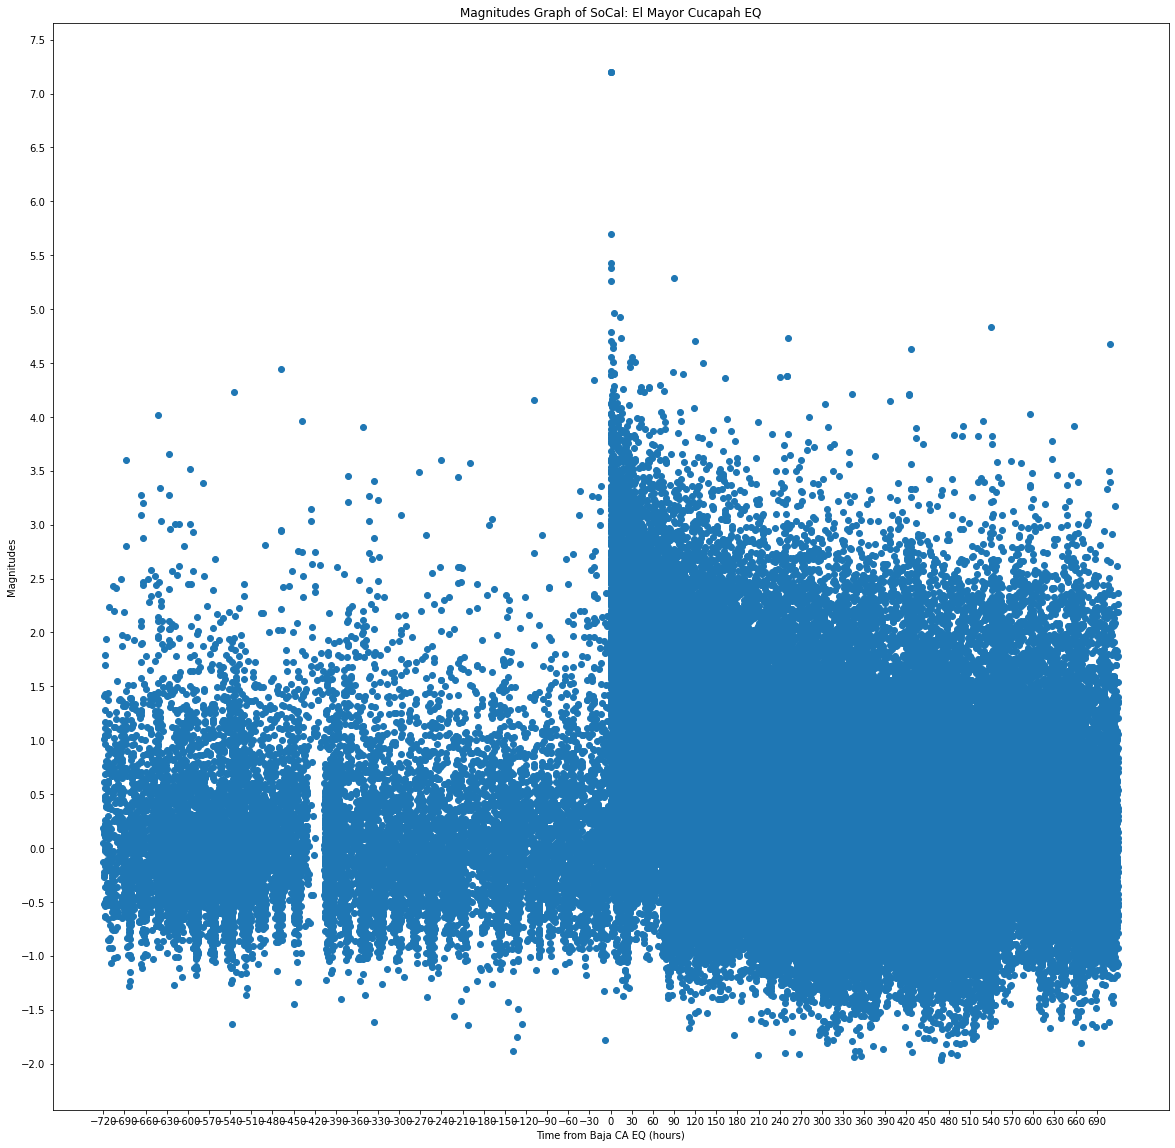

In [21]:
# 2
# b
# Magnitude figure: x-axis = time in hours, y-axis = magnitudes; plot all EQs

plt.figure(figsize=(20,20))
plt.scatter(QTM_Range["RELATIVE HOUR"], QTM_Range["MAGNITUDE"]);
plt.xlabel("Time from Baja CA EQ (hours)");
plt.ylabel("Magnitudes");
plt.title("Magnitudes Graph of SoCal: El Mayor Cucapah EQ");
plt.xticks(np.arange(-720, 720, step = 30))
plt.yticks(np.arange(-2, 8, step = 0.5))

plt.savefig("MagnitudeHours.png", facecolor = "white")

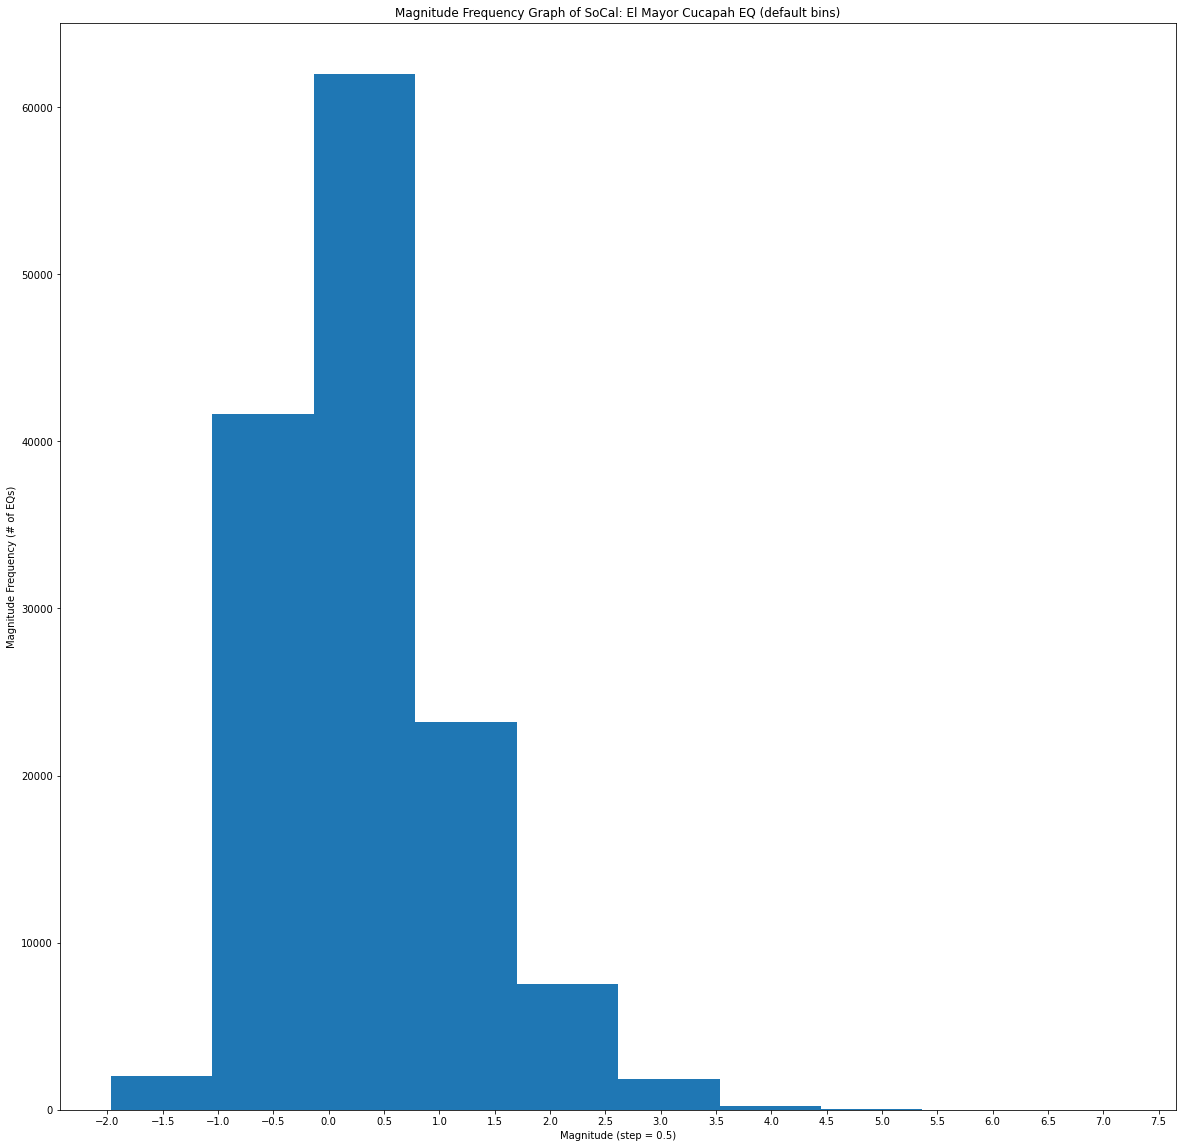

In [22]:
# 3
# a
# Magnitude frequency figure: x-axis = magnitude (Steps 0.5, play around), 
# y-axis = # events (try plotting in log scale)

plt.figure(figsize=(20,20))
plt.hist(QTM_Range["MAGNITUDE"], bins = None); # default bin size
plt.xlabel("Magnitude (step = 0.5)");
plt.ylabel("Magnitude Frequency (# of EQs)");
plt.title("Magnitude Frequency Graph of SoCal: El Mayor Cucapah EQ (default bins)");
plt.xticks(np.arange(-2, 8, step = 0.5))

#print(len(np.arange(-2,8,step=0.5)))
plt.savefig("MagFreq1.png", facecolor = "white")

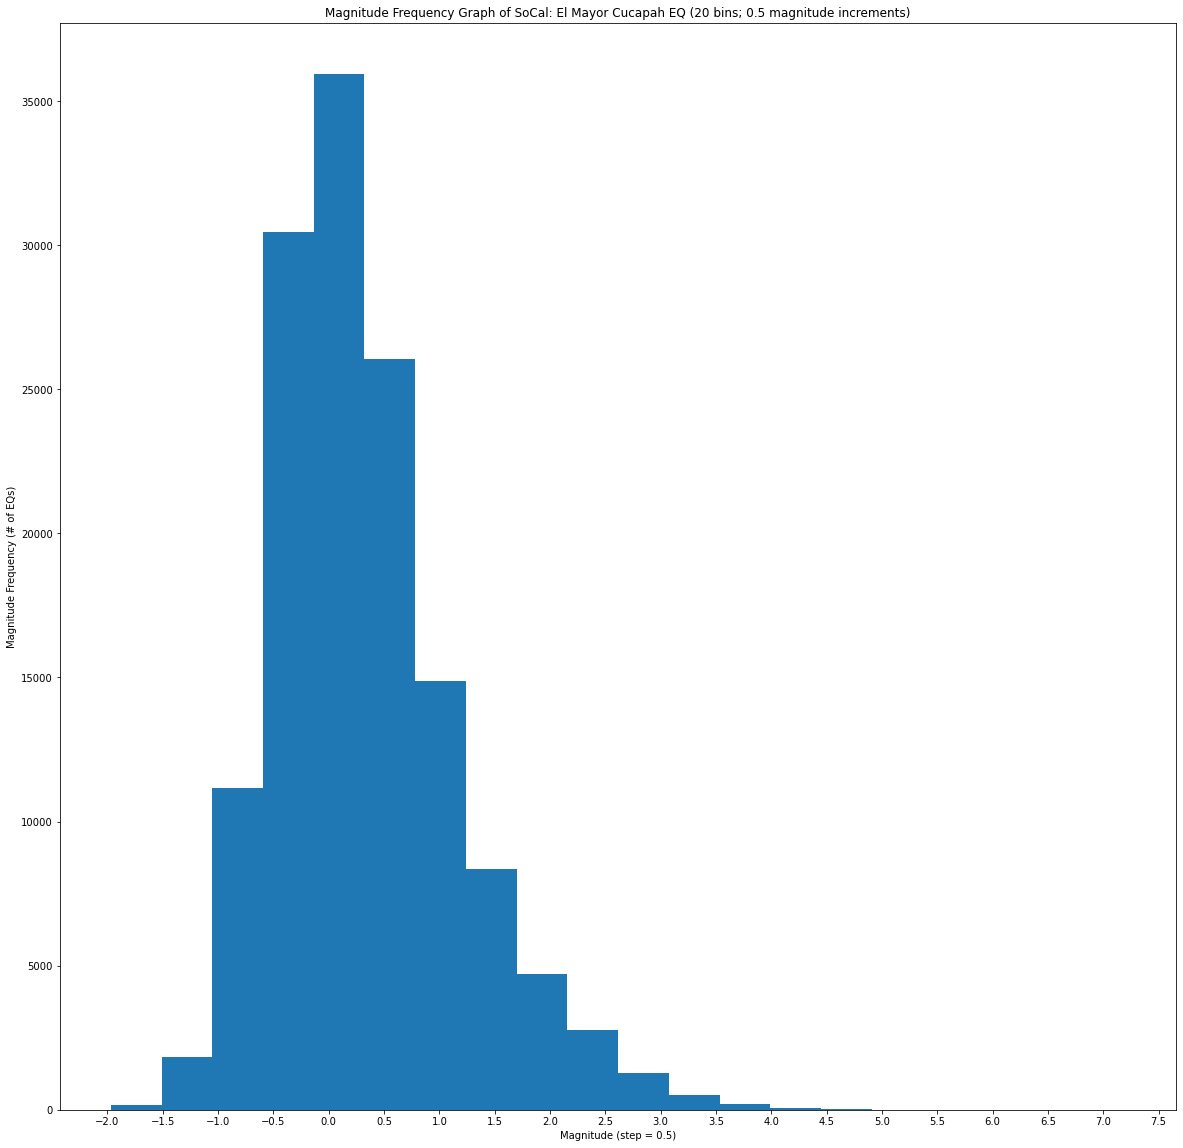

In [23]:
# 3 
# b
# Magnitude frequency figure: x-axis = magnitude (Steps 0.5, play around), 
# y-axis = # events (try plotting in log scale)

plt.figure(figsize=(20,20))
plt.hist(QTM_Range["MAGNITUDE"], bins = 20); # bin size 20, for 0.5 magnitude increments
plt.xlabel("Magnitude (step = 0.5)");
plt.ylabel("Magnitude Frequency (# of EQs)");
plt.title("Magnitude Frequency Graph of SoCal: El Mayor Cucapah EQ (20 bins; 0.5 magnitude increments)");
plt.xticks(np.arange(-2, 8, step = 0.5))

#print(len(np.arange(-2,8,step=0.5)))
plt.savefig("MagFreq2.png", facecolor = "white")

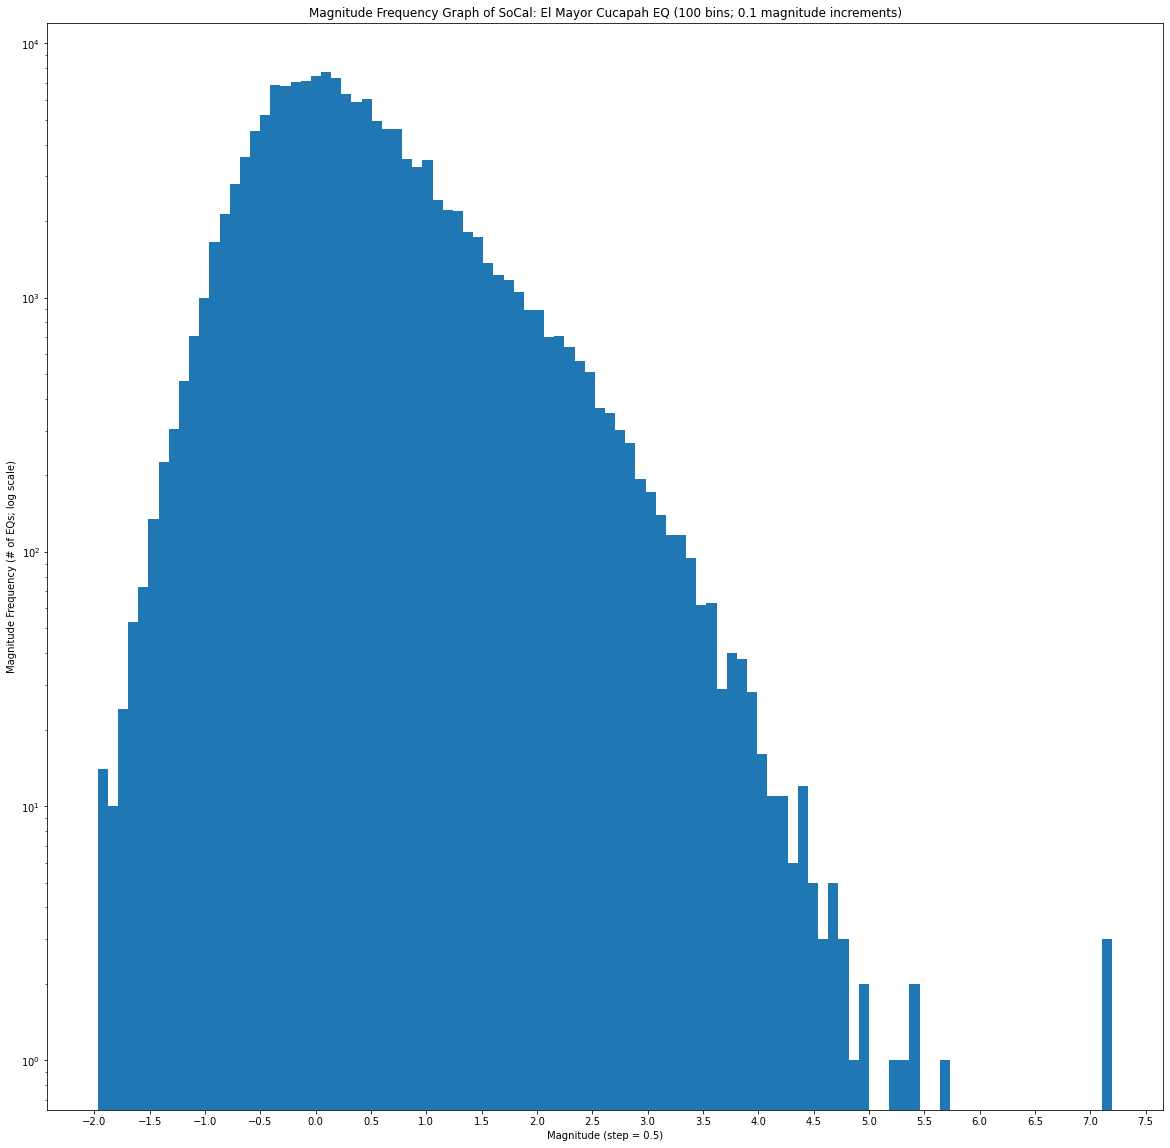

In [24]:
# 3
# c
# Magnitude frequency figure: x-axis = magnitude (Steps 0.5, play around), 
# y-axis = # events (try plotting in log scale)

plt.figure(figsize=(20,20))
plt.hist(QTM_Range["MAGNITUDE"], bins = 100, log = True); # bin size 100, for 0.1 magnitude increments
plt.xlabel("Magnitude (step = 0.5)");
plt.ylabel("Magnitude Frequency (# of EQs; log scale)");
plt.title("Magnitude Frequency Graph of SoCal: El Mayor Cucapah EQ (100 bins; 0.1 magnitude increments)");
plt.xticks(np.arange(-2, 8, step = 0.5))

#print(len(np.arange(-2,8,step=0.5)))
plt.savefig("MagFreq3.png", facecolor = "white")

1-22 Assignments

In [25]:
# 1: Seismicity bursts
# find high-magnitude EQs, say greater than 5
HighMag5 = QTM_Range.loc[QTM_Range["MAGNITUDE"] >= 5.0]
# 8 rows: 7 EQs on same day, 1 EQ after
HighMag5
#for i in HighMag["MAGNITUDE"]:
#    print(i)

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
356879,2010,4,4,22,40,42.00,,32.28600,-115.29500,10.000,...,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09,2010-04-04T22:40:42.000000Z,1.270421e+09,0.0,0.0
356879,2010,4,4,22,40,42.00,,32.28600,-115.29500,10.000,...,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09,2010-04-04T22:40:42.000000Z,1.270421e+09,0.0,0.0
356880,2010,4,4,22,40,42.16,14607652,32.27350,-115.29400,13.990,...,14607652,1.0,0.01,0,2010-04-04T22:40:42.160000Z,1.270421e+09,2010-04-04T22:40:42.159999Z,1.270421e+09,0.0,0.0
356885,2010,4,4,22,43,0.98,10184394,32.52950,-115.61234,6.810,...,10184394,1.0,0.01,0,2010-04-04T22:43:00.980000Z,1.270421e+09,2010-04-04T22:43:00.980000Z,1.270421e+09,0.0,0.0
356926,2010,4,4,22,50,17.93,31957759,32.09130,-115.17930,22.820,...,31957759,1.0,0.01,0,2010-04-04T22:50:17.930000Z,1.270421e+09,2010-04-04T22:50:17.929999Z,1.270421e+09,0.0,0.0
357029,2010,4,4,23,15,14.21,14607836,32.33230,-115.24350,9.080,...,14607836,1.0,0.01,0,2010-04-04T23:15:14.210000Z,1.270423e+09,2010-04-04T23:15:14.210000Z,1.270423e+09,0.0,1.0
357083,2010,4,4,23,25,6.68,14607924,32.26450,-115.28770,13.140,...,14607924,1.0,0.01,0,2010-04-04T23:25:06.680000Z,1.270424e+09,2010-04-04T23:25:06.679999Z,1.270424e+09,0.0,1.0
372478,2010,4,8,16,44,25.55,10589037,32.29916,-115.22754,23.636,...,10589037,1.0,0.01,0,2010-04-08T16:44:25.550000Z,1.270745e+09,2010-04-08T16:44:25.550000Z,1.270745e+09,4.0,90.0


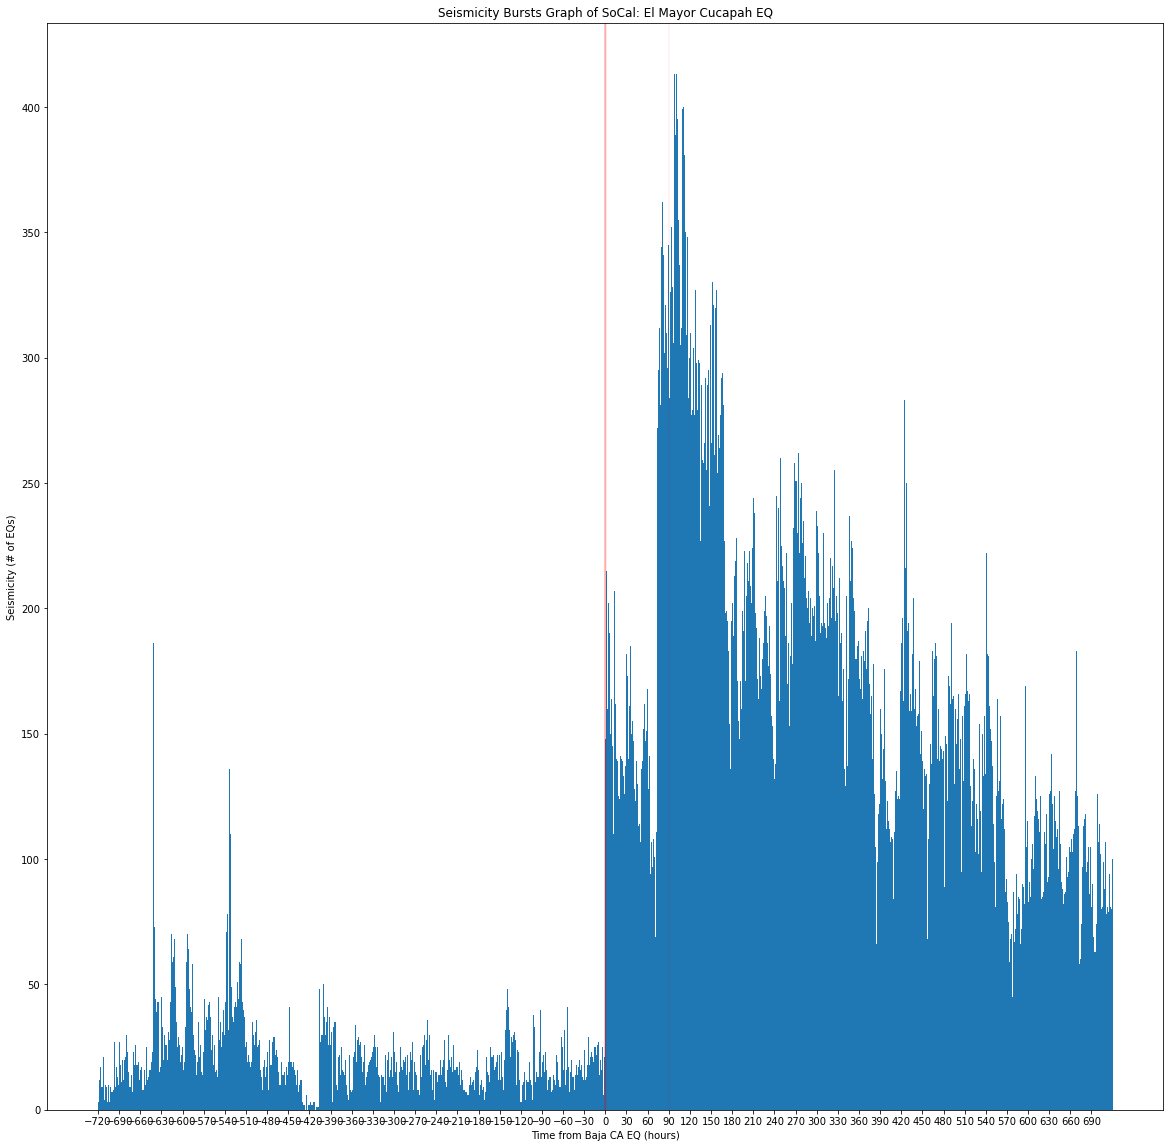

In [26]:
# 1: Seismicity bursts
# Start with seismicity, hours
plt.figure(figsize=(20,20))
plt.hist(QTM_Range["RELATIVE HOUR"], bins = 60*24); # Histogram showing # EQs per relative day; 
# the # of bins = # of hours, including day 0, when Baja EQ occurred
plt.xlabel("Time from Baja CA EQ (hours)");
plt.ylabel("Seismicity (# of EQs)");
plt.title("Seismicity Bursts Graph of SoCal: El Mayor Cucapah EQ");
plt.xticks(np.arange(-720, 720, step = 30));

for i in HighMag5["RELATIVE HOUR"]:
    plt.axvline(x = i, color = "r", linewidth = 0.1);

#for i in np.arange(-720, 720):
#    plt.axvline(x = i, color = "r", linewidth = 0.5)
plt.savefig("SeisHrs_Bursts_5.0.png", facecolor = "white")

In [27]:
# 1: Seismicity bursts
# Zoom in on the last EQ with M > 5.0: create its own dataframe
QTM_SeisHrsBurst = HighMag5.iloc[[7]] # Define a new dataframe with this last earthquake
Mag5Timestamp = float(QTM_SeisHrsBurst["TIMESTAMP"])
Amount = 2*24*60*60 # from up to 2 days before and 2 days after
Over = Mag5Timestamp + Amount
Under = Mag5Timestamp - Amount
#print(QTM_SeisHrsBurst)

QTM_SeisHrsBurst = QTM_SeisHrsBurst.append(QTM_Range.loc[QTM_Range["TIMESTAMP"] >= Under]) 
QTM_SeisHrsBurst = QTM_SeisHrsBurst.loc[QTM_SeisHrsBurst["TIMESTAMP"] <= Over]
QTM_SeisHrsBurst = QTM_SeisHrsBurst.sort_values(by = ["TIMESTAMP"])

QTM_SeisHrsBurst["RELATIVE HOUR"] = ((QTM_SeisHrsBurst["TIMESTAMP"] - Mag5Timestamp)/(86400/24)).round()

QTM_SeisHrsBurst.head()

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
363306,2010,4,6,16,44,28.81,352157,33.64816,-116.71467,13.861,...,37399200,0.106,0.011,0,2010-04-06T16:44:28.810000Z,1.270572e+09,2010-04-06T16:44:28.809999Z,1.270572e+09,2.0,-48.0
363307,2010,4,6,16,44,32.45,352158,32.64322,-115.76833,9.580,...,14215124,0.3,0.024,0,2010-04-06T16:44:32.450000Z,1.270572e+09,2010-04-06T16:44:32.450000Z,1.270572e+09,2.0,-48.0
363308,2010,4,6,16,45,2.01,352159,33.44035,-116.50549,7.932,...,10741797,0.206,0.021,0,2010-04-06T16:45:02.010000Z,1.270572e+09,2010-04-06T16:45:02.009999Z,1.270572e+09,2.0,-48.0
363309,2010,4,6,16,45,17.28,10195870,32.70300,-115.84830,5.380,...,10195870,1.0,0.01,0,2010-04-06T16:45:17.280000Z,1.270572e+09,2010-04-06T16:45:17.280000Z,1.270572e+09,2.0,-48.0
363310,2010,4,6,16,45,31.73,352160,32.68538,-115.89452,2.736,...,14621772,0.337,0.025,0,2010-04-06T16:45:31.730000Z,1.270572e+09,2010-04-06T16:45:31.730000Z,1.270572e+09,2.0,-48.0


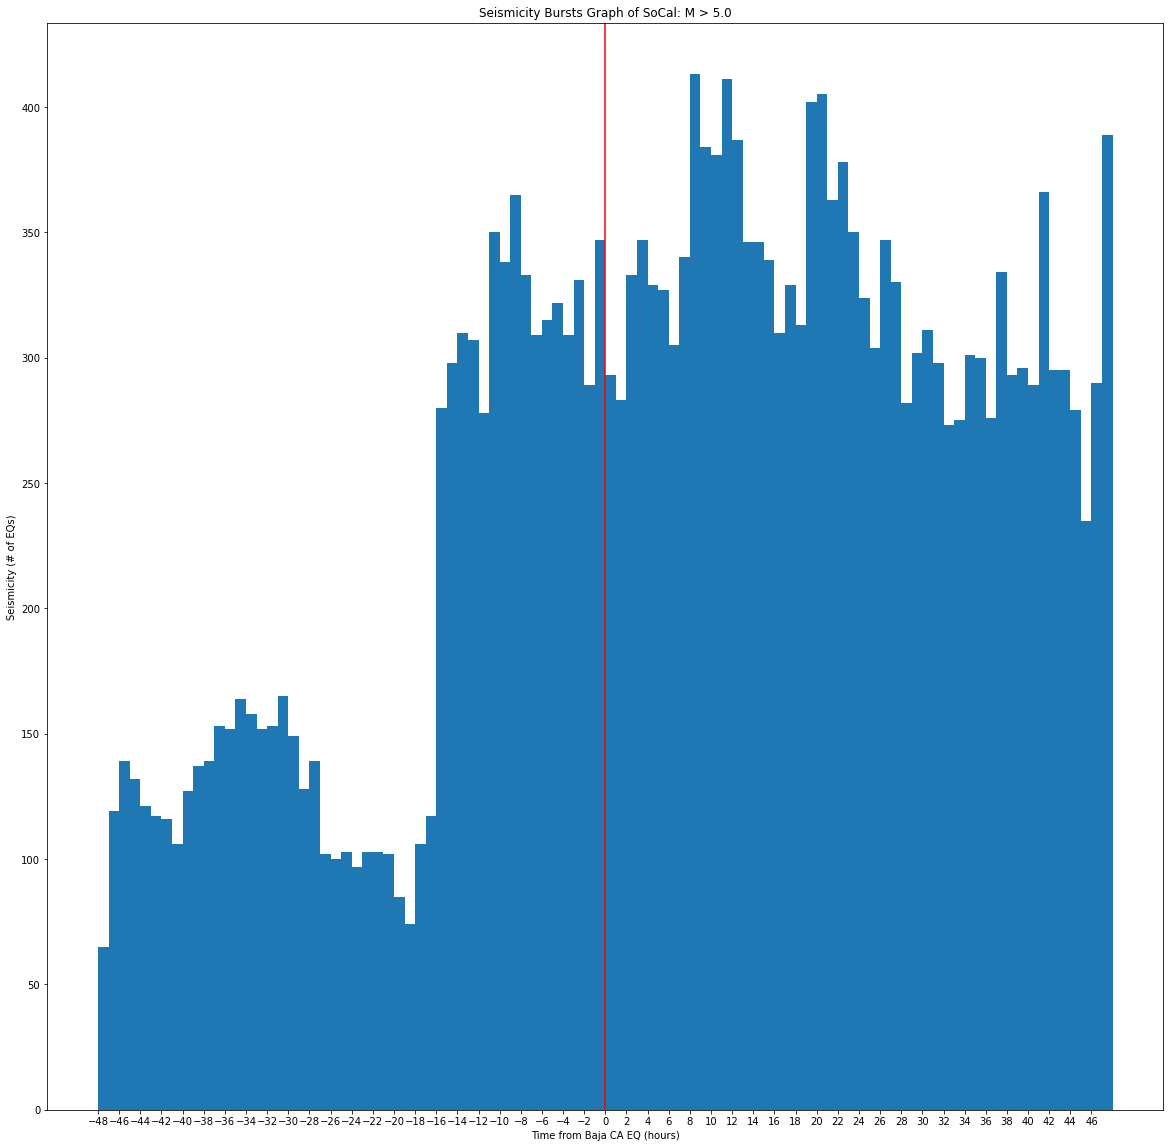

In [28]:
# Figure of last mag > 5.0 EQ
plt.figure(figsize=(20,20))
plt.hist(QTM_SeisHrsBurst["RELATIVE HOUR"], bins = 4*24);
plt.xlabel("Time from Baja CA EQ (hours)");
plt.ylabel("Seismicity (# of EQs)");
plt.title("Seismicity Bursts Graph of SoCal: M > 5.0");
plt.xticks(np.arange(-48, 48, step = 2));

plt.axvline(x = 0, color = "r")
#for i in np.arange(-48, 48):
#    plt.axvline(x = i, color = "r") # needed to check bins 
plt.savefig("SeisHrsBursts_5.0_1.png", facecolor = "white")

In [29]:
# 1: Seismicity Bursts
# Try M > 4.5
HighMag4_5 = QTM_Range.loc[QTM_Range["MAGNITUDE"] >= 4.5]
HighMag4_5

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
356879,2010,4,4,22,40,42.000,,32.28600,-115.29500,10.000,...,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09,2010-04-04T22:40:42.000000Z,1.270421e+09,0.0,0.0
356879,2010,4,4,22,40,42.000,,32.28600,-115.29500,10.000,...,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09,2010-04-04T22:40:42.000000Z,1.270421e+09,0.0,0.0
356880,2010,4,4,22,40,42.160,14607652,32.27350,-115.29400,13.990,...,14607652,1.0,0.01,0,2010-04-04T22:40:42.160000Z,1.270421e+09,2010-04-04T22:40:42.159999Z,1.270421e+09,0.0,0.0
356885,2010,4,4,22,43,0.980,10184394,32.52950,-115.61234,6.810,...,10184394,1.0,0.01,0,2010-04-04T22:43:00.980000Z,1.270421e+09,2010-04-04T22:43:00.980000Z,1.270421e+09,0.0,0.0
356926,2010,4,4,22,50,17.930,31957759,32.09130,-115.17930,22.820,...,31957759,1.0,0.01,0,2010-04-04T22:50:17.930000Z,1.270421e+09,2010-04-04T22:50:17.929999Z,1.270421e+09,0.0,0.0
357010,2010,4,4,23,9,39.750,14607820,32.24383,-115.31983,7.930,...,14607820,1.0,0.01,0,2010-04-04T23:09:39.750000Z,1.270423e+09,2010-04-04T23:09:39.750000Z,1.270423e+09,0.0,0.0
357029,2010,4,4,23,15,14.210,14607836,32.33230,-115.24350,9.080,...,14607836,1.0,0.01,0,2010-04-04T23:15:14.210000Z,1.270423e+09,2010-04-04T23:15:14.210000Z,1.270423e+09,0.0,1.0
357042,2010,4,4,23,17,13.270,10169094,32.26583,-115.28633,5.460,...,10169094,1.0,0.01,0,2010-04-04T23:17:13.270000Z,1.270423e+09,2010-04-04T23:17:13.269999Z,1.270423e+09,0.0,1.0
357083,2010,4,4,23,25,6.680,14607924,32.26450,-115.28770,13.140,...,14607924,1.0,0.01,0,2010-04-04T23:25:06.680000Z,1.270424e+09,2010-04-04T23:25:06.679999Z,1.270424e+09,0.0,1.0
357131,2010,4,4,23,37,33.580,14607972,32.49380,-115.58120,14.820,...,14607972,1.0,0.01,0,2010-04-04T23:37:33.580000Z,1.270424e+09,2010-04-04T23:37:33.579999Z,1.270424e+09,0.0,1.0


Wall time: 9.09 s


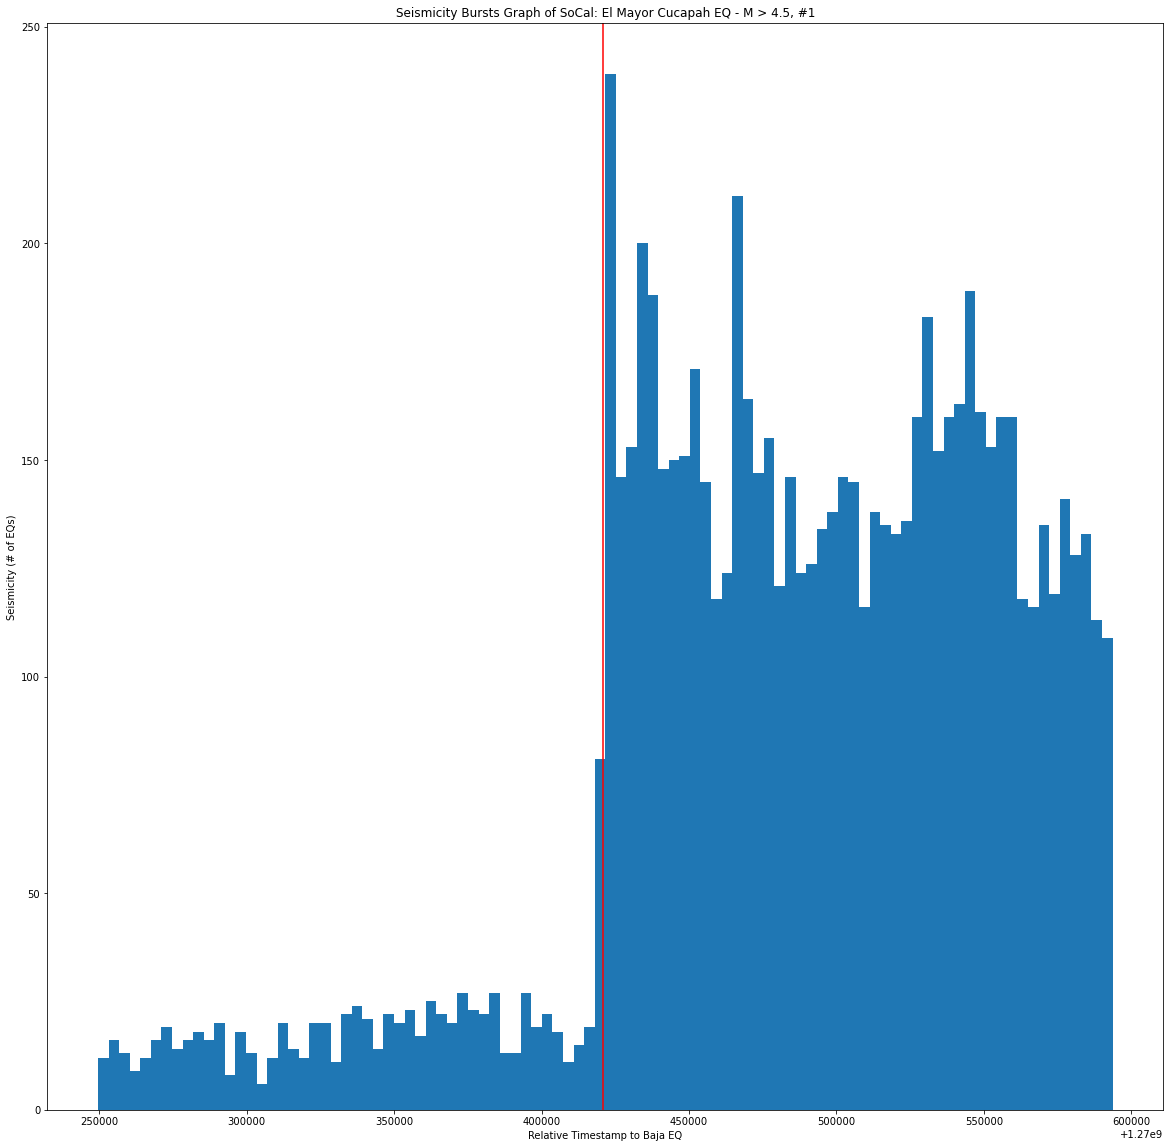

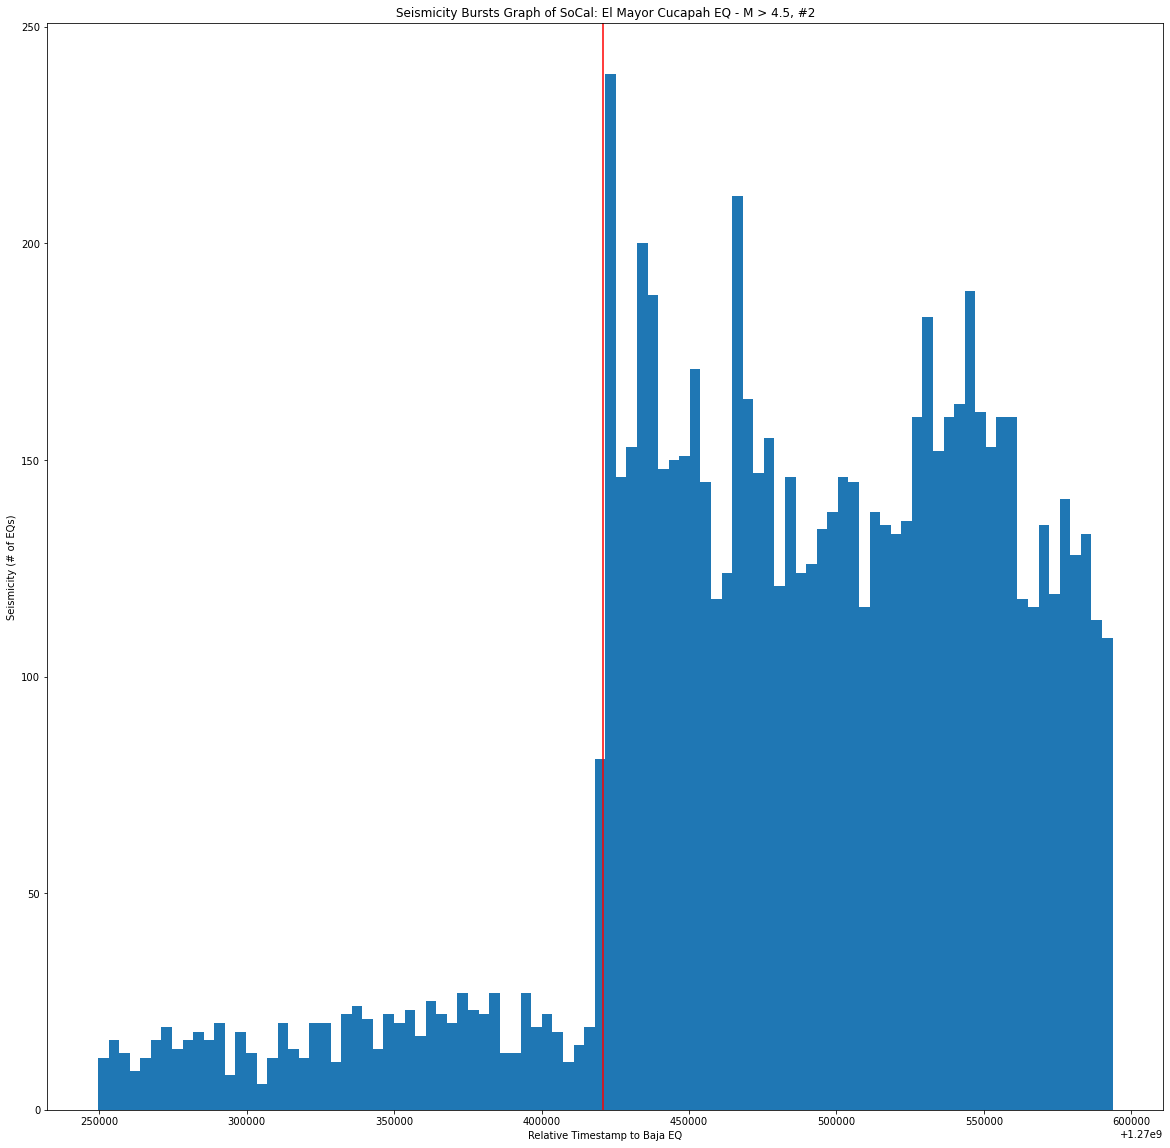

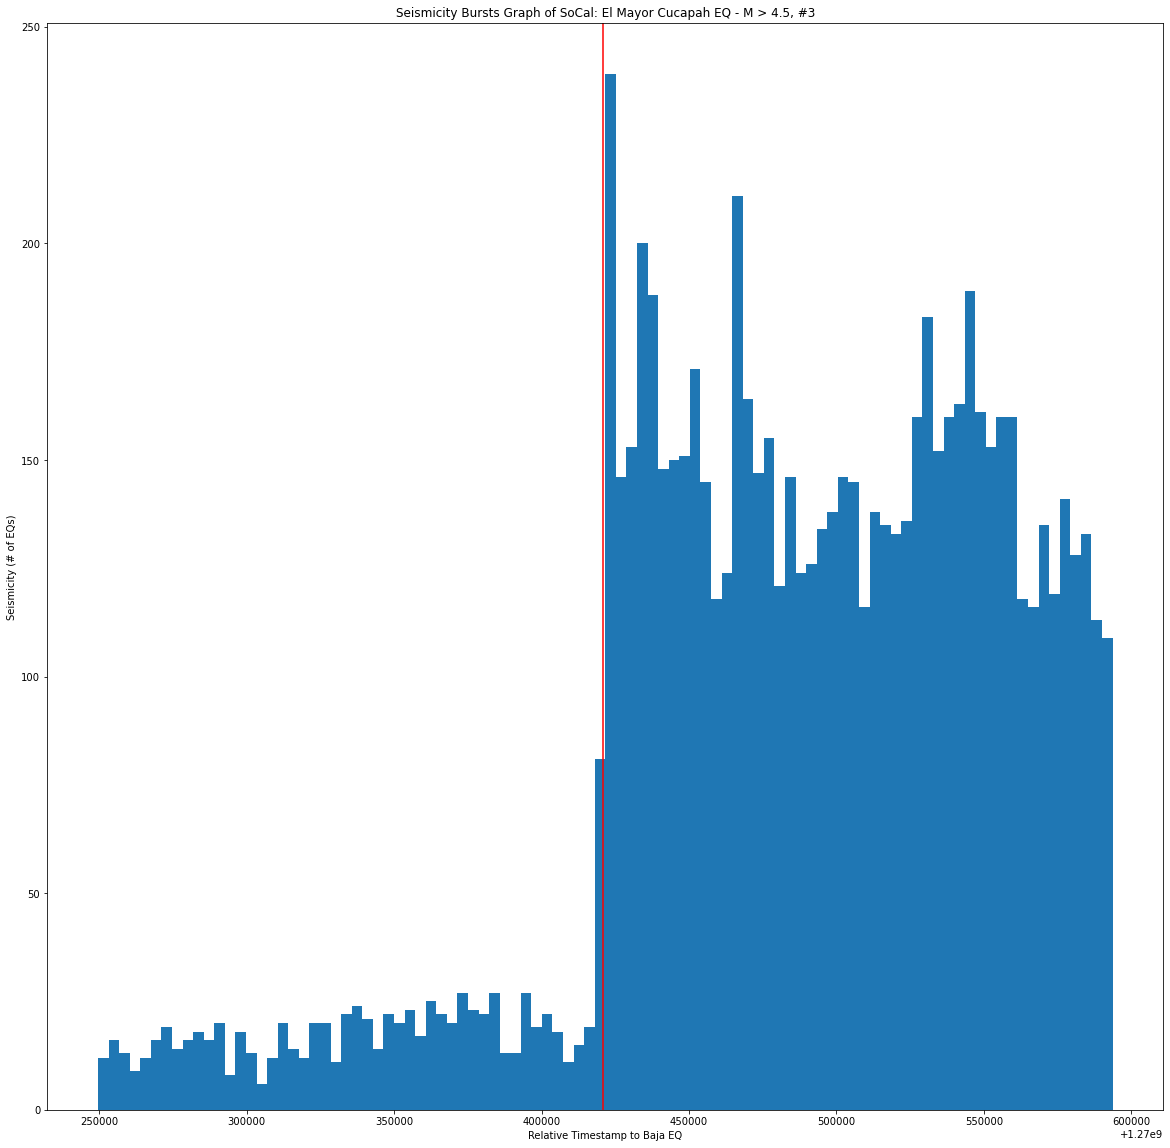

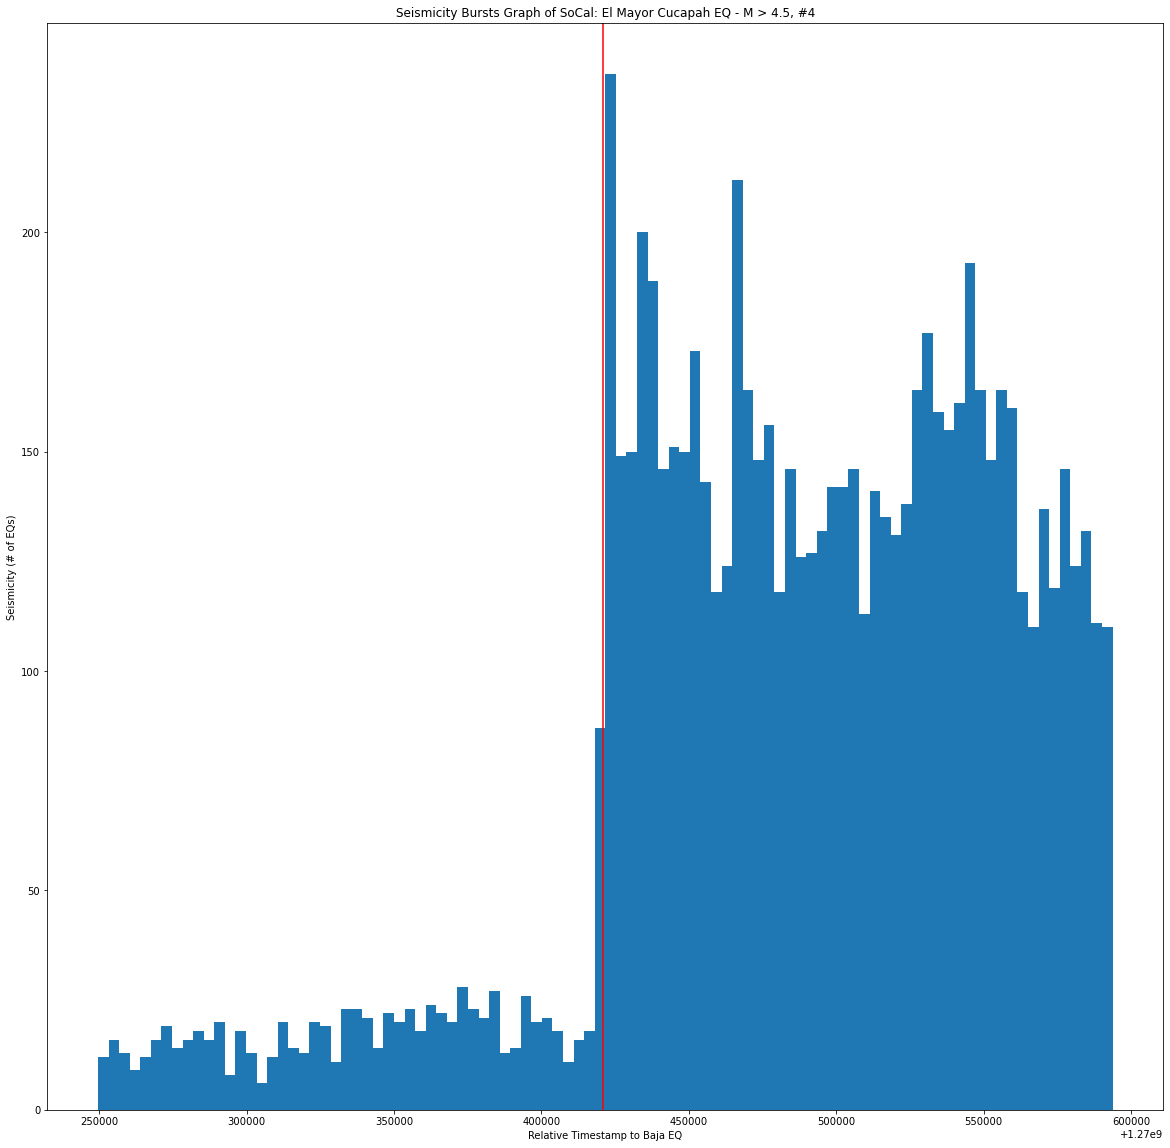

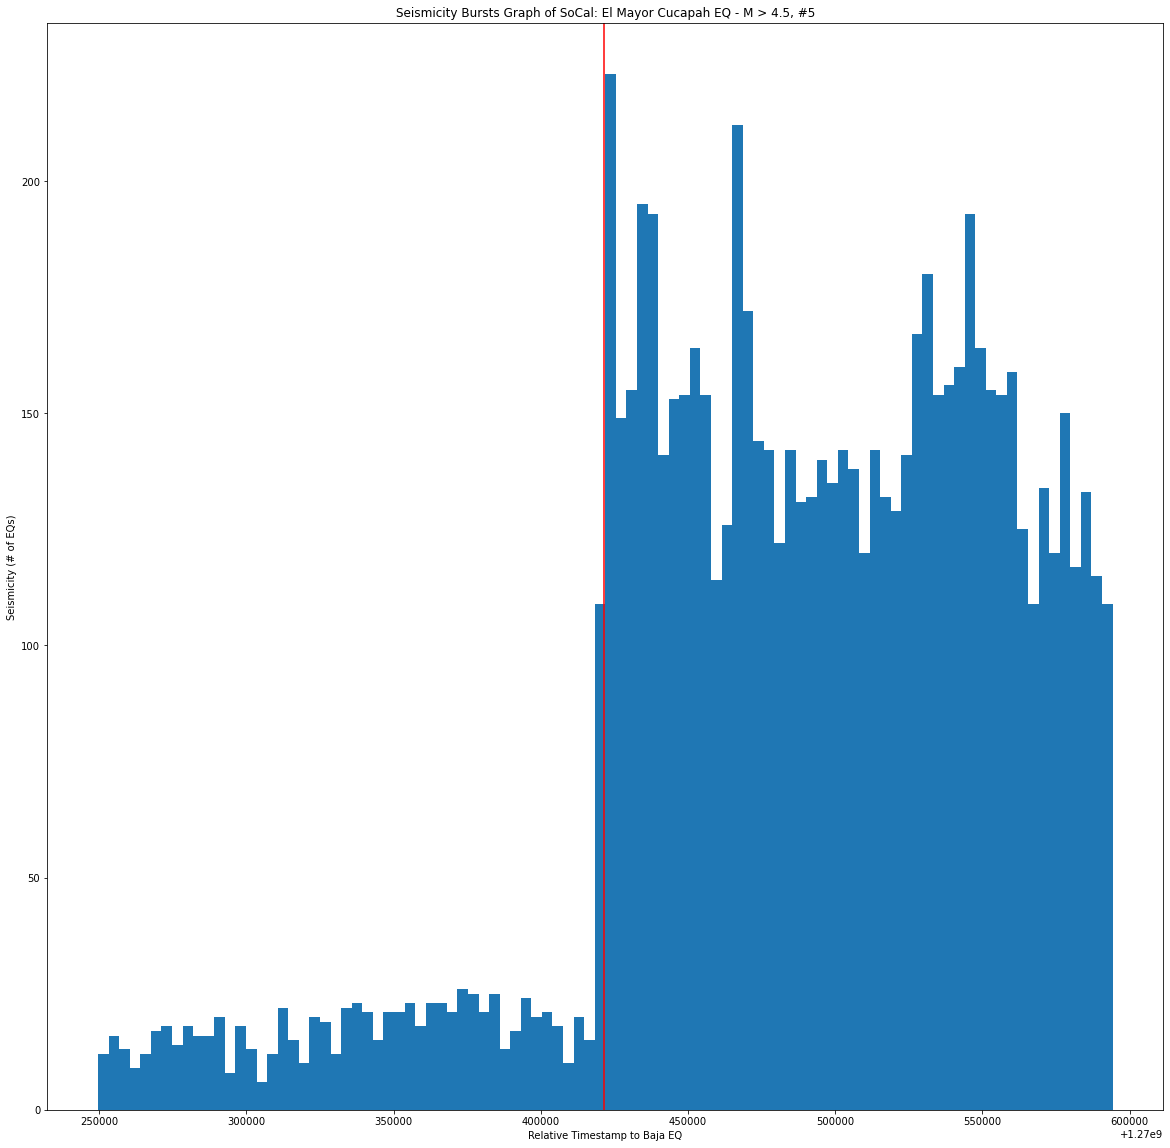

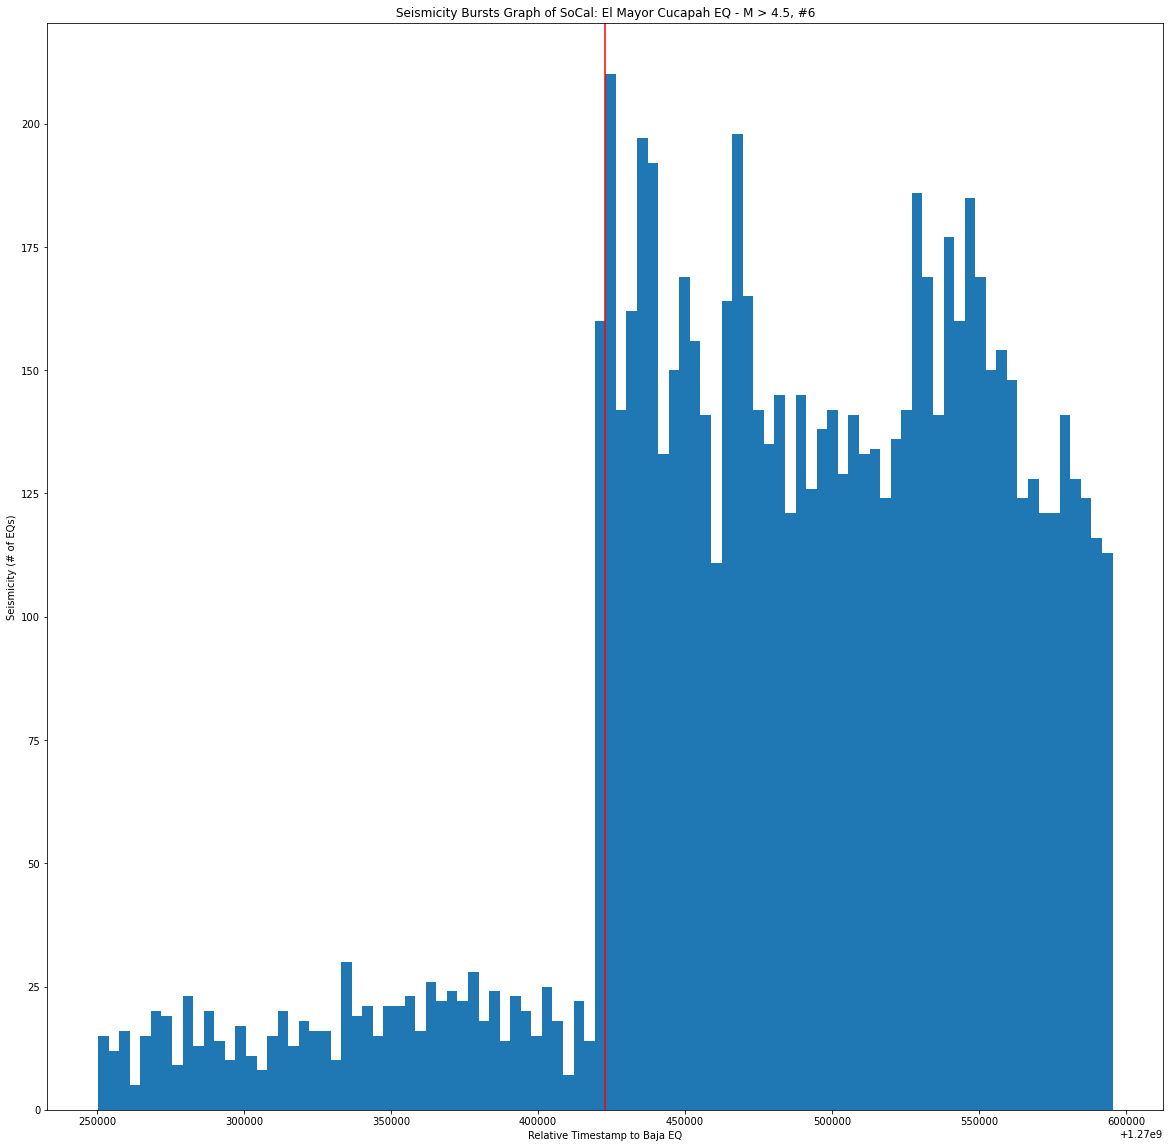

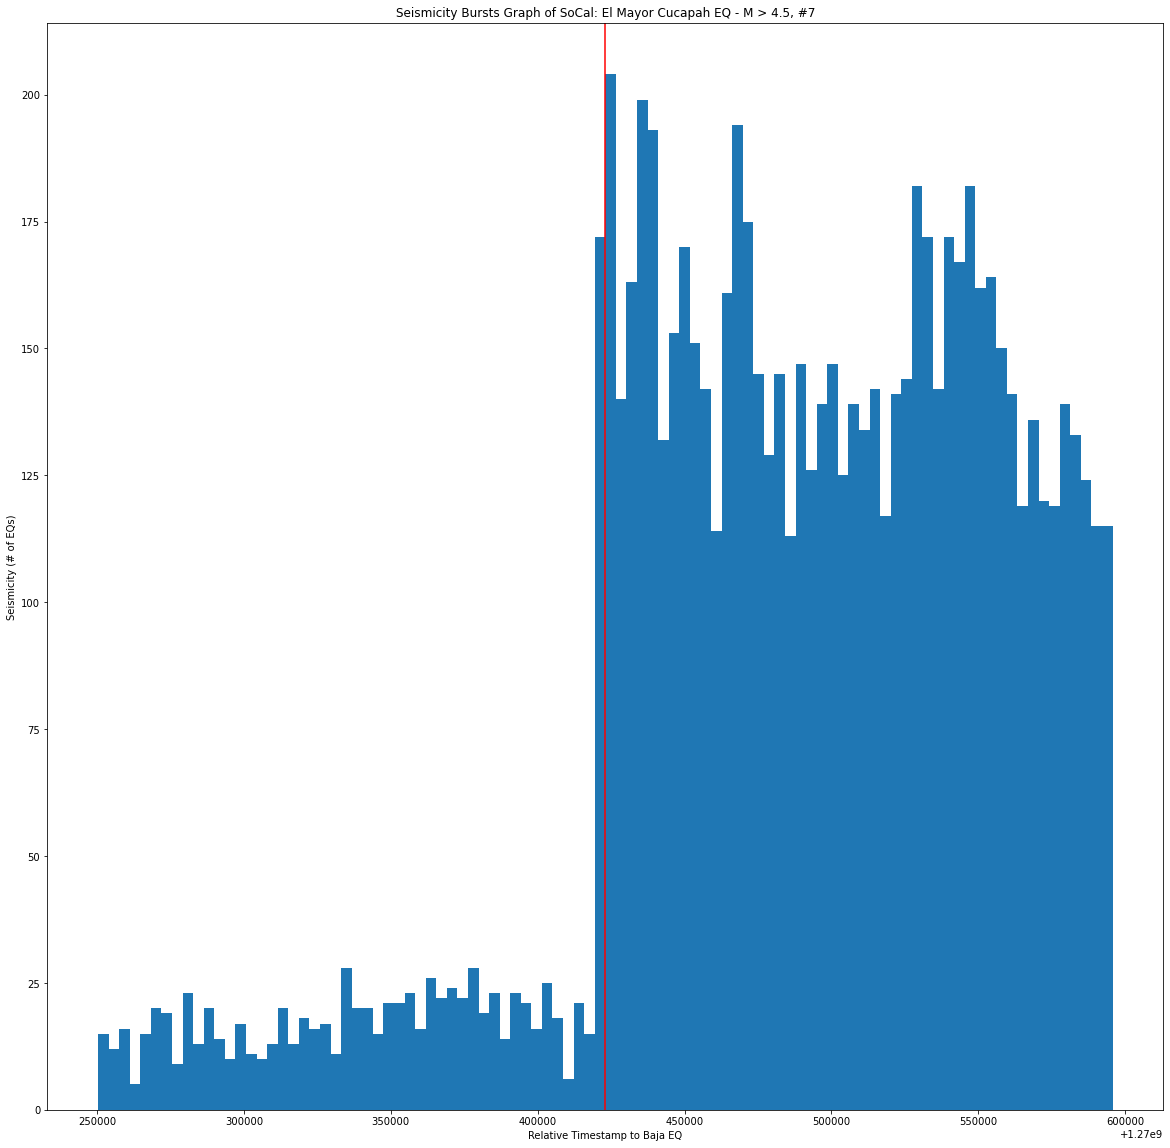

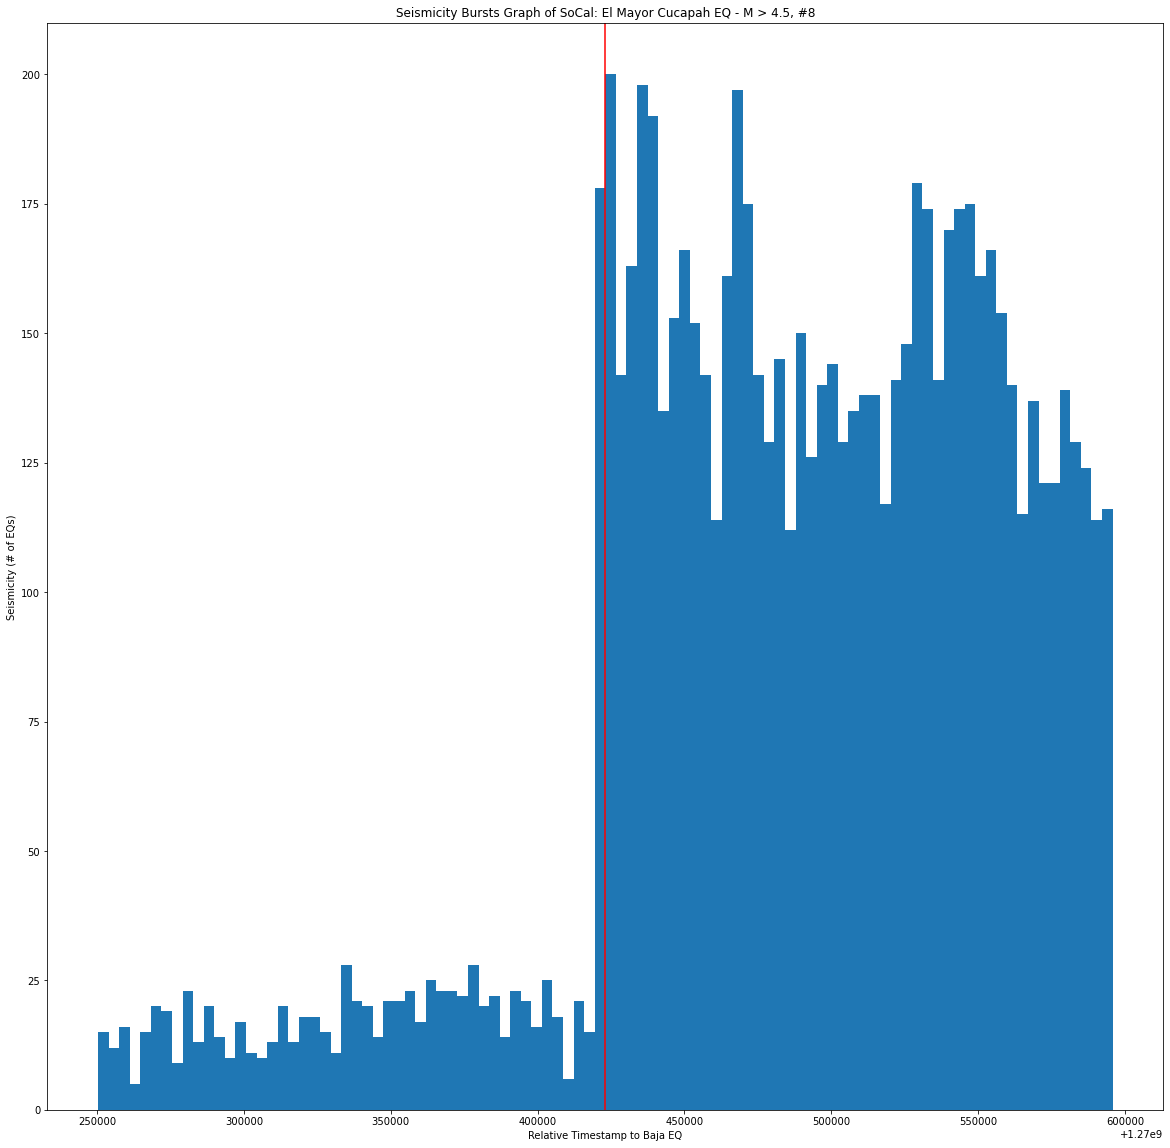

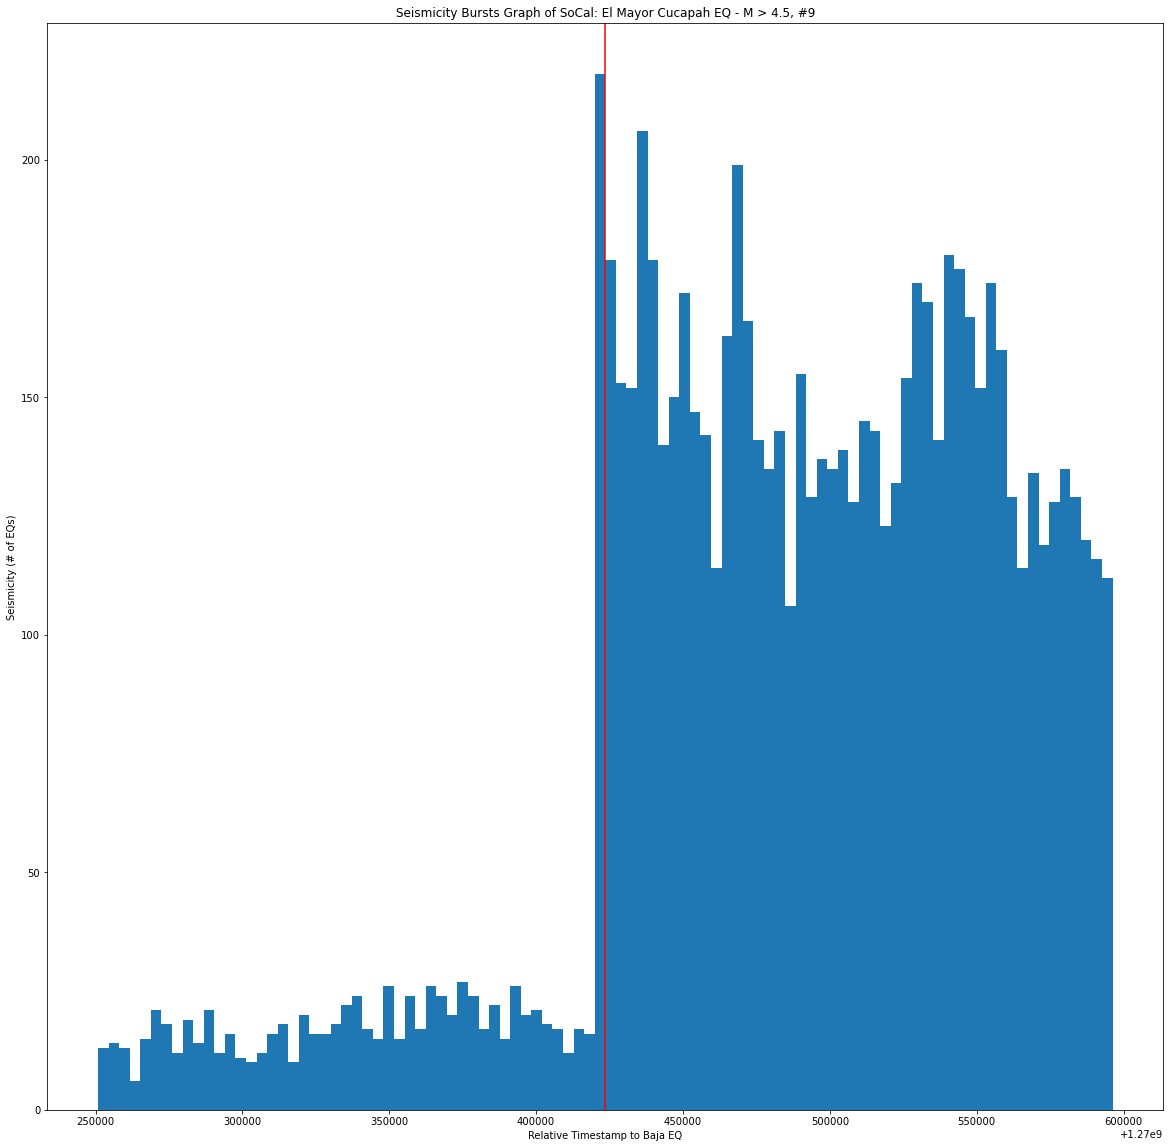

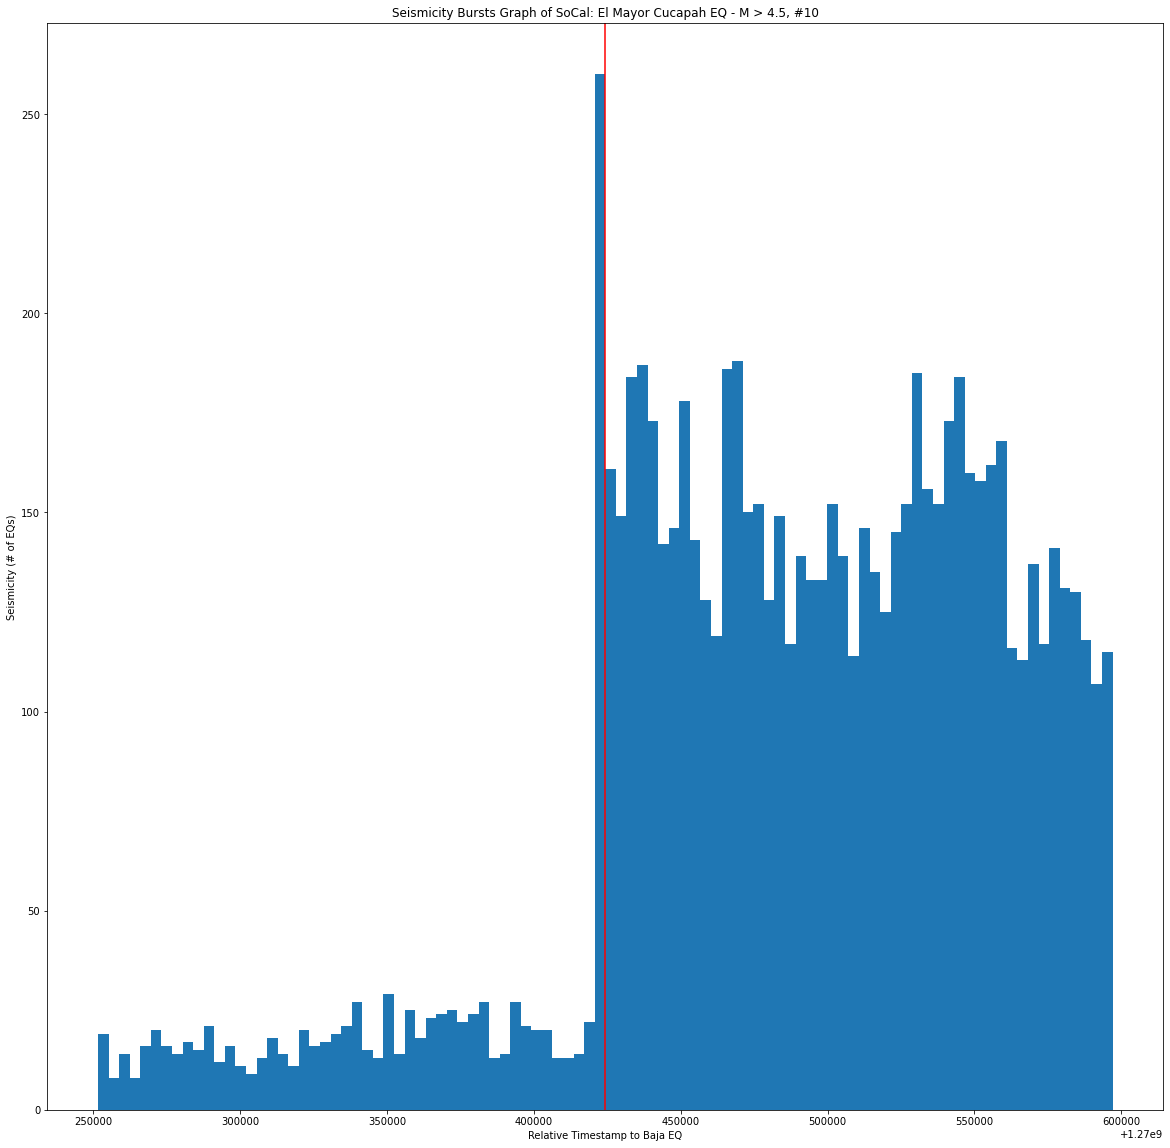

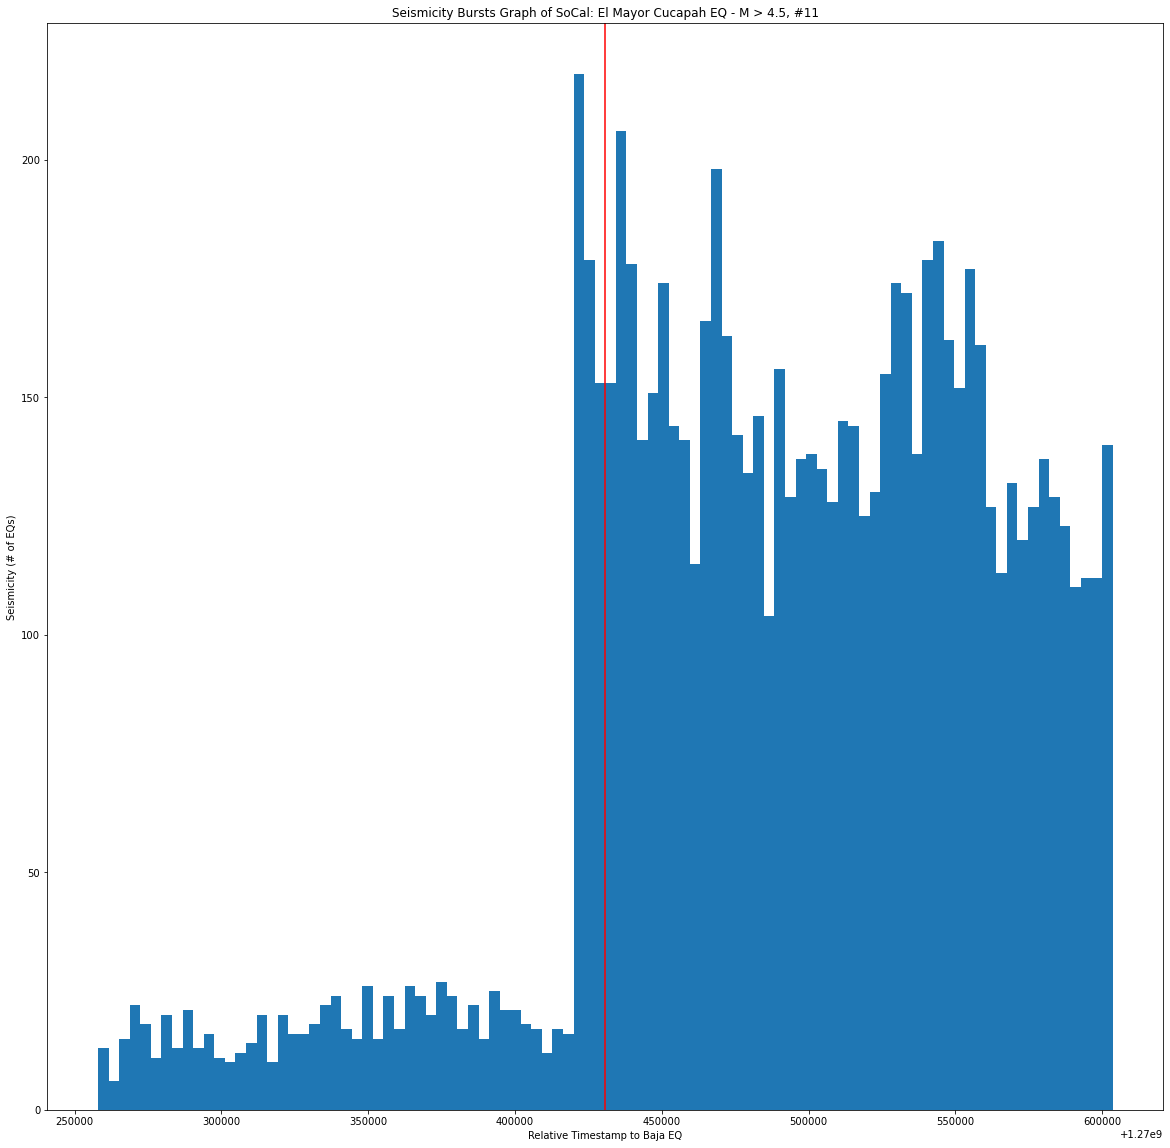

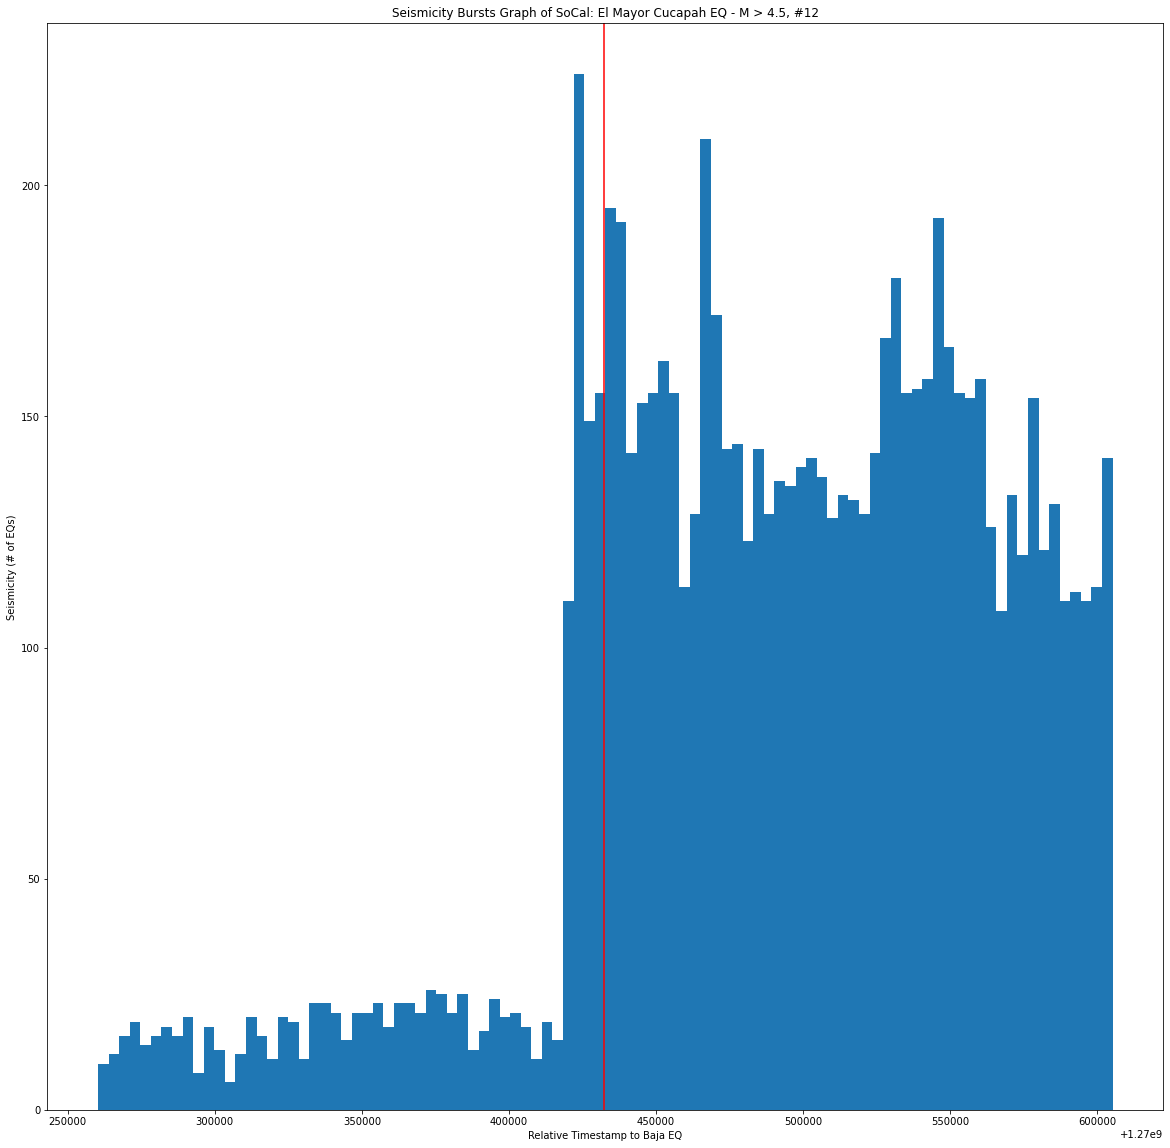

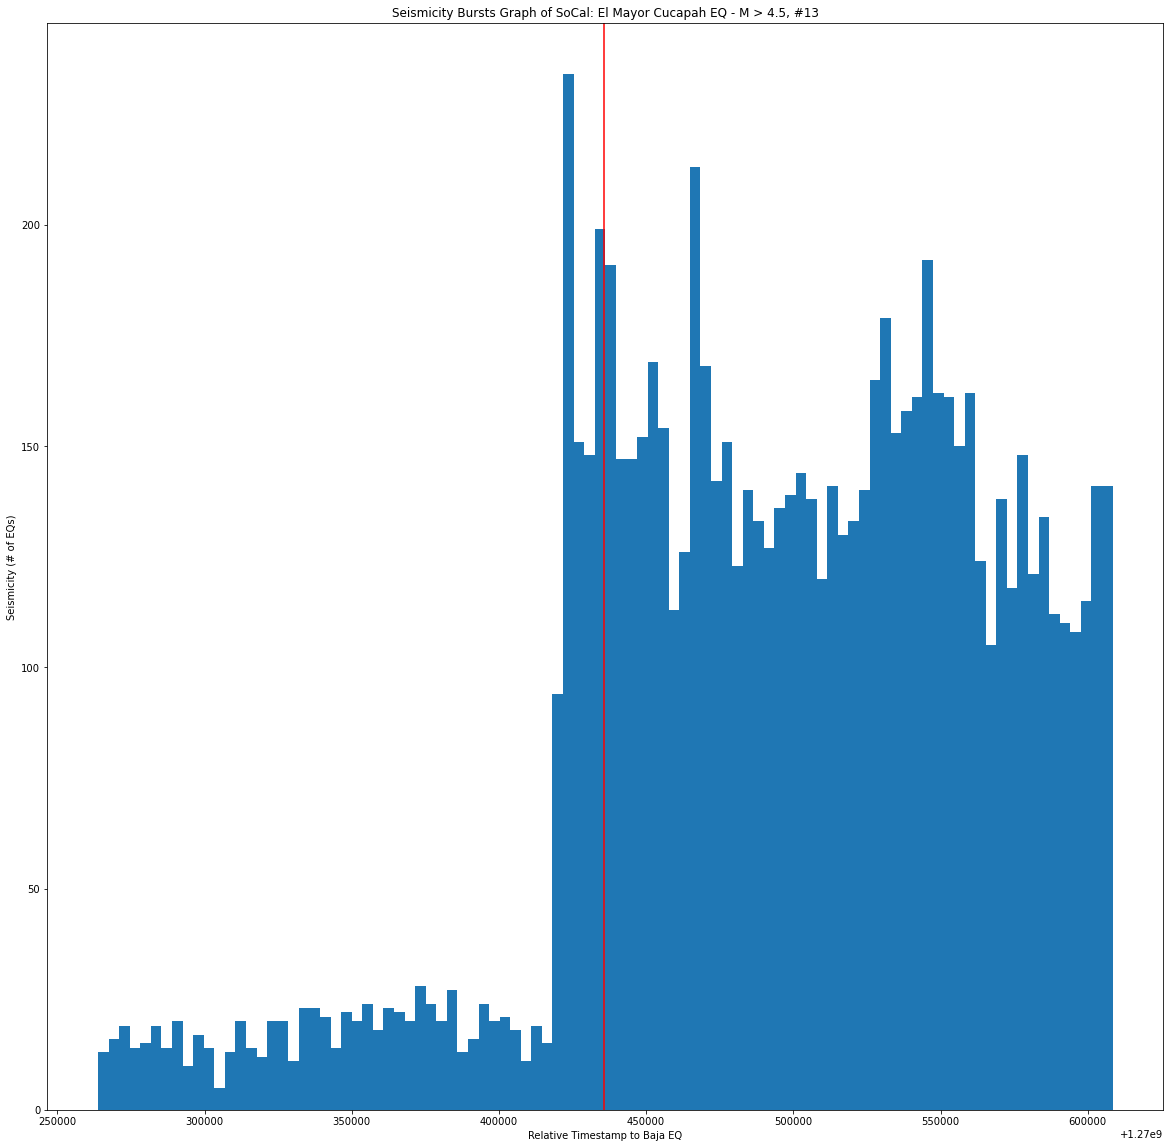

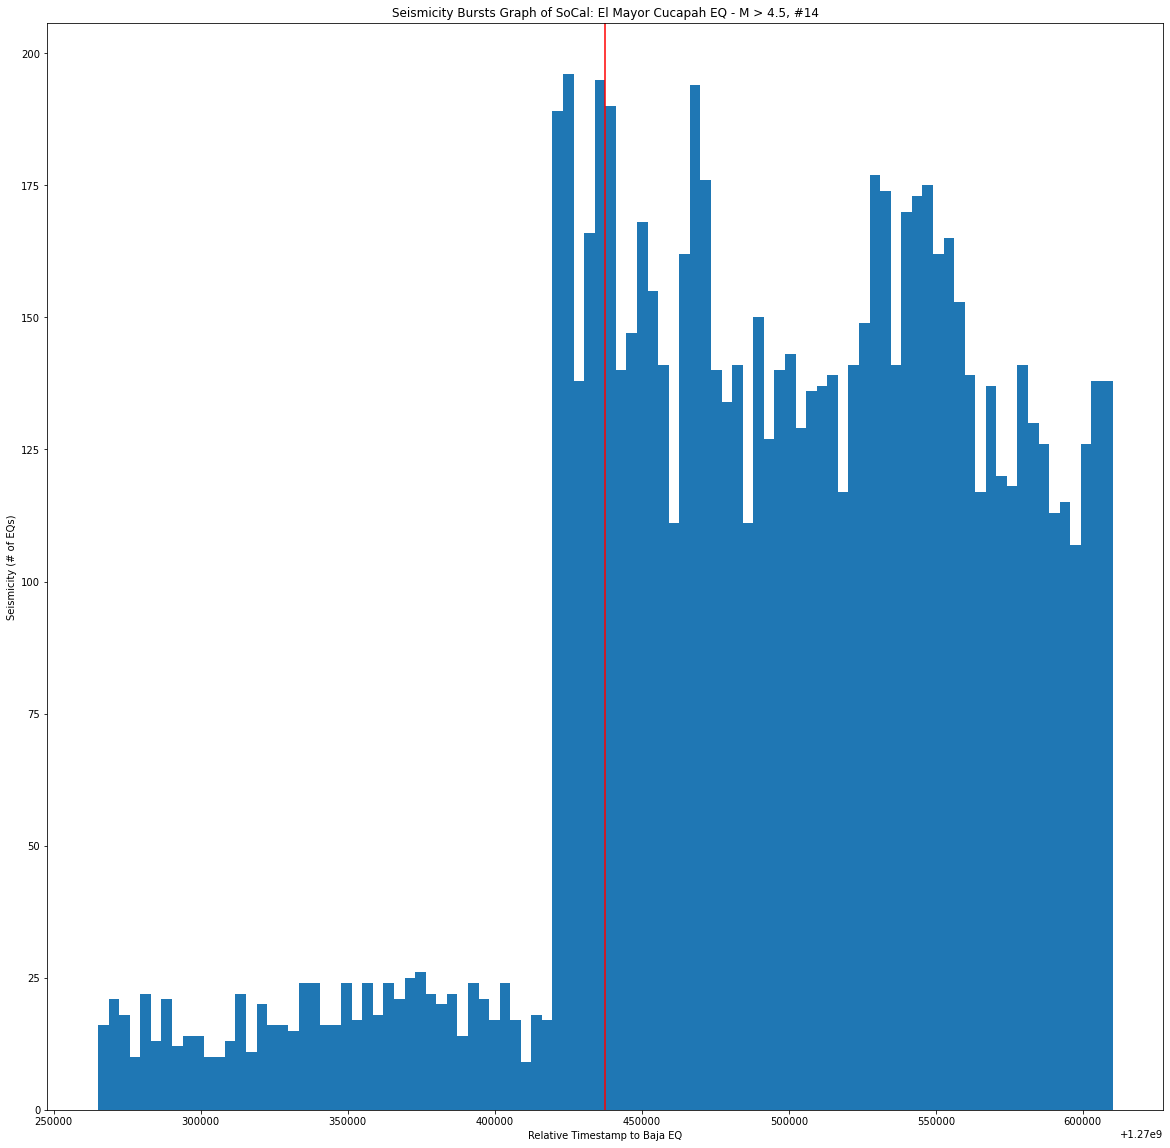

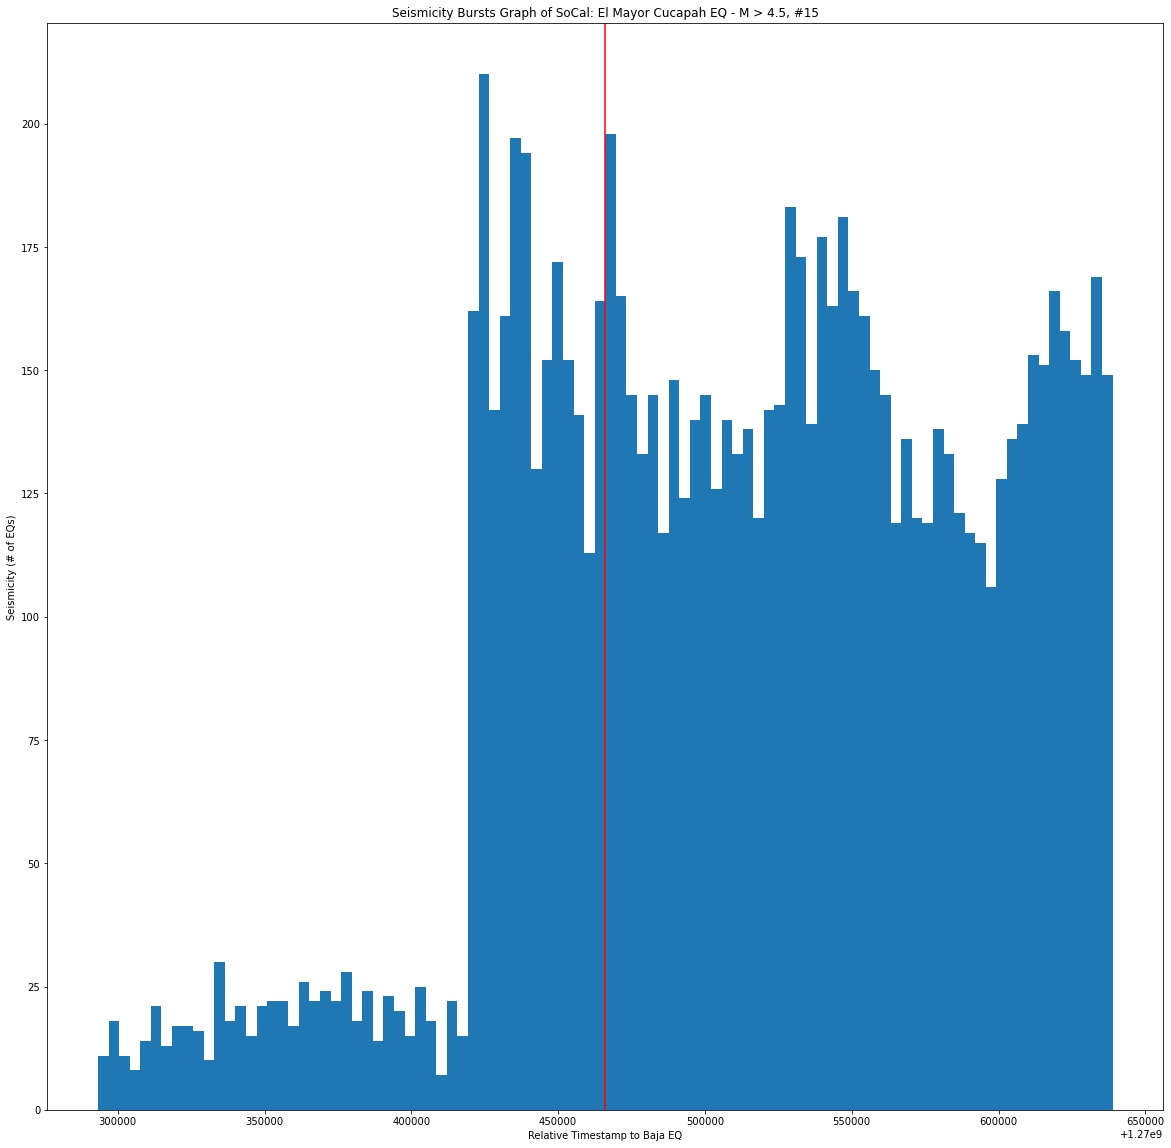

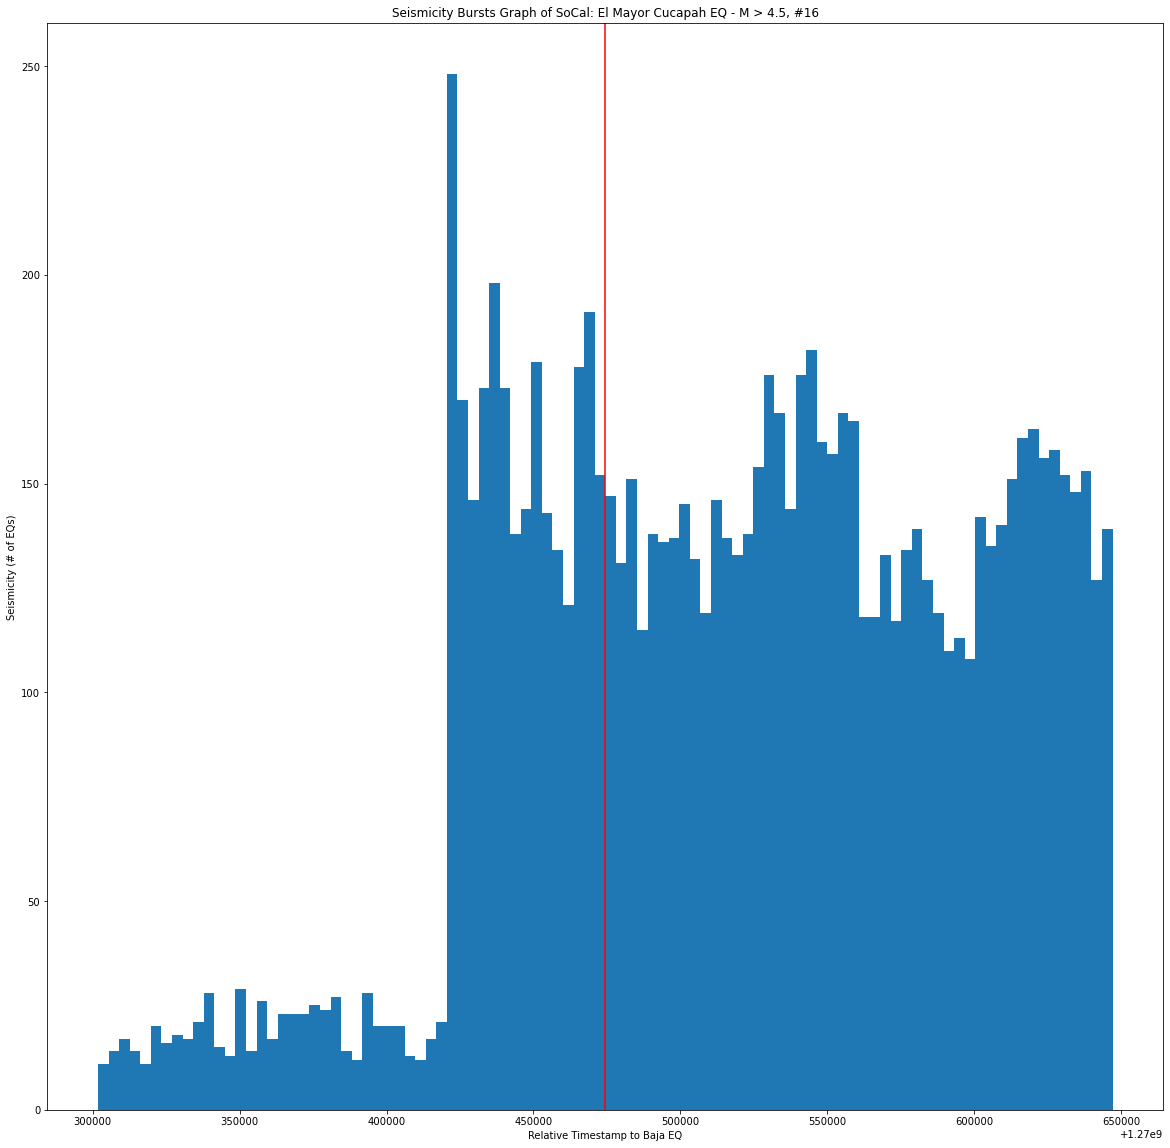

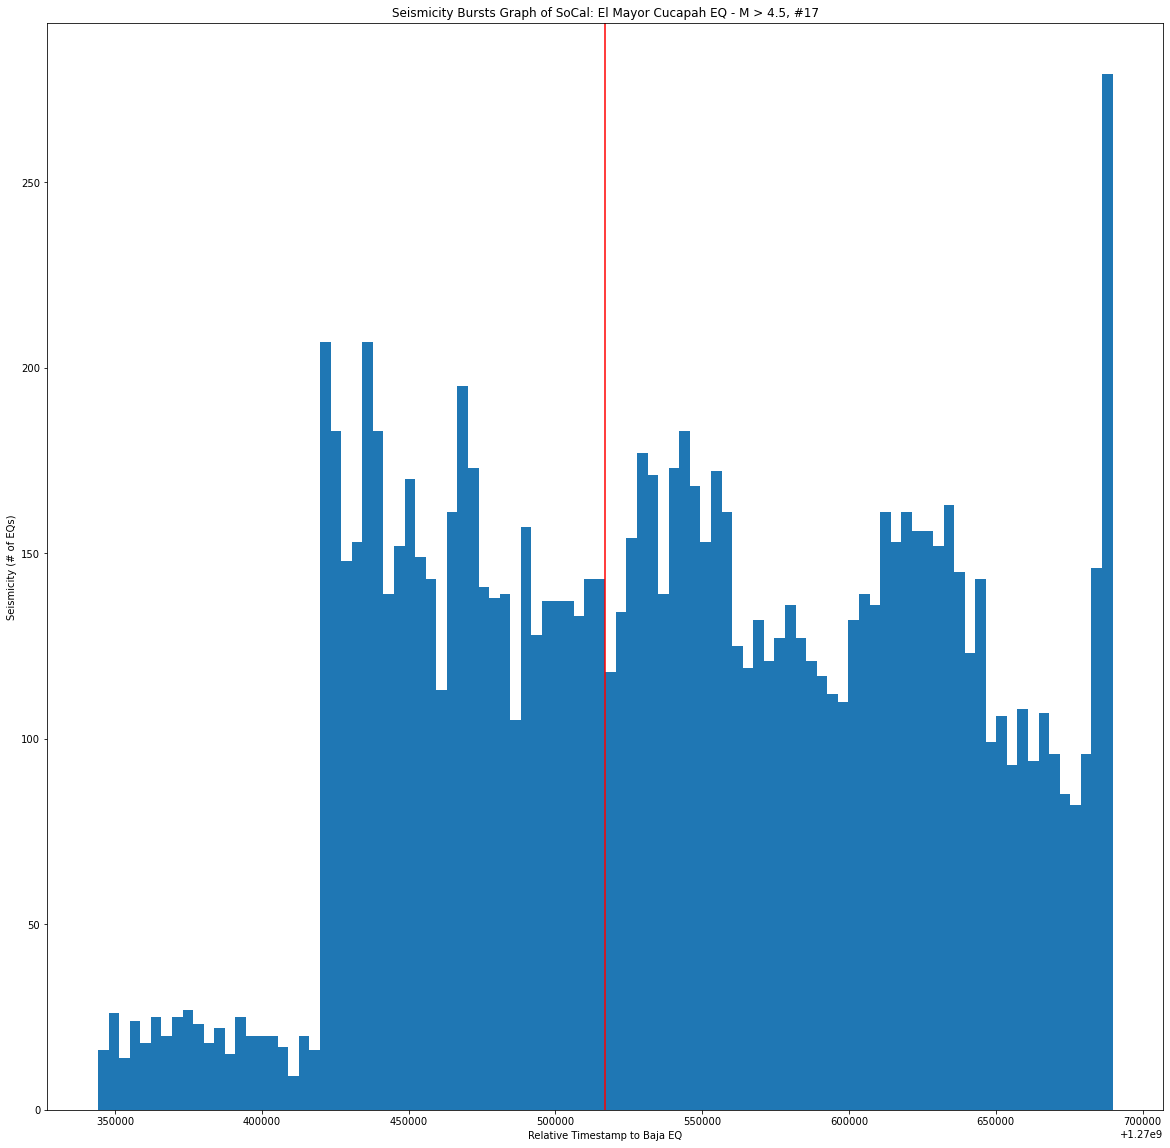

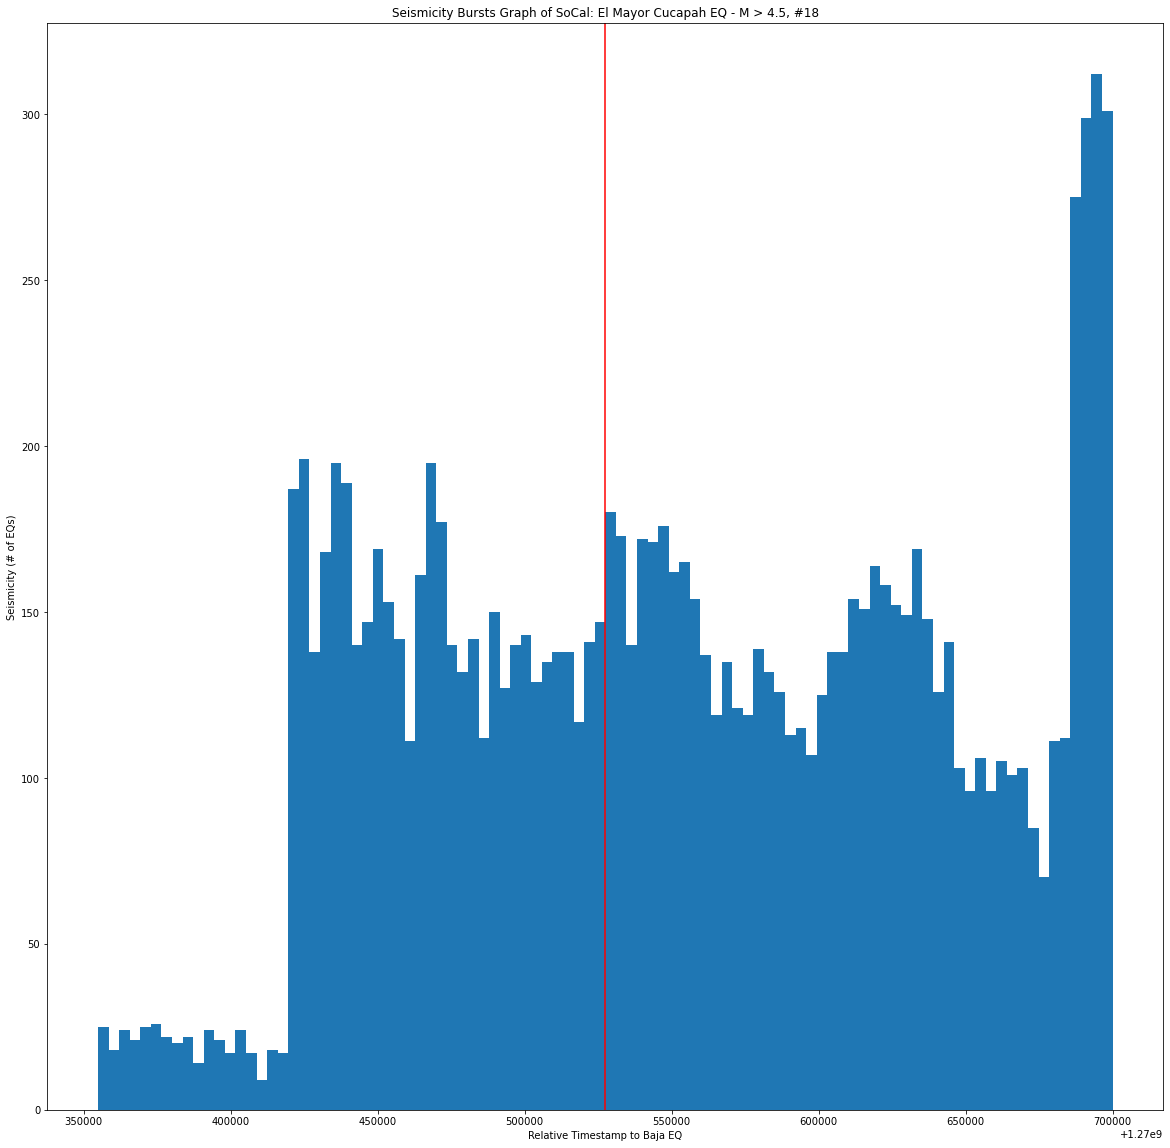

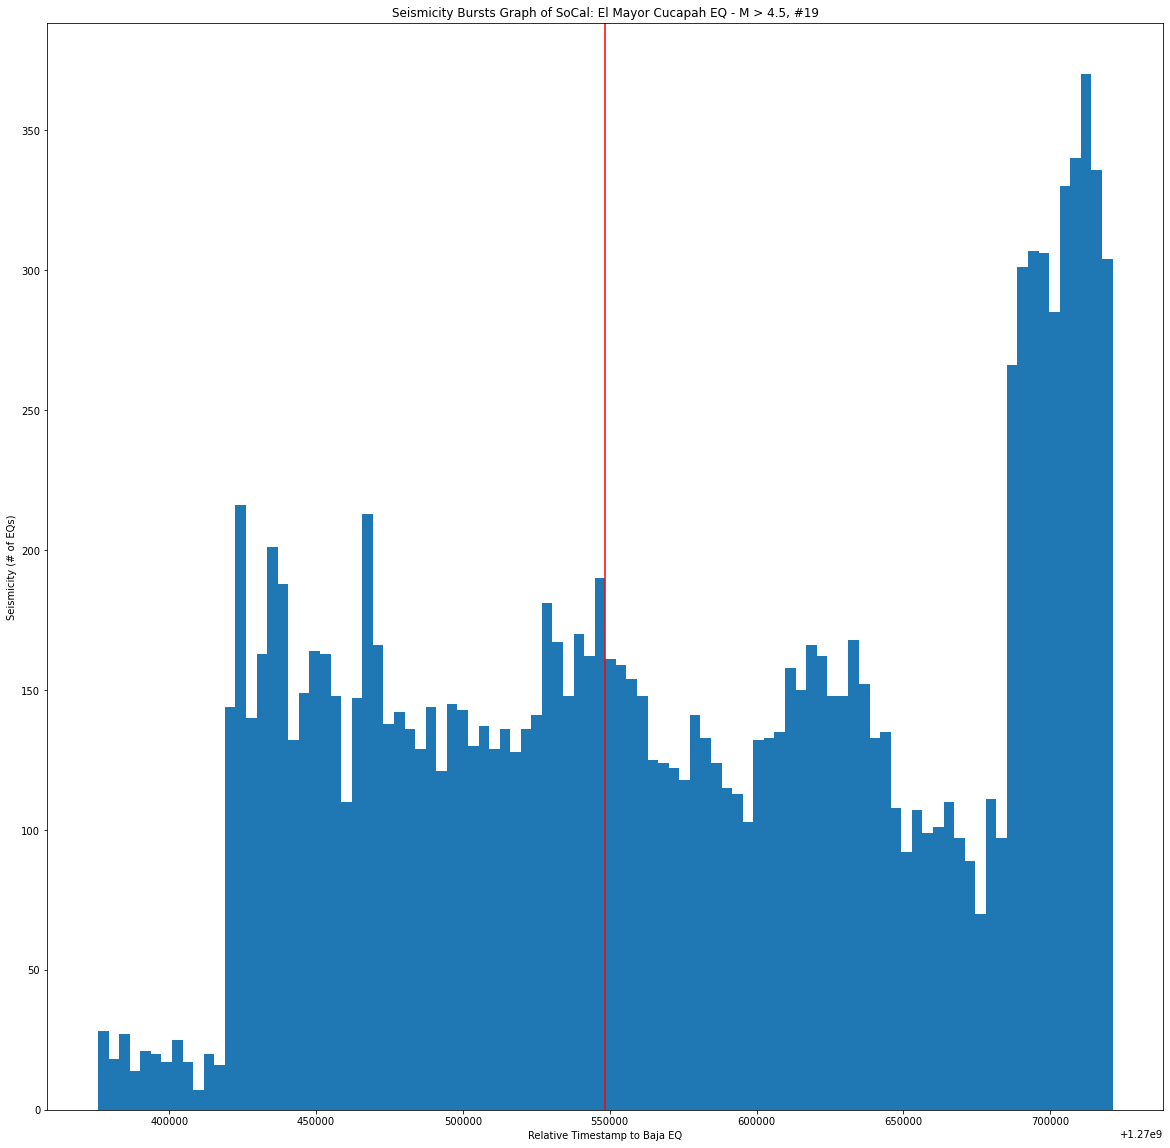

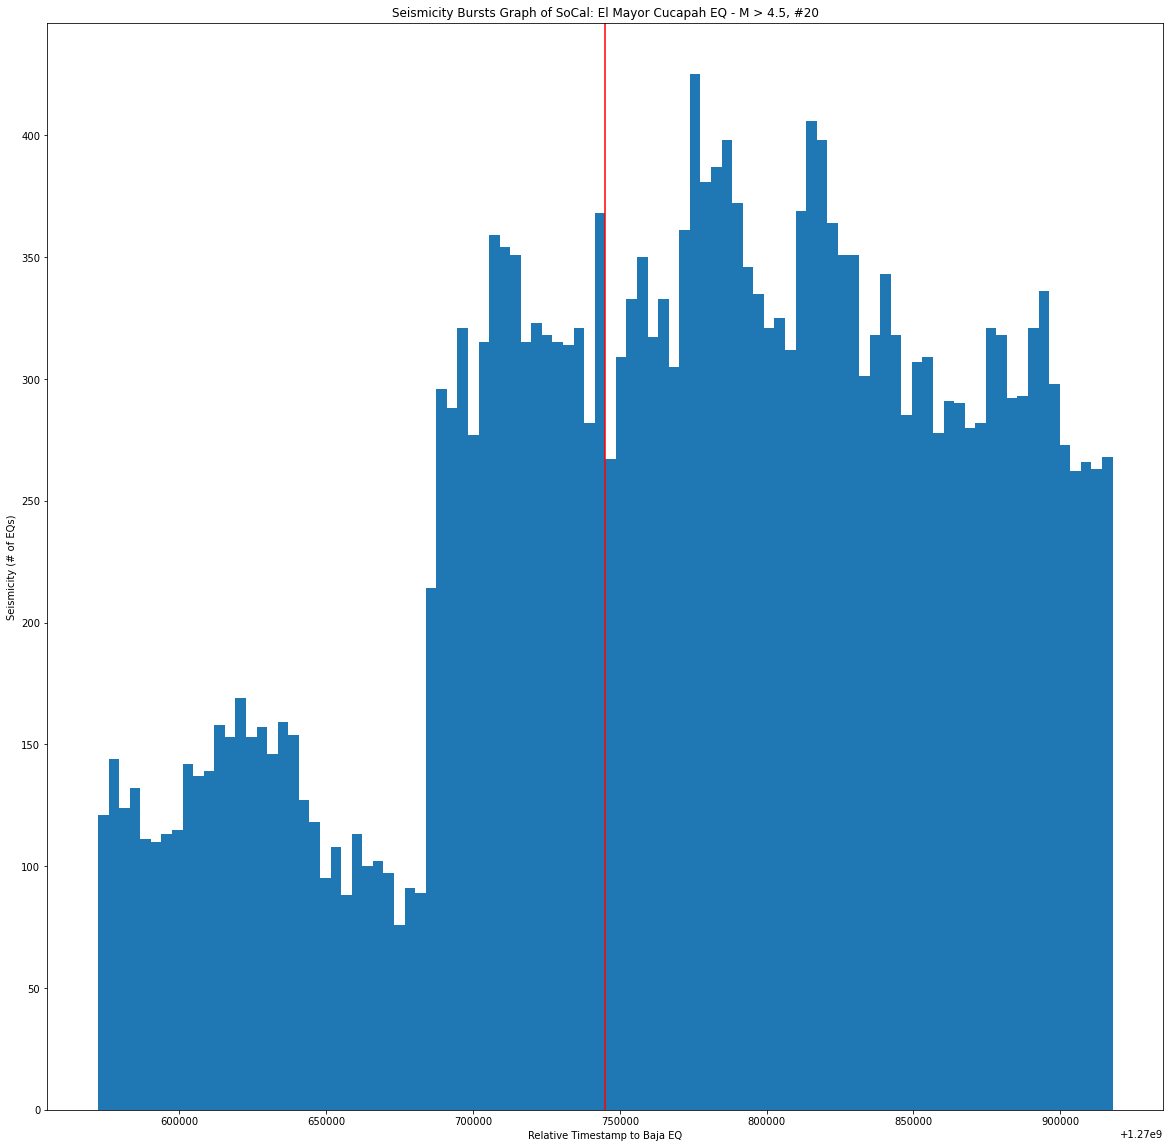

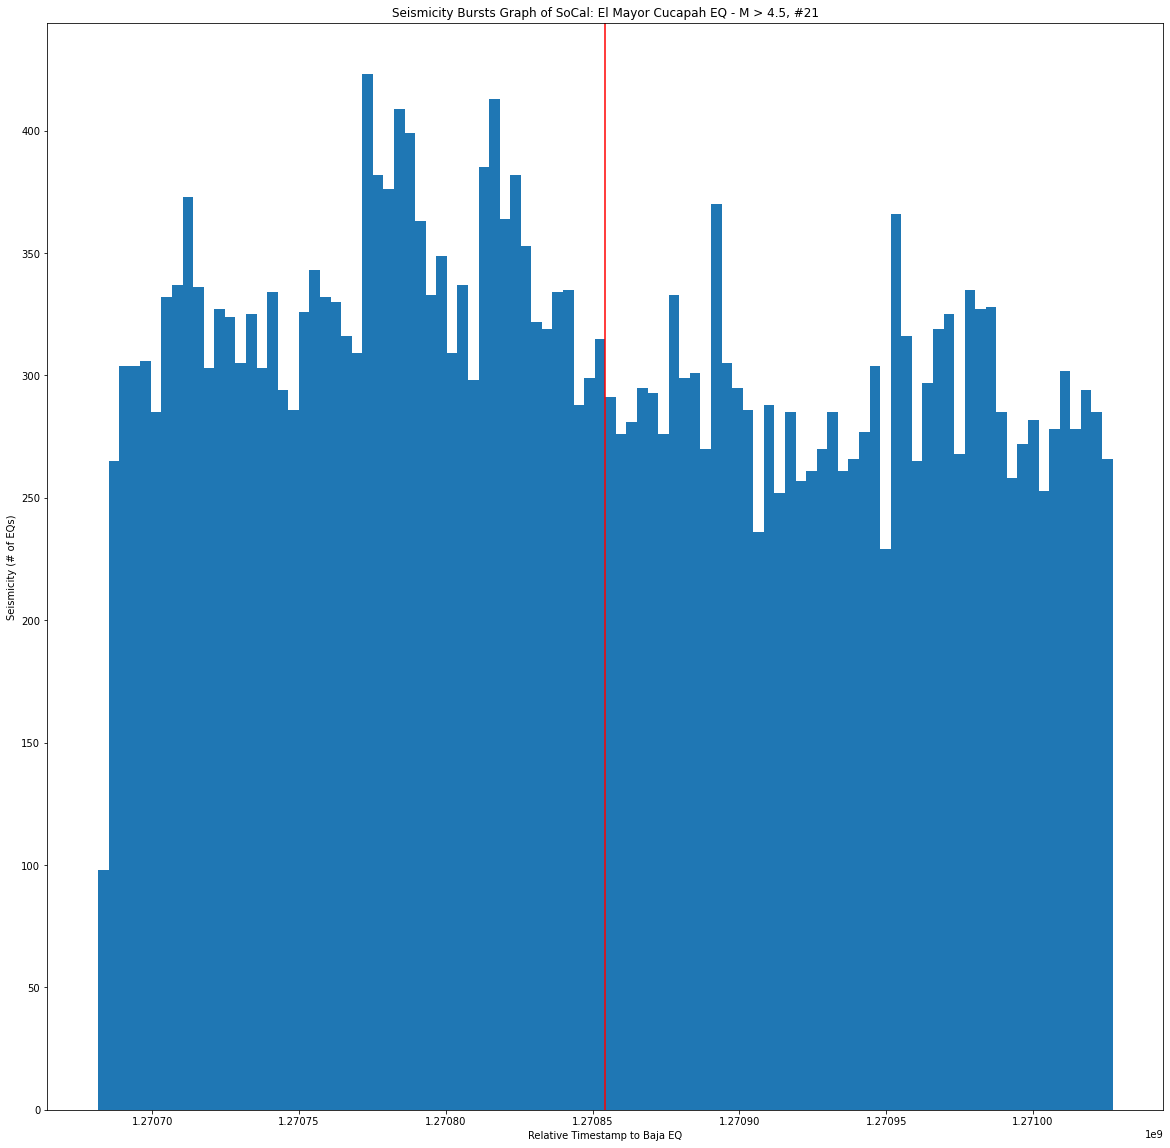

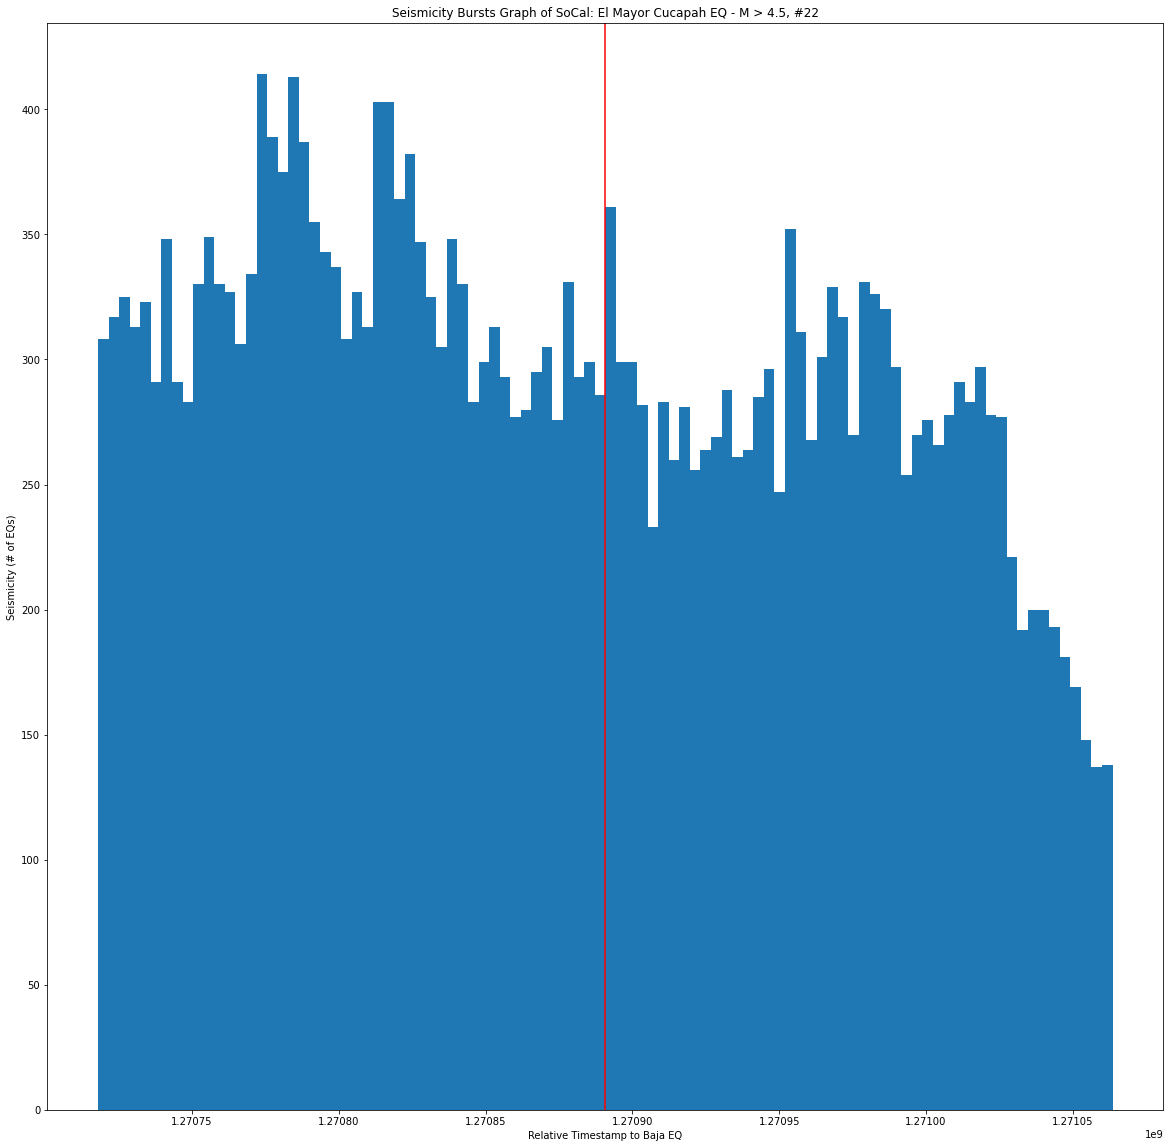

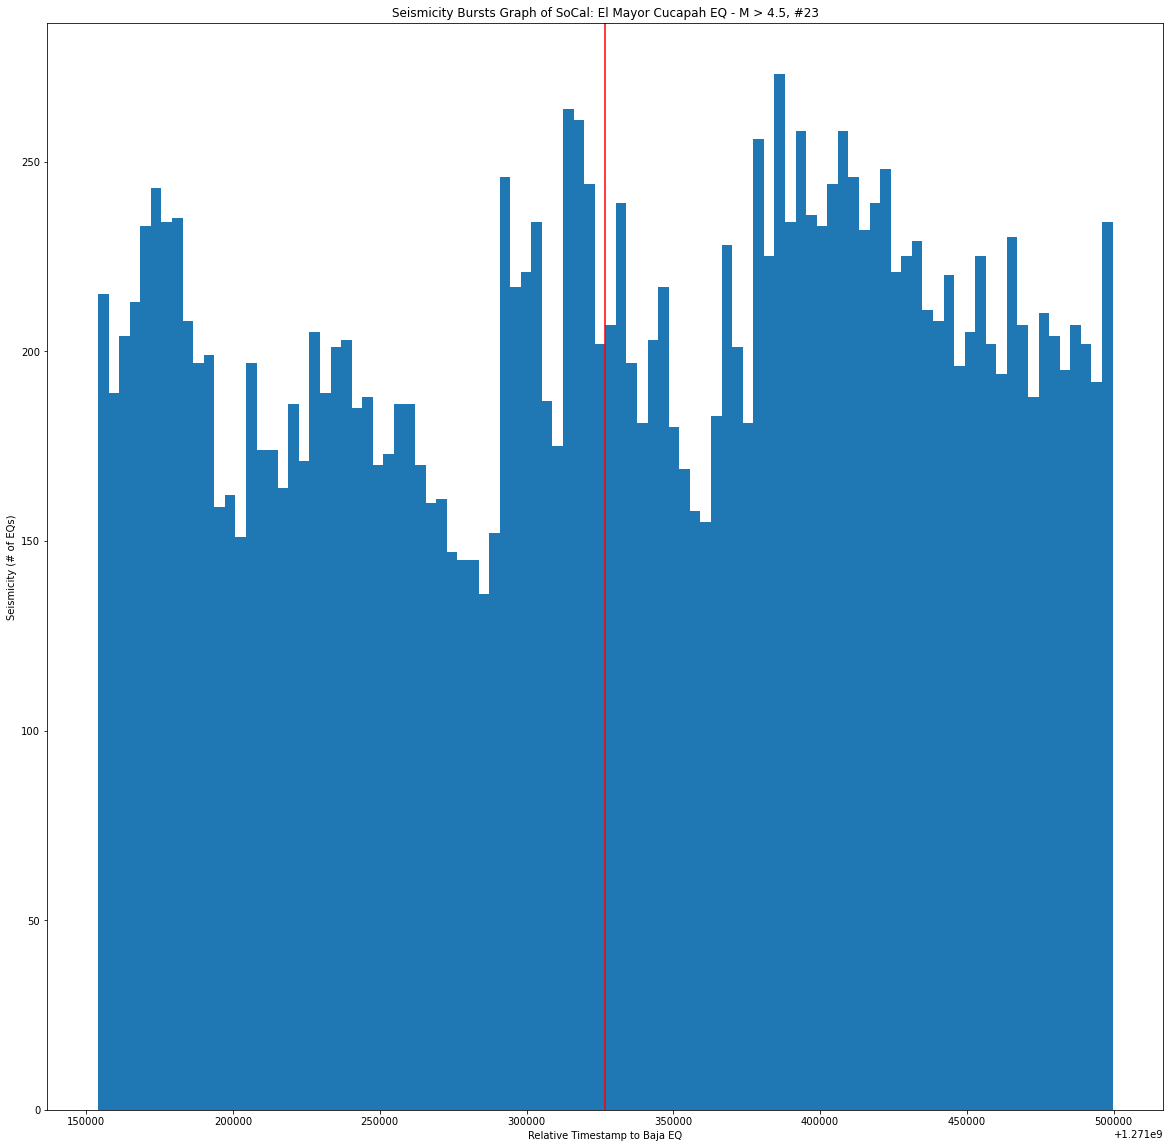

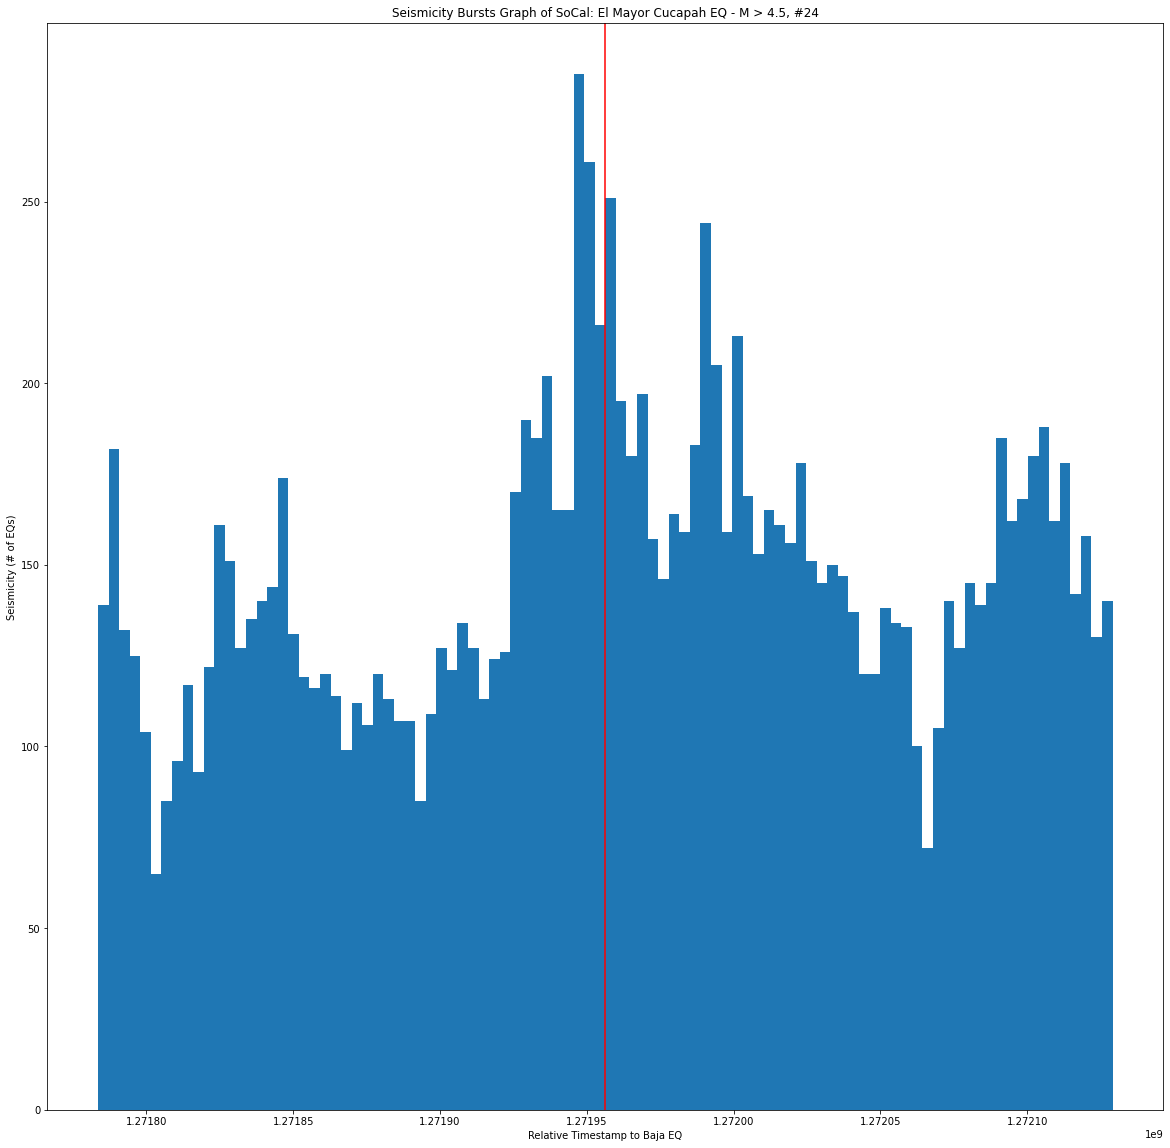

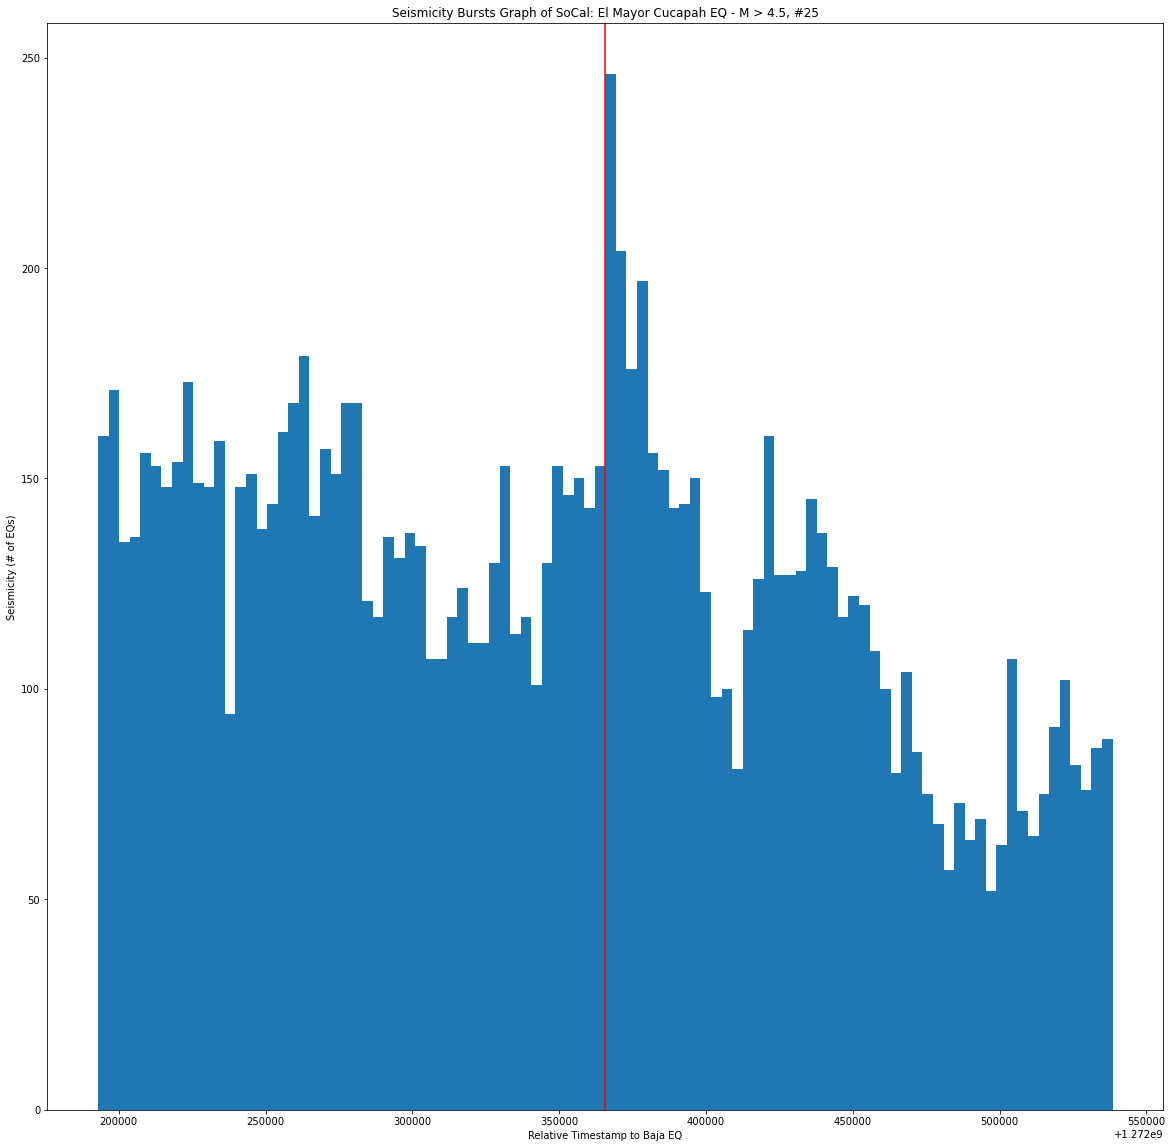

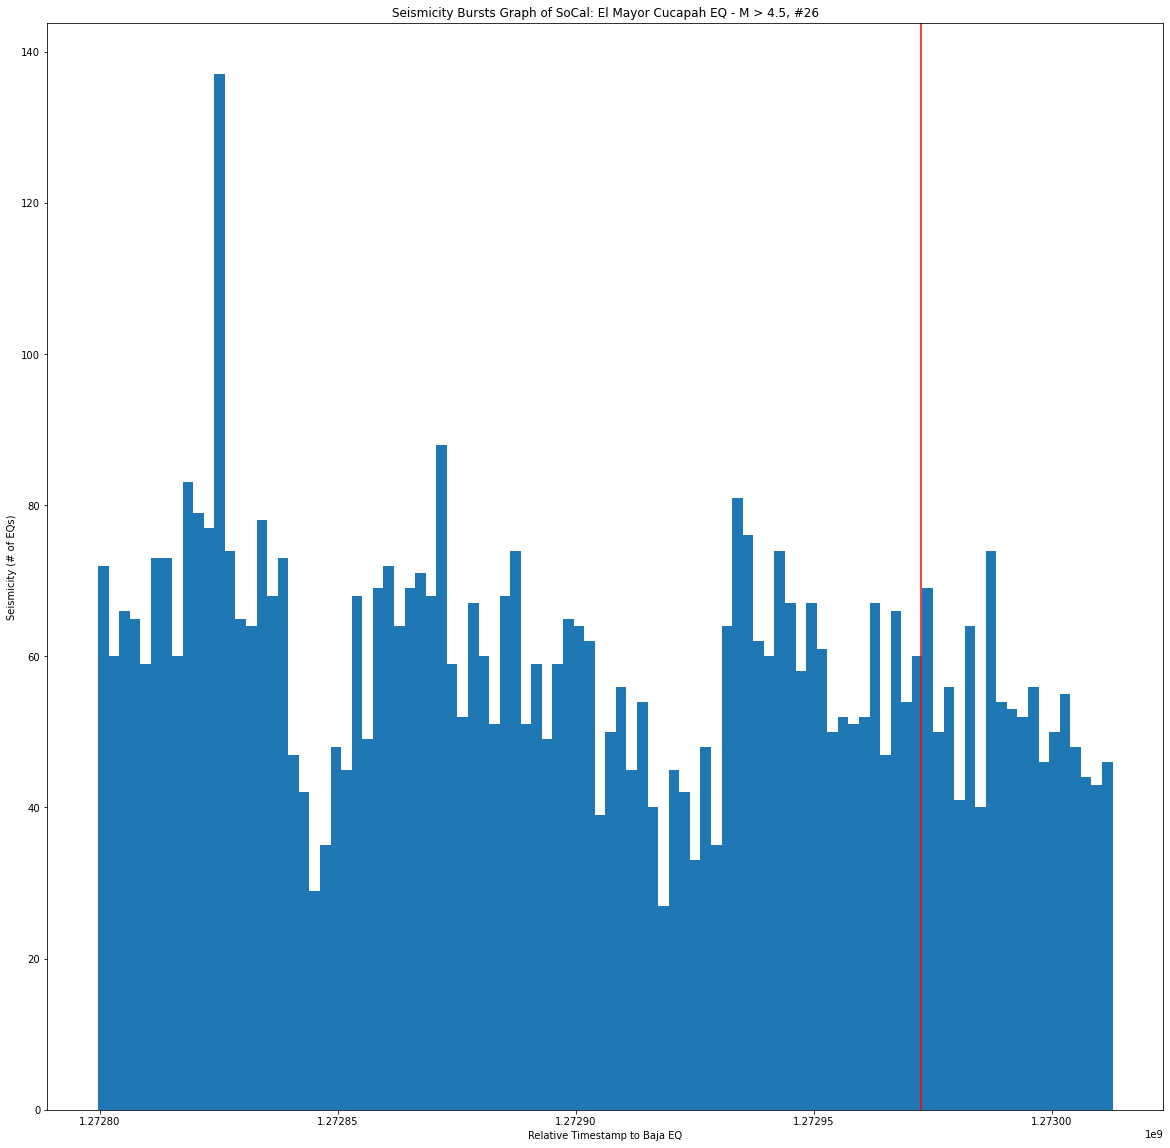

In [30]:
%%time
# 1: Seismicity bursts
# Start with seismicity, hours
j = 1
for i in HighMag4_5["TIMESTAMP"]: # Loop through each M >= 4.5 EQ
    fig = plt.figure(figsize=(20,20)); # Without this line, would use same plt plot
    QTM_SeisHrsBurstTEMP = QTM_Range.loc[QTM_Range["TIMESTAMP"] >= i - 48*60*60]
    QTM_SeisHrsBurstTEMP = QTM_SeisHrsBurstTEMP[QTM_SeisHrsBurstTEMP["TIMESTAMP"] <= i + 48*60*60]
    # Create temporary df to graph from each individual EQ
    plt.hist(QTM_SeisHrsBurstTEMP["TIMESTAMP"], bins = 4*24); # Histogram showing # EQs per relative day; 
    # the # of bins = # of hours, including day 0, when Baja EQ occurred
    plt.xlabel("Relative Timestamp to Baja EQ");
    plt.ylabel("Seismicity (# of EQs)");
    plt.title("Seismicity Bursts Graph of SoCal: El Mayor Cucapah EQ - M > 4.5, #" + str(j));
    #plt.xticks(np.arange(-48, 48, step = 2));
    plt.axvline(x = i, color = "r");
    plt.savefig("SeisHrsBursts_4.5_" + str(j) + ".png", facecolor = "white")
    j += 1

Wall time: 8.08 s


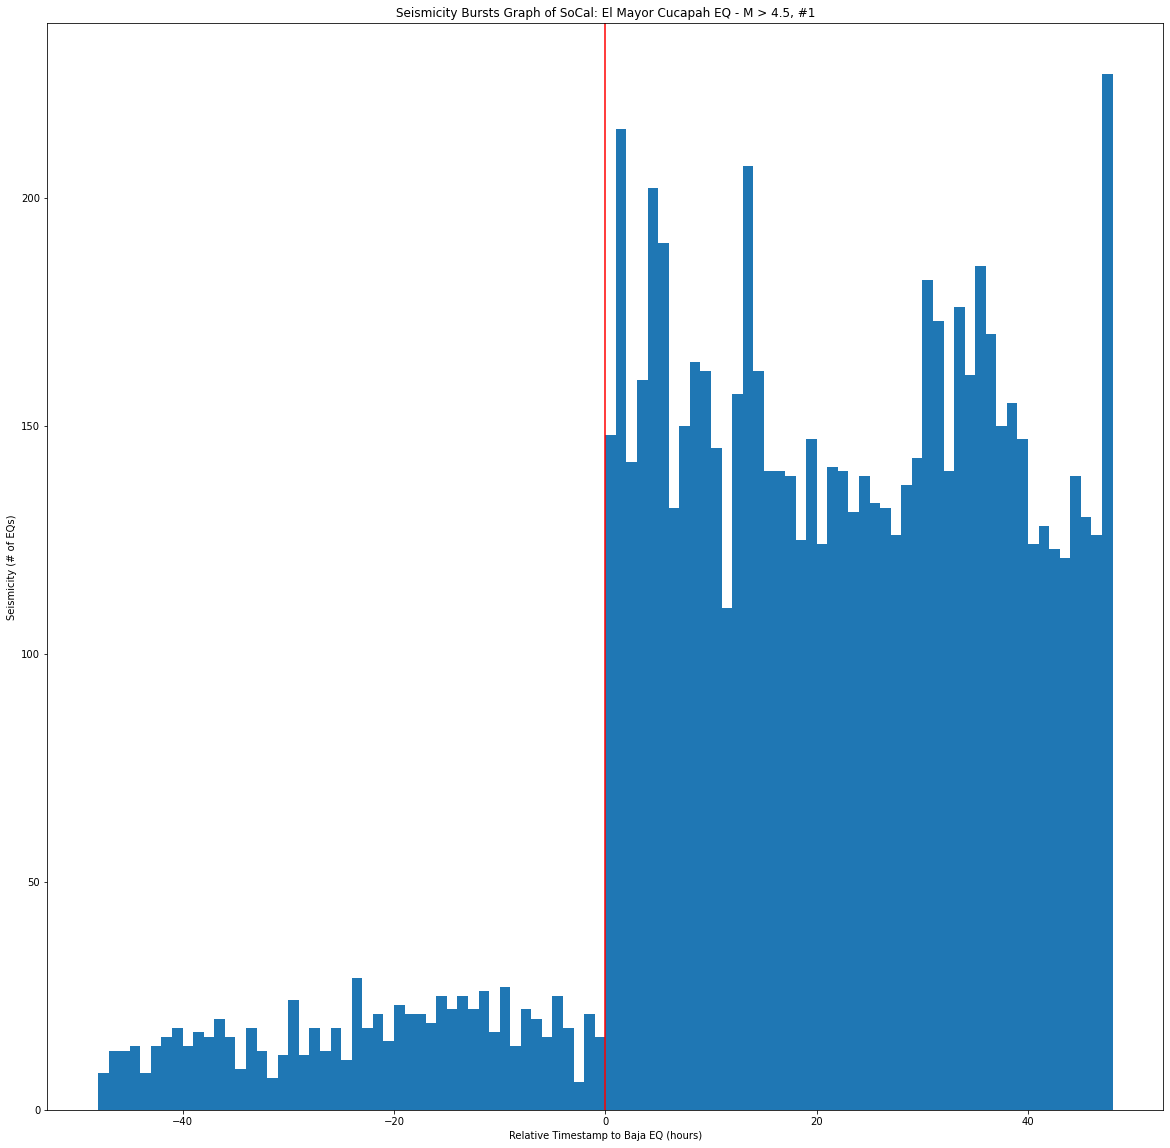

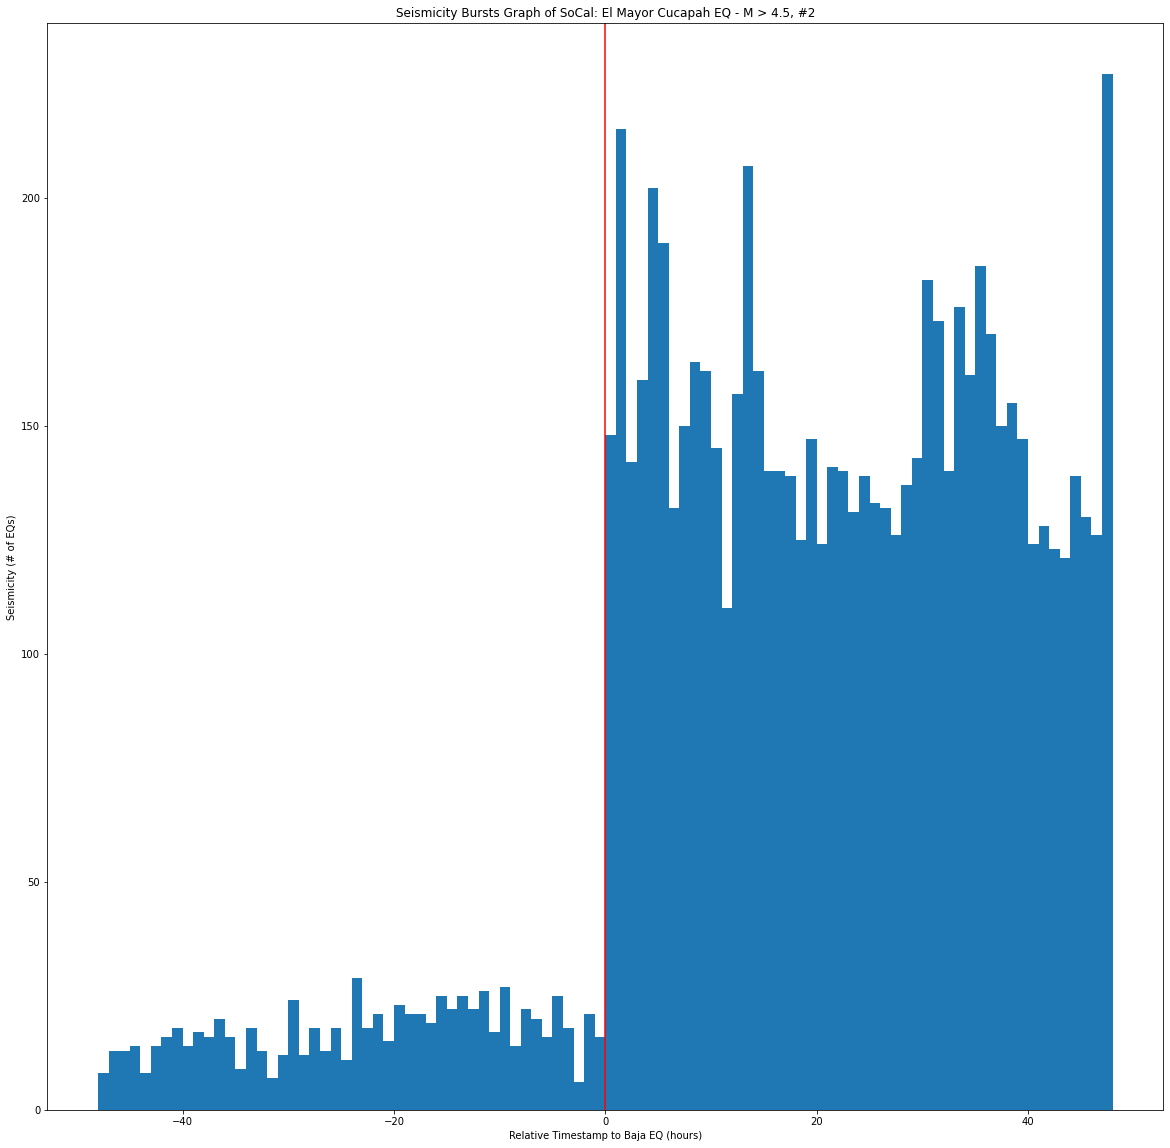

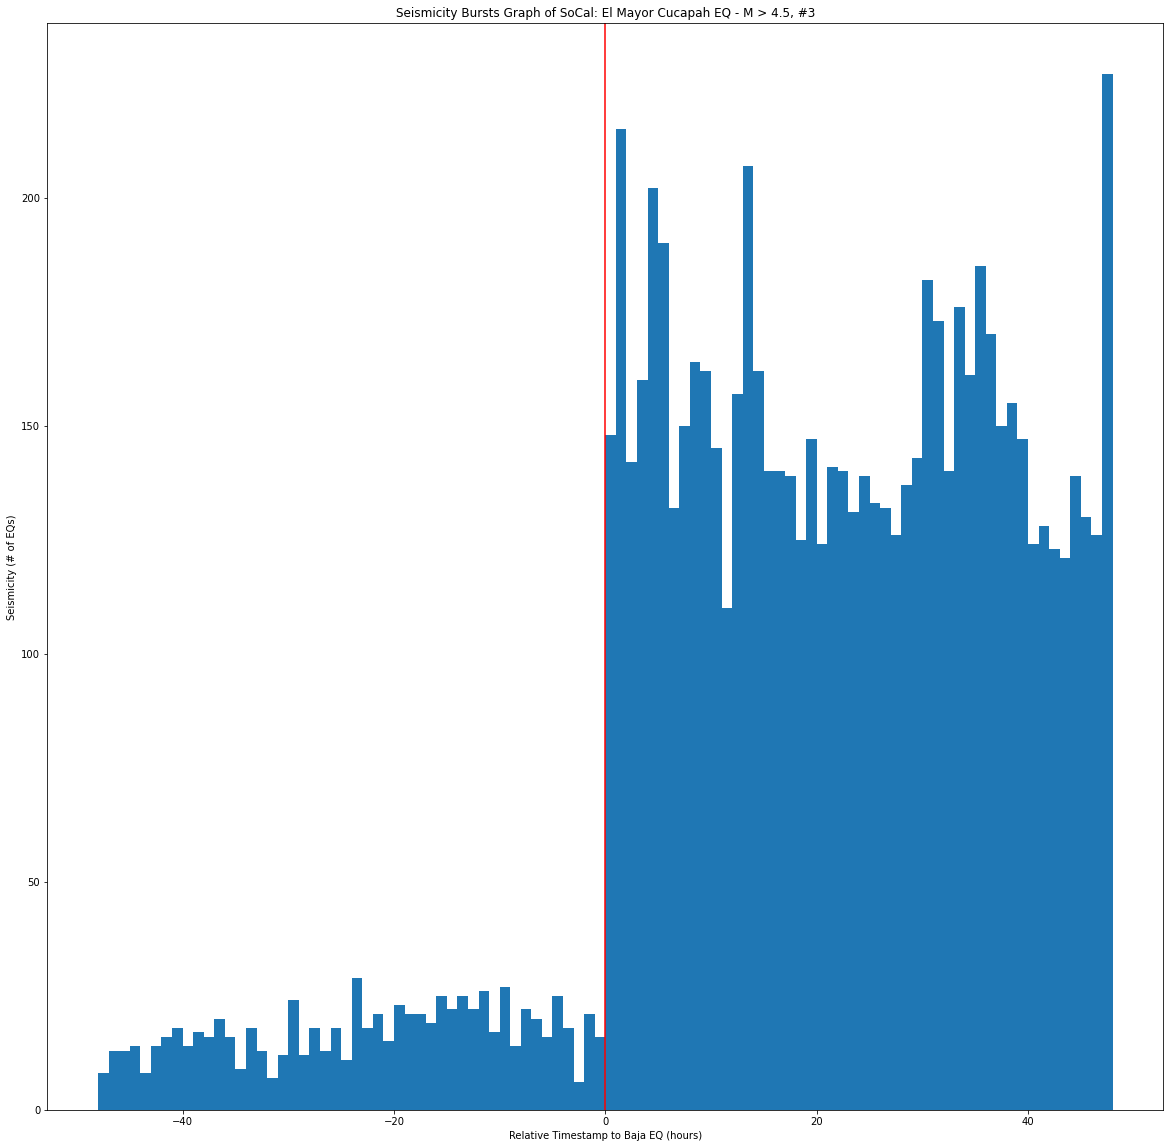

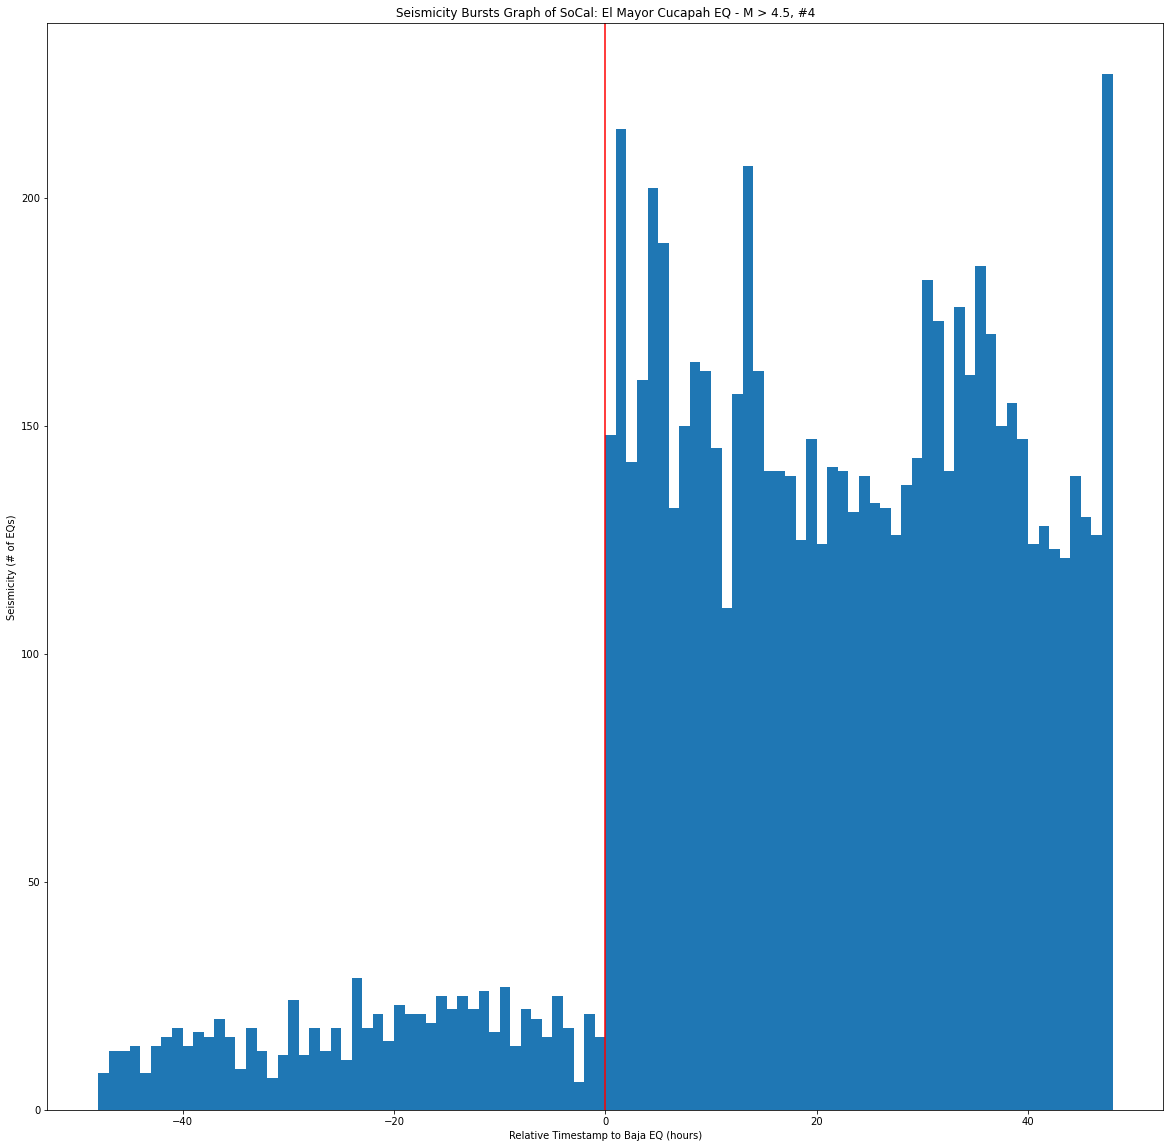

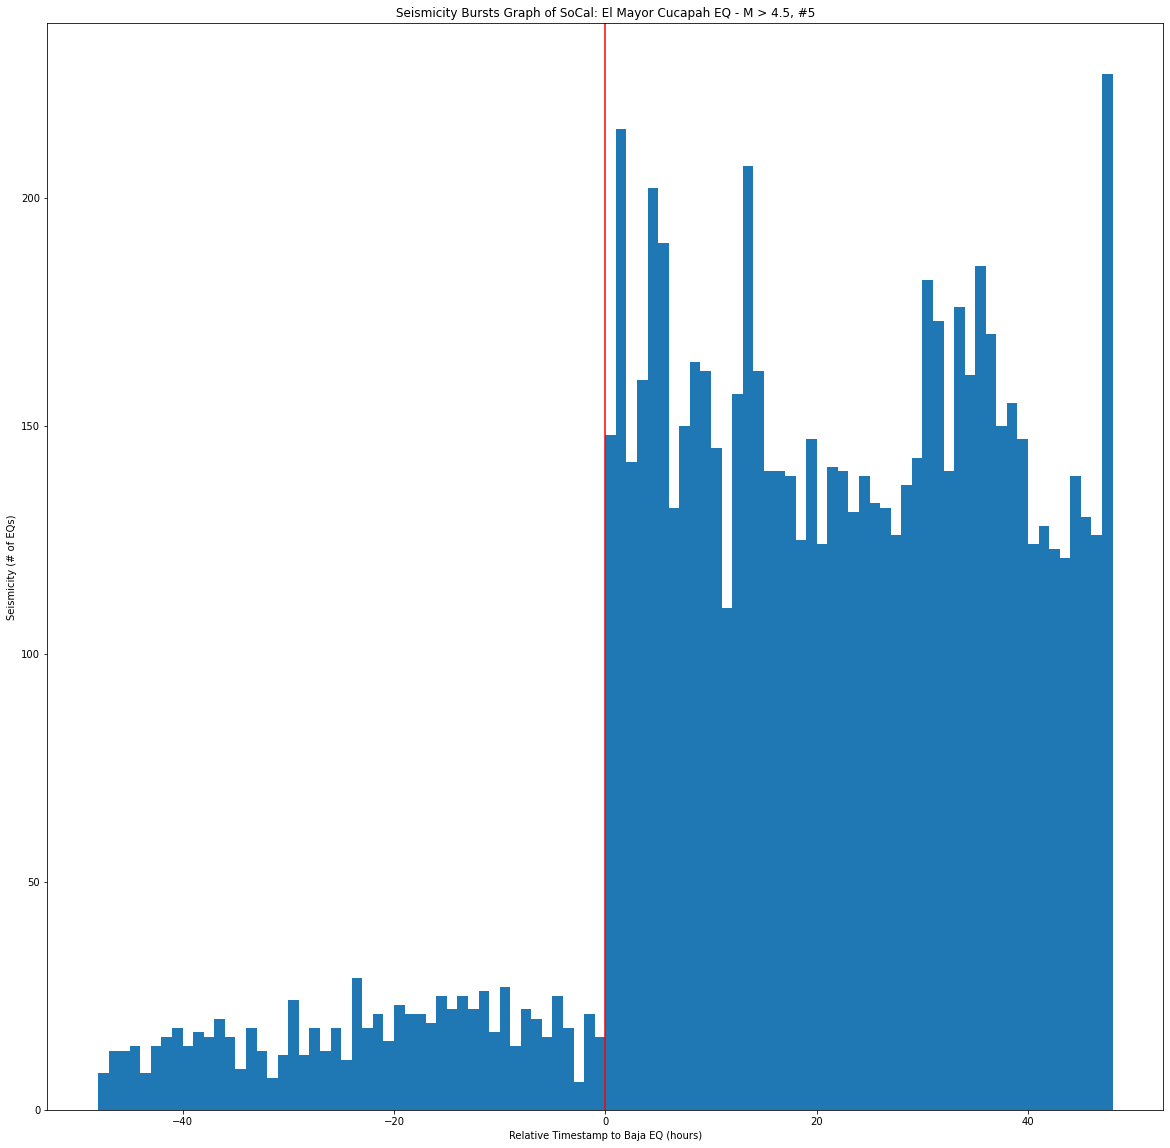

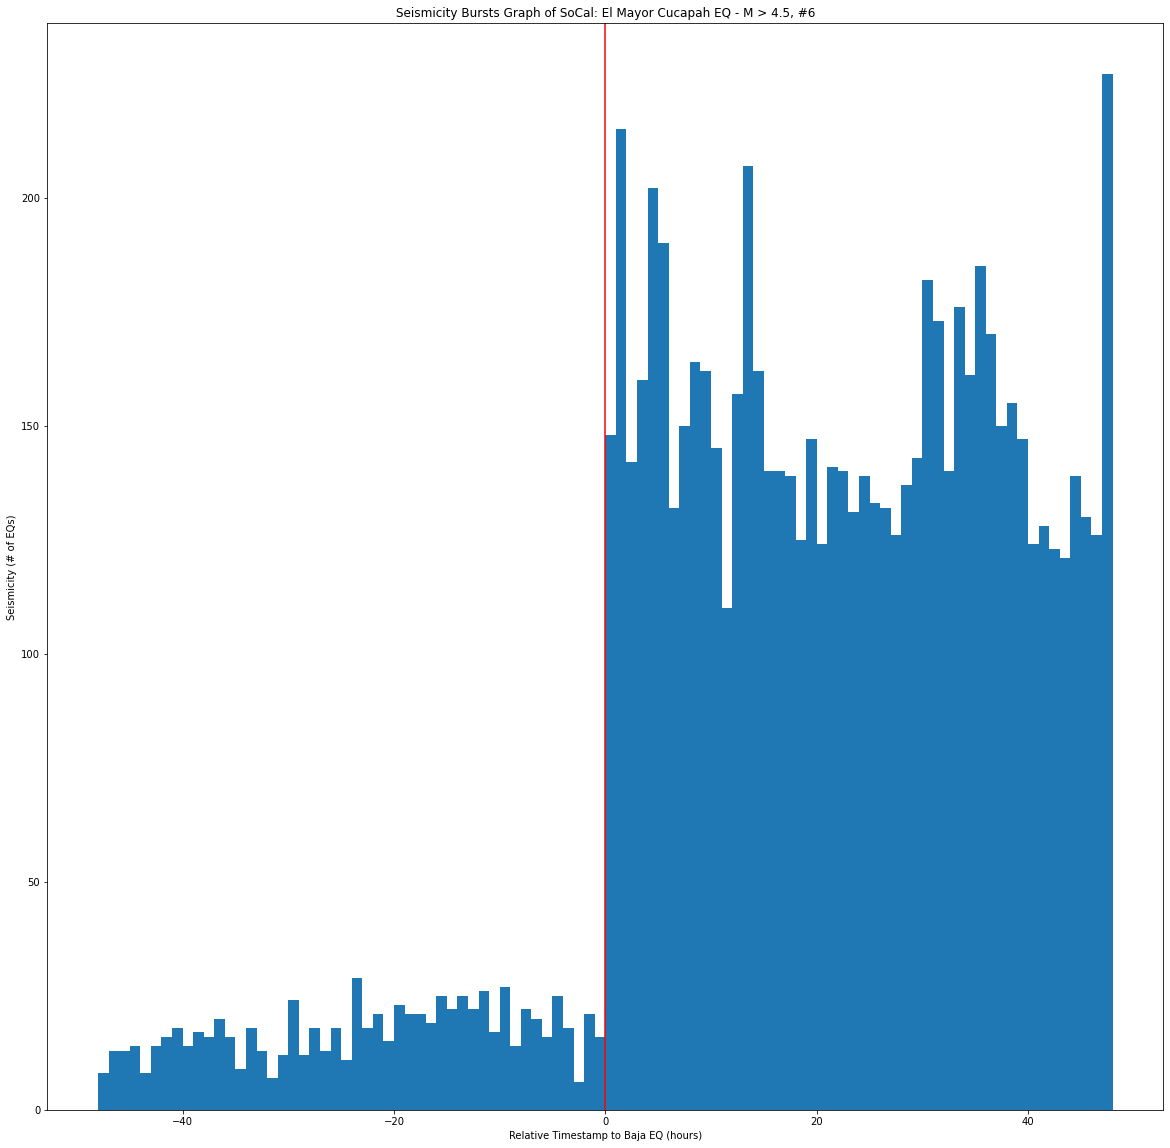

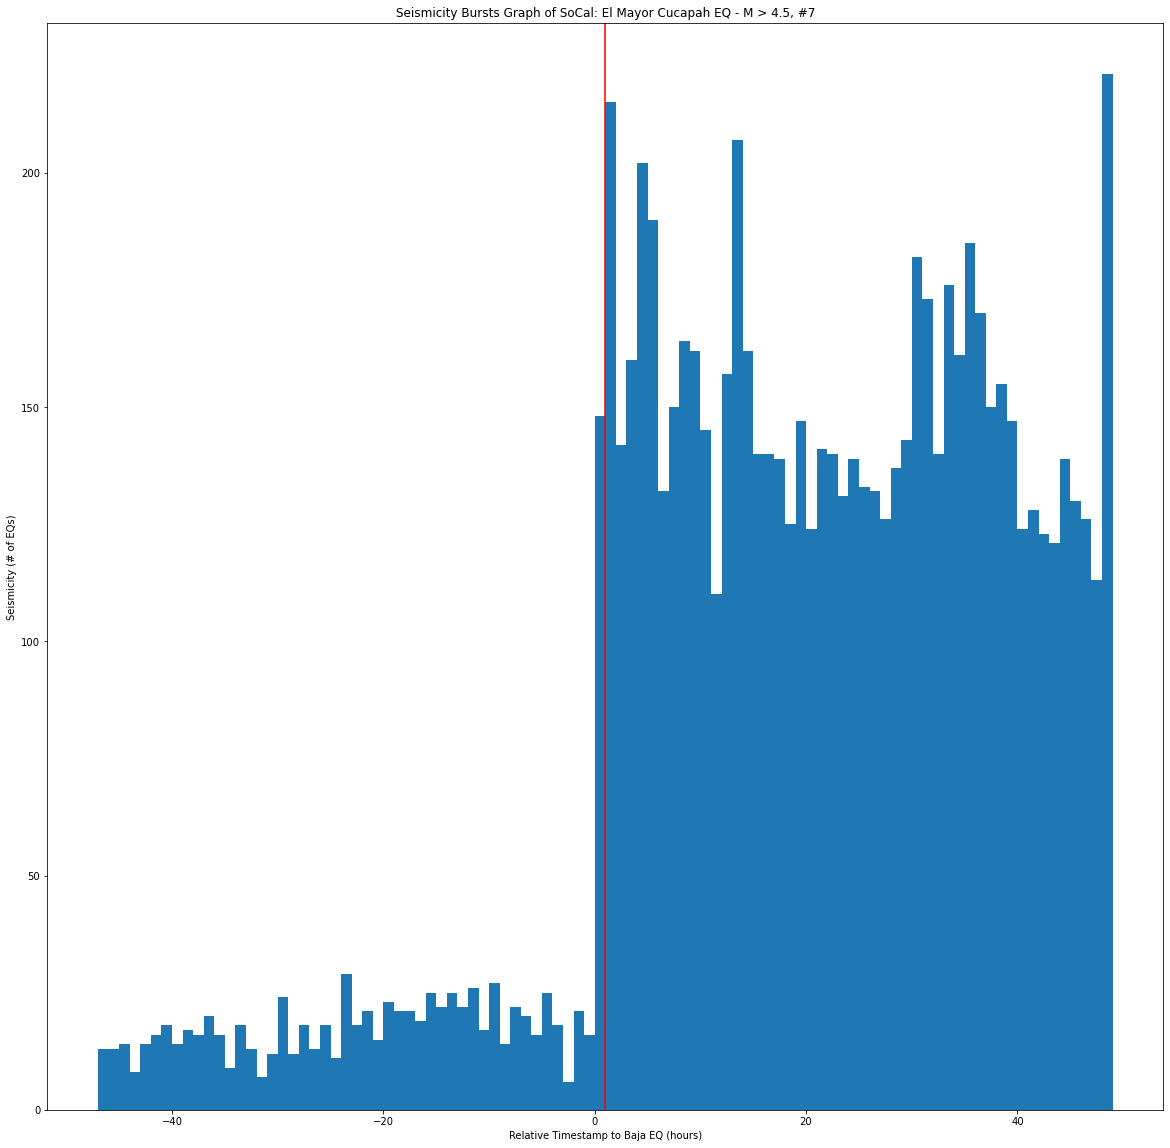

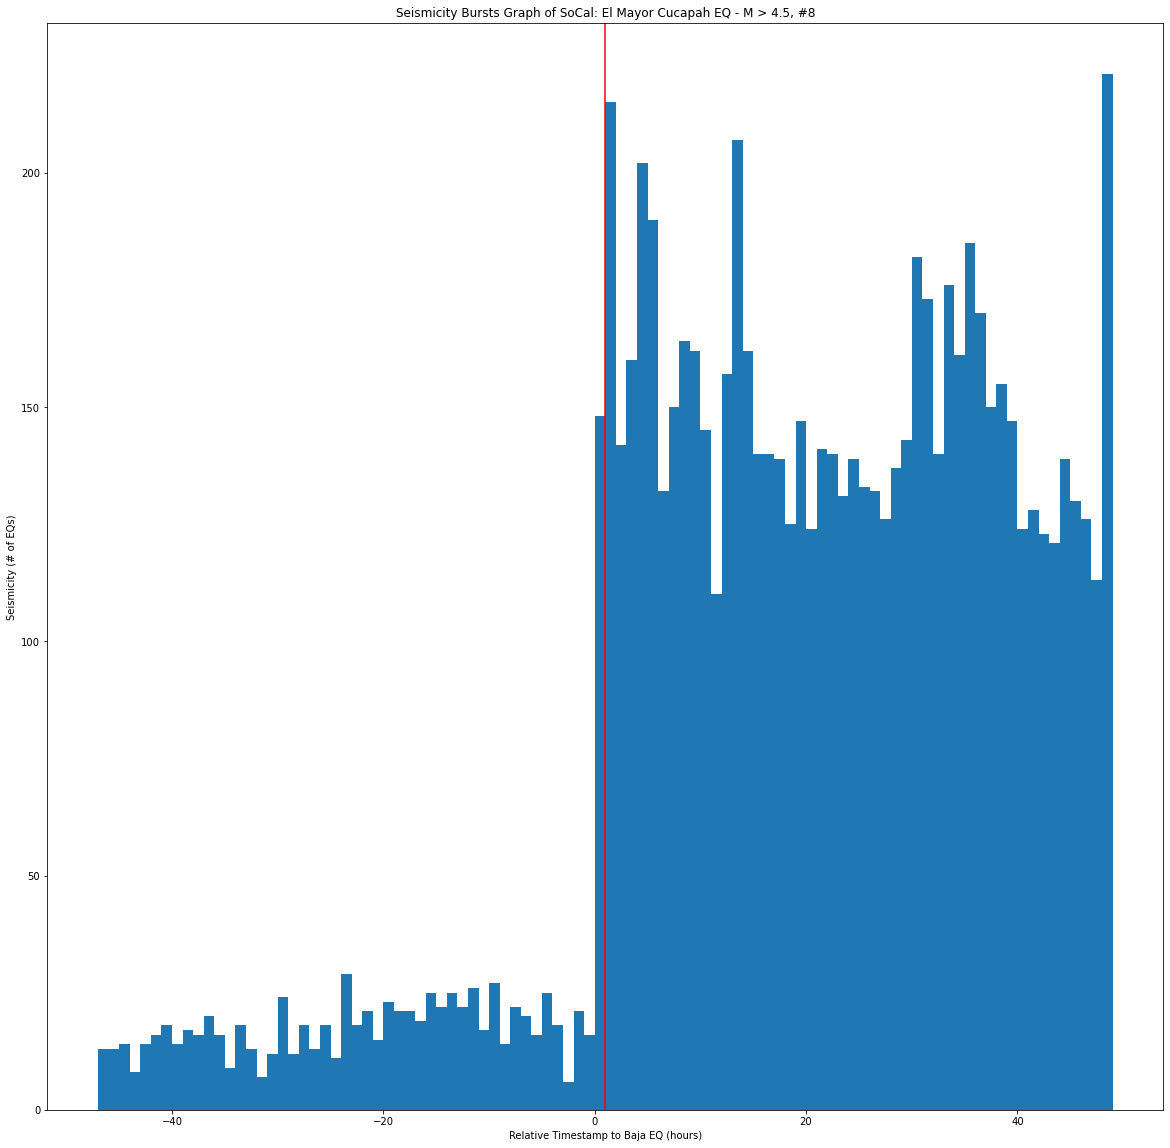

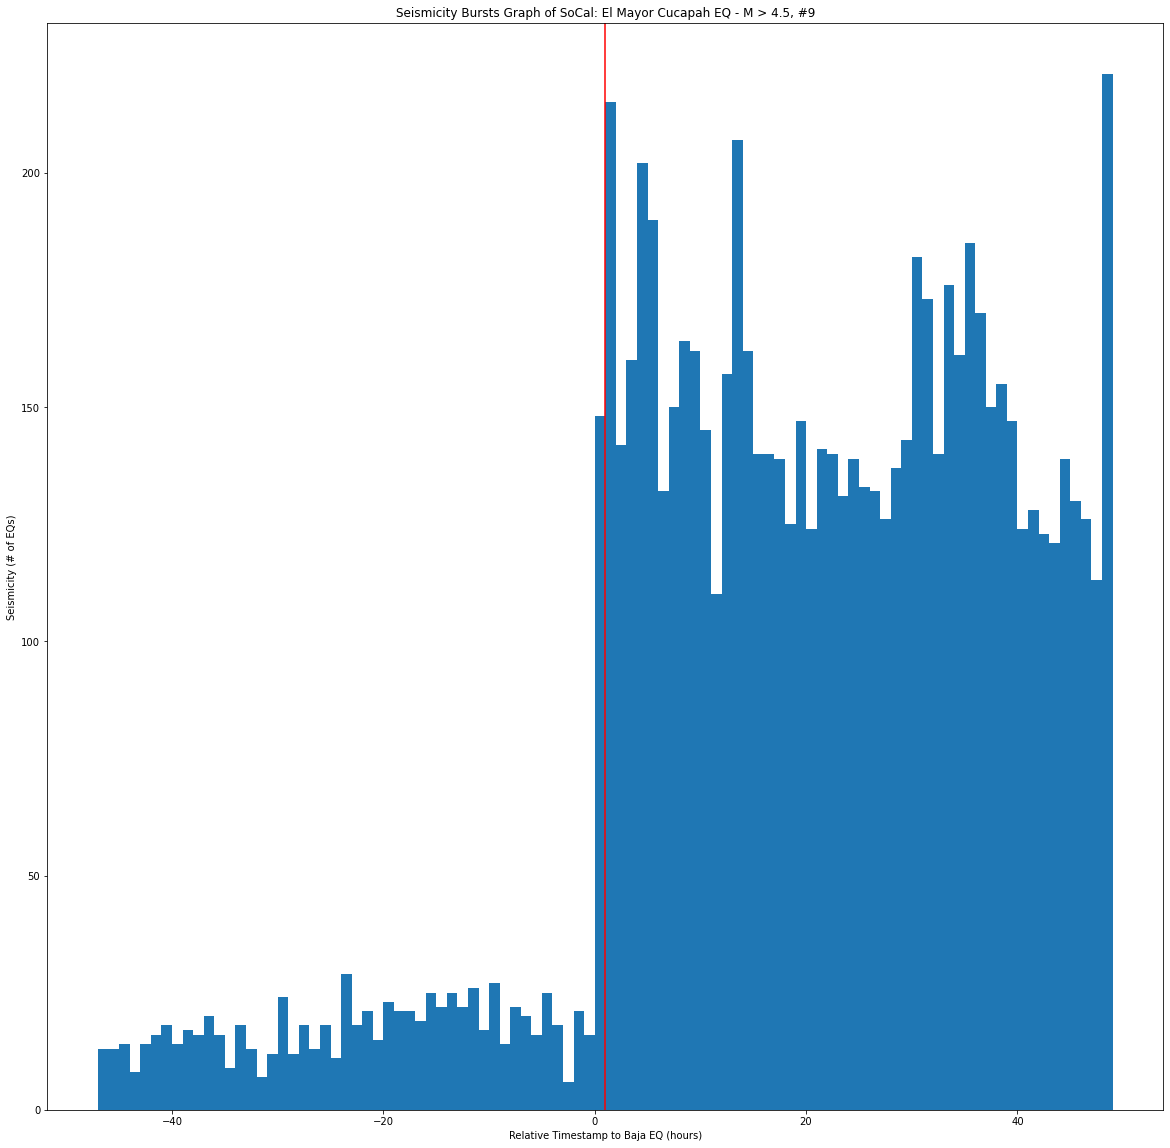

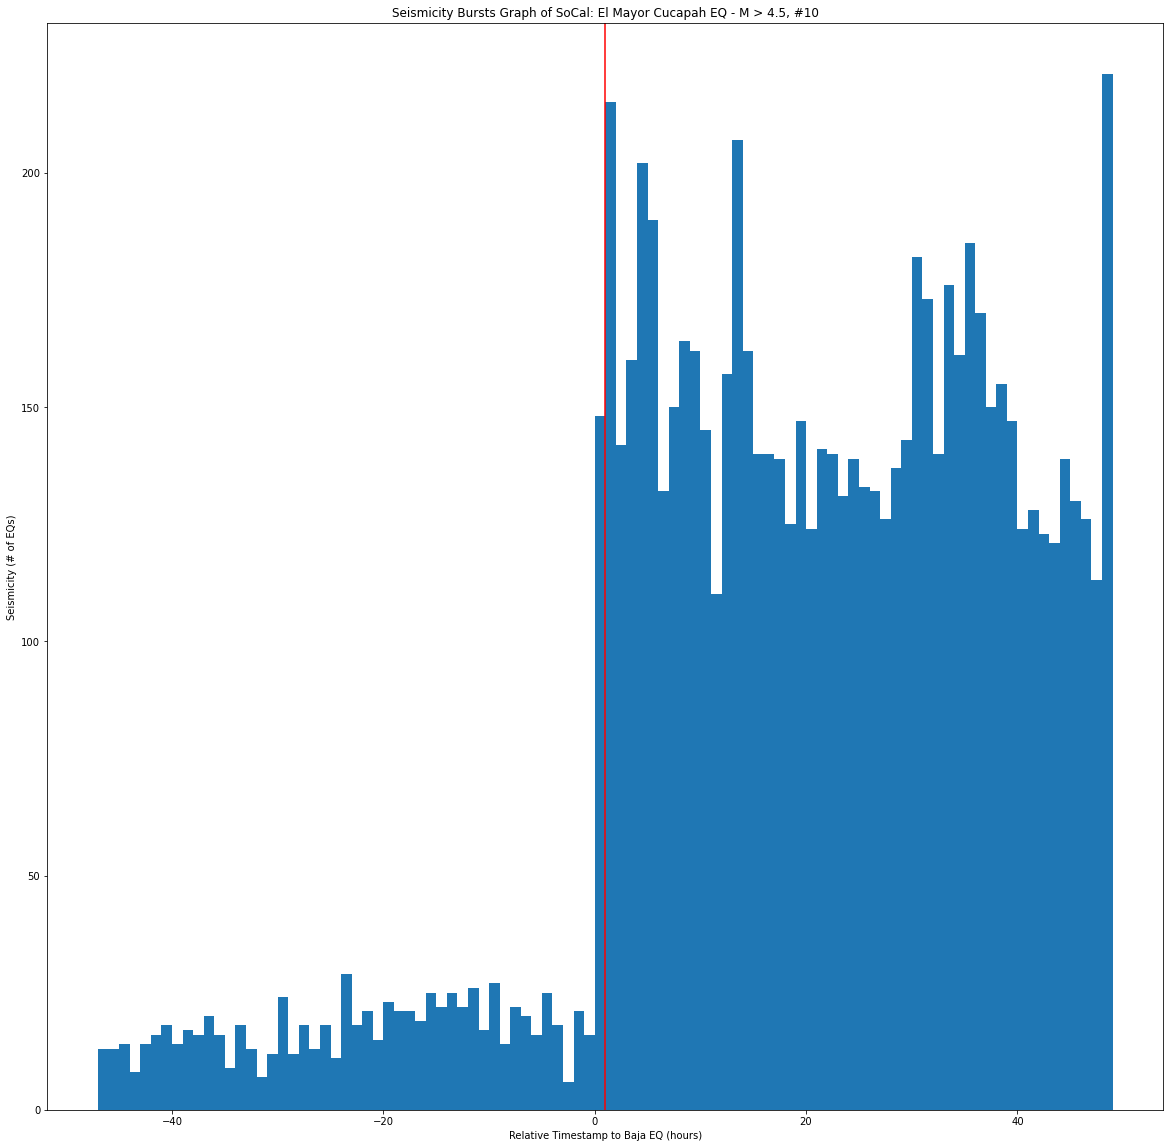

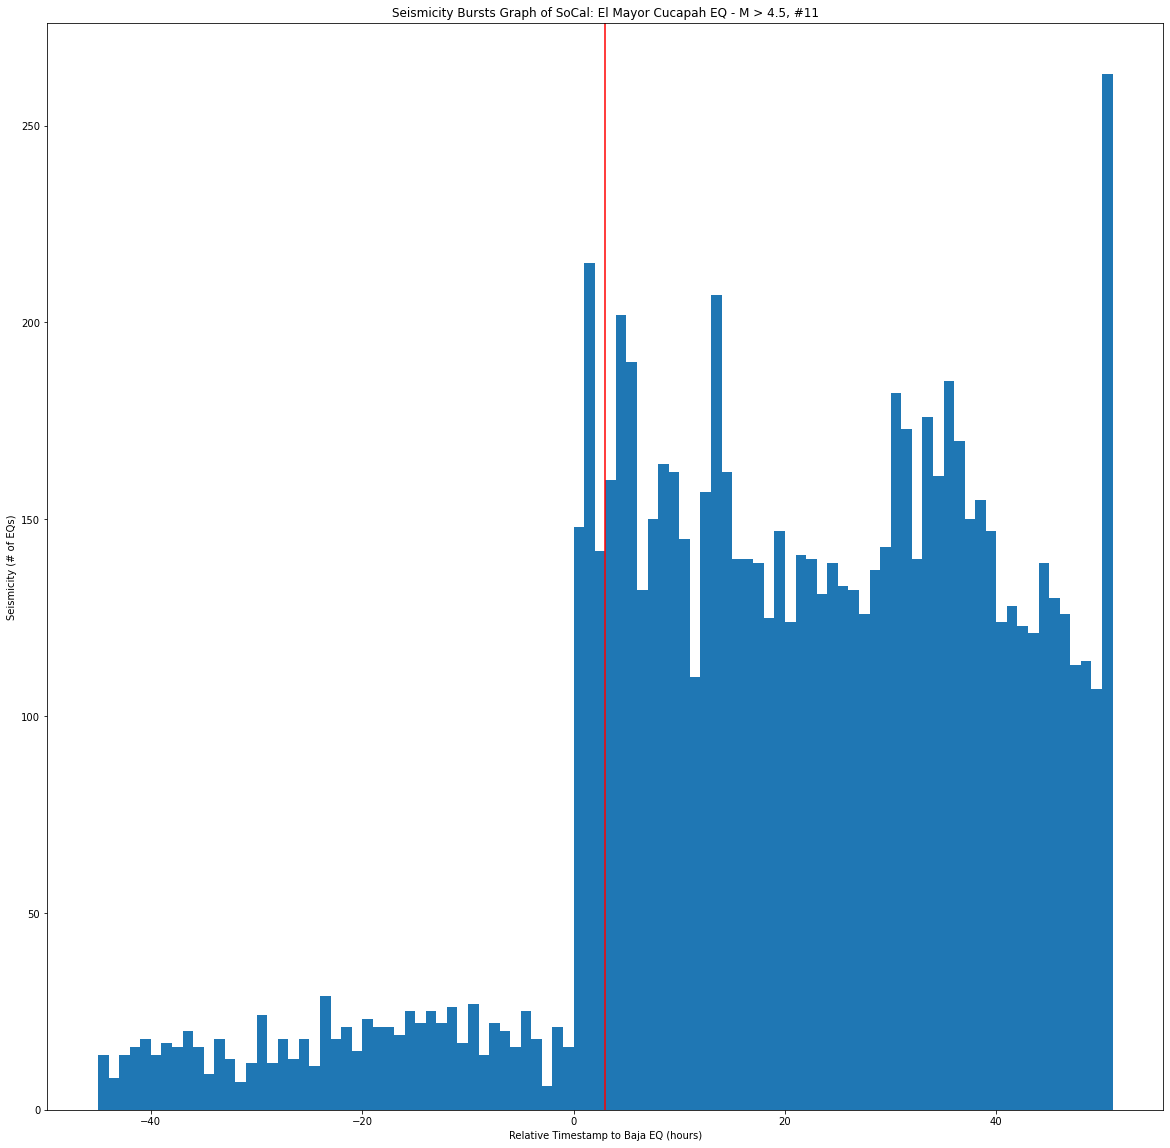

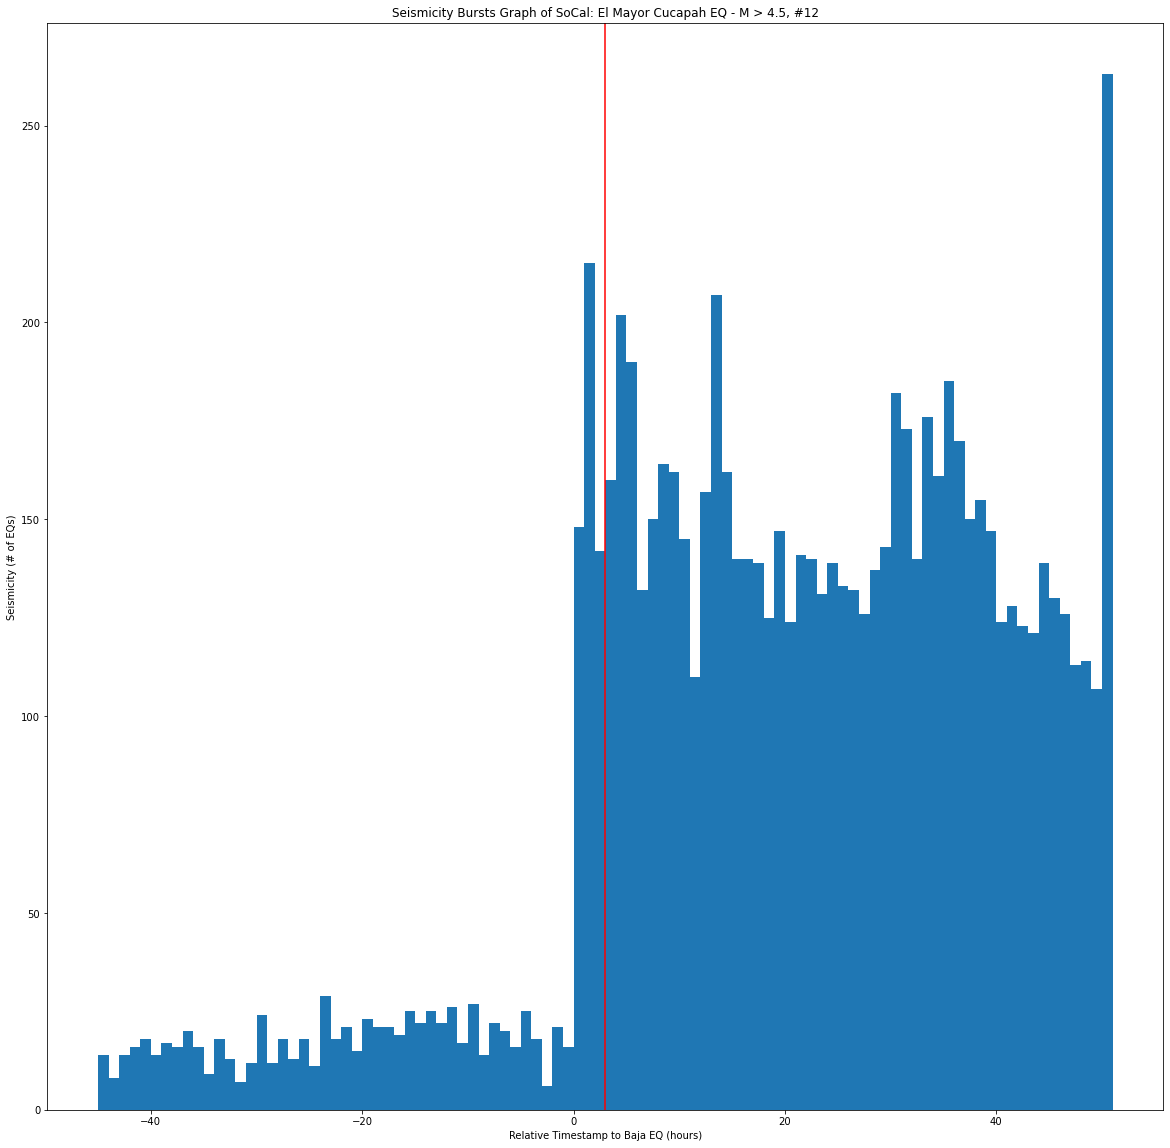

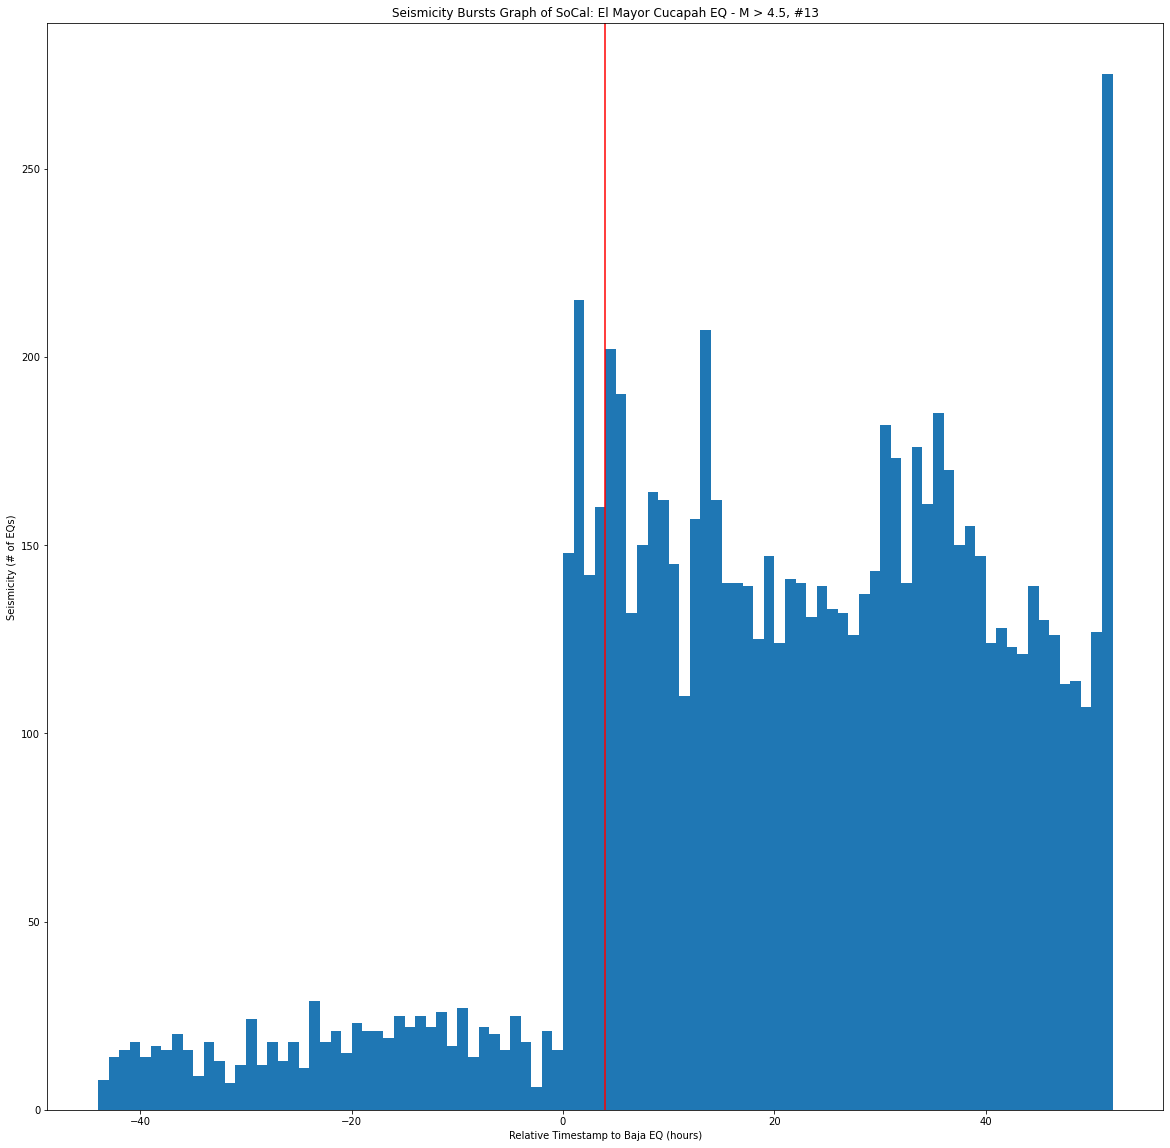

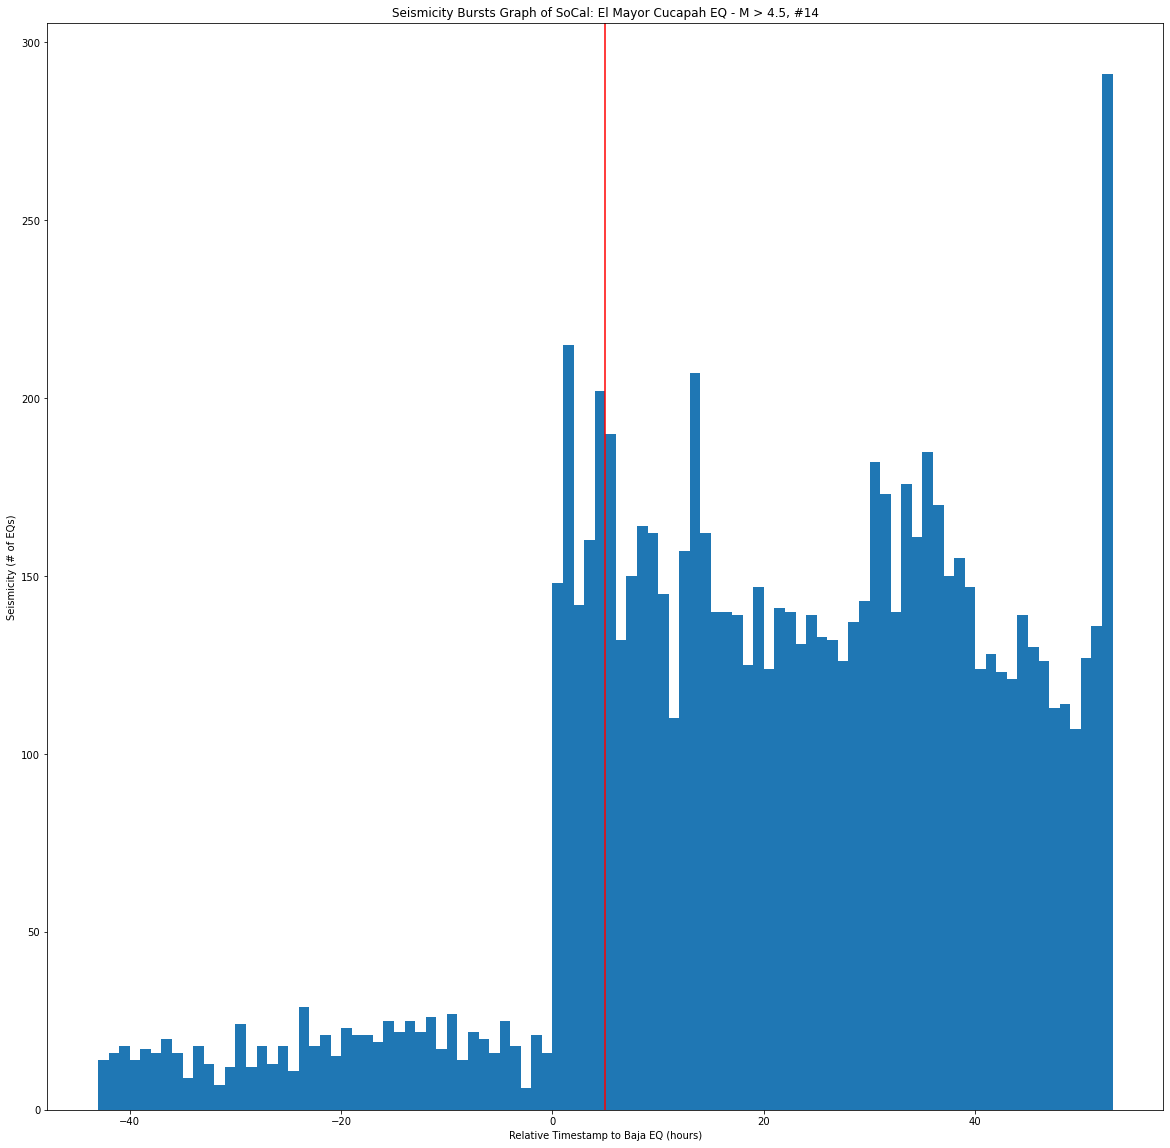

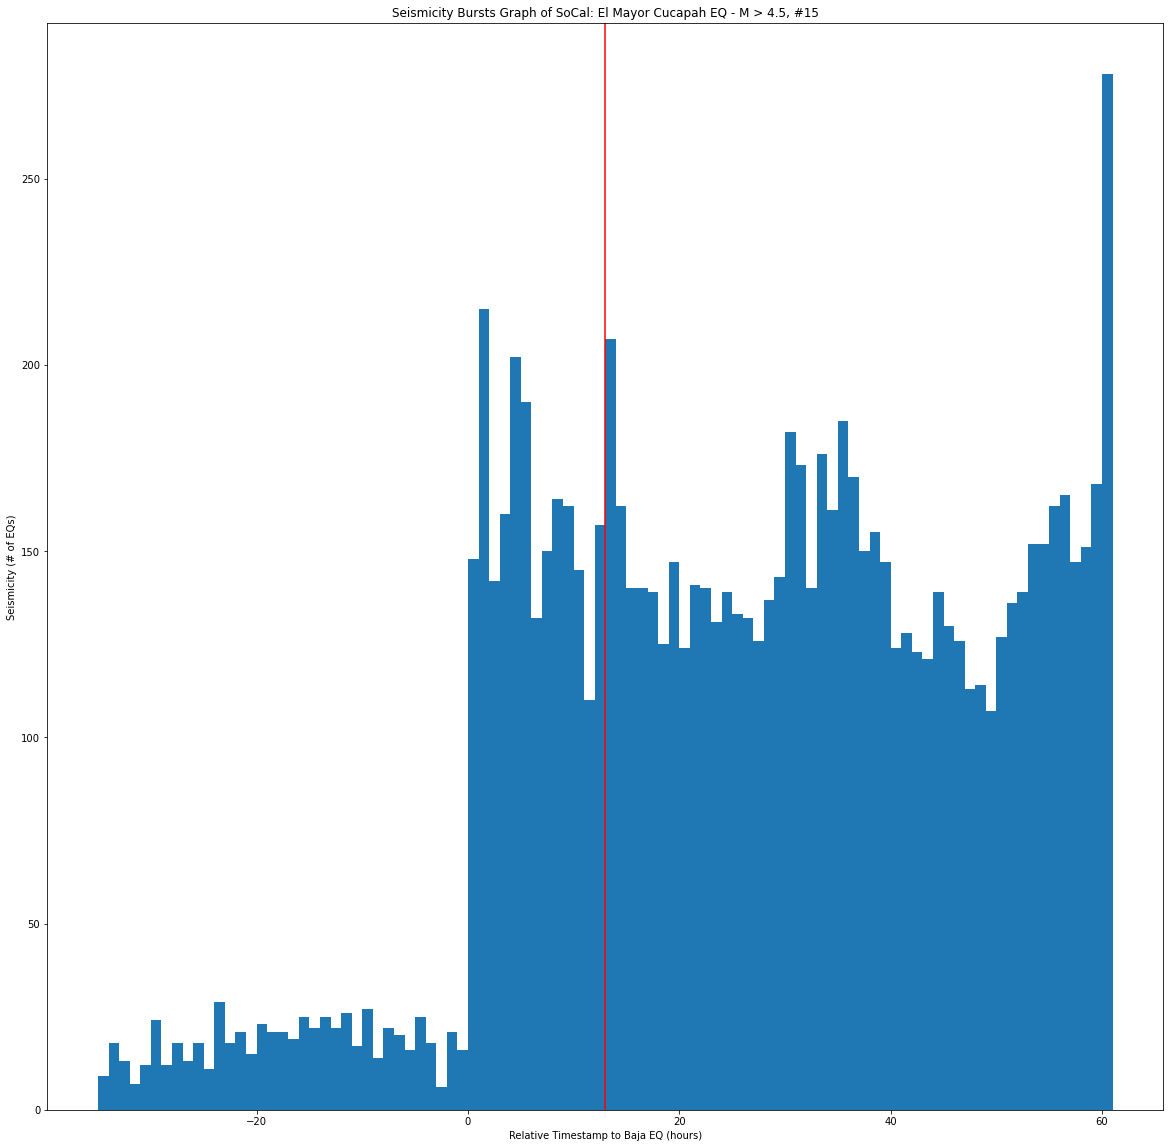

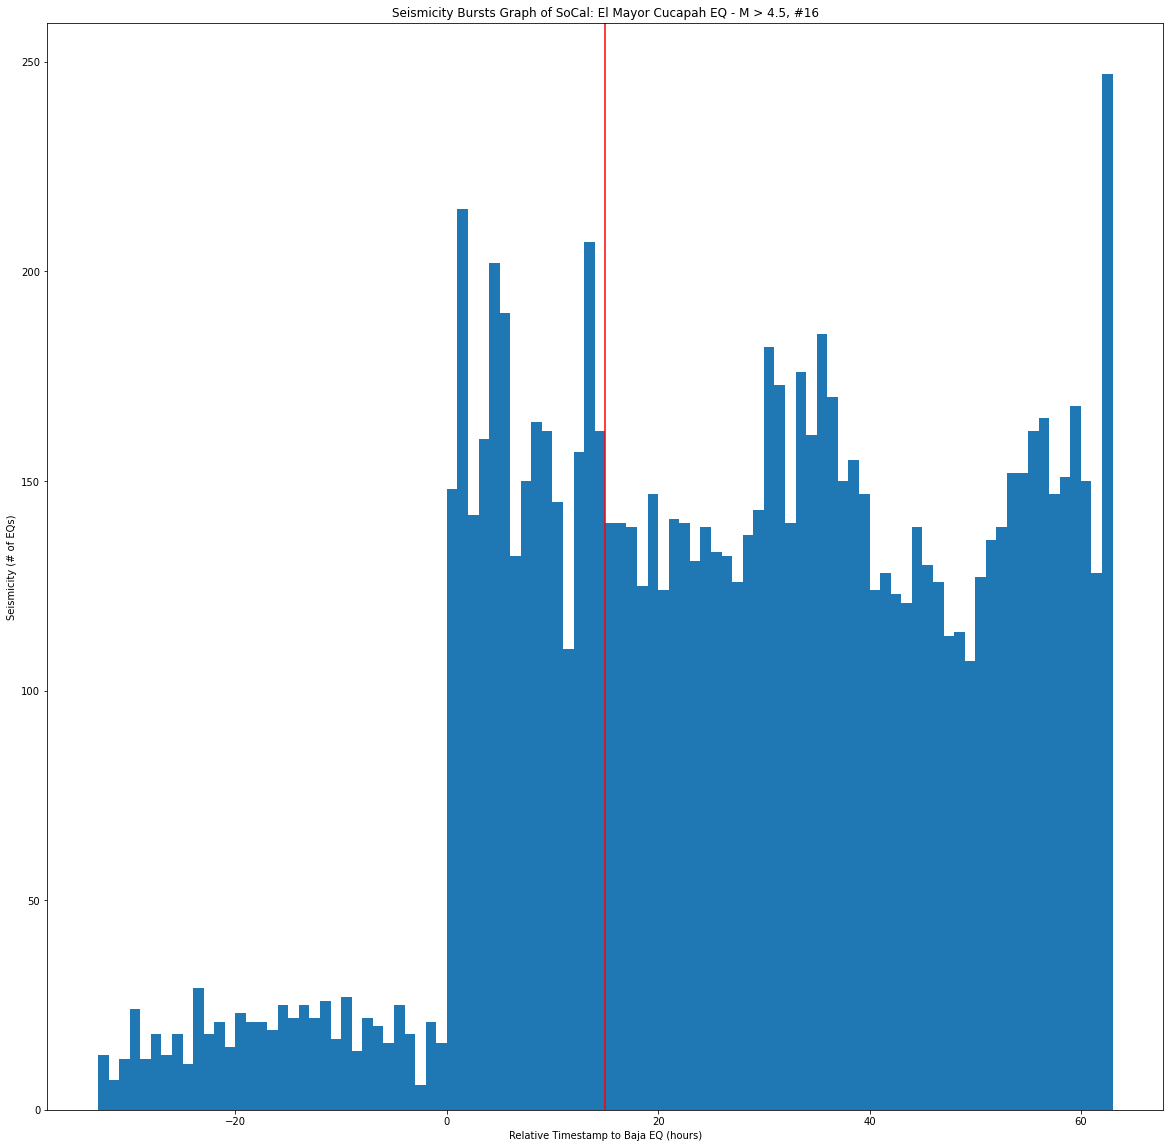

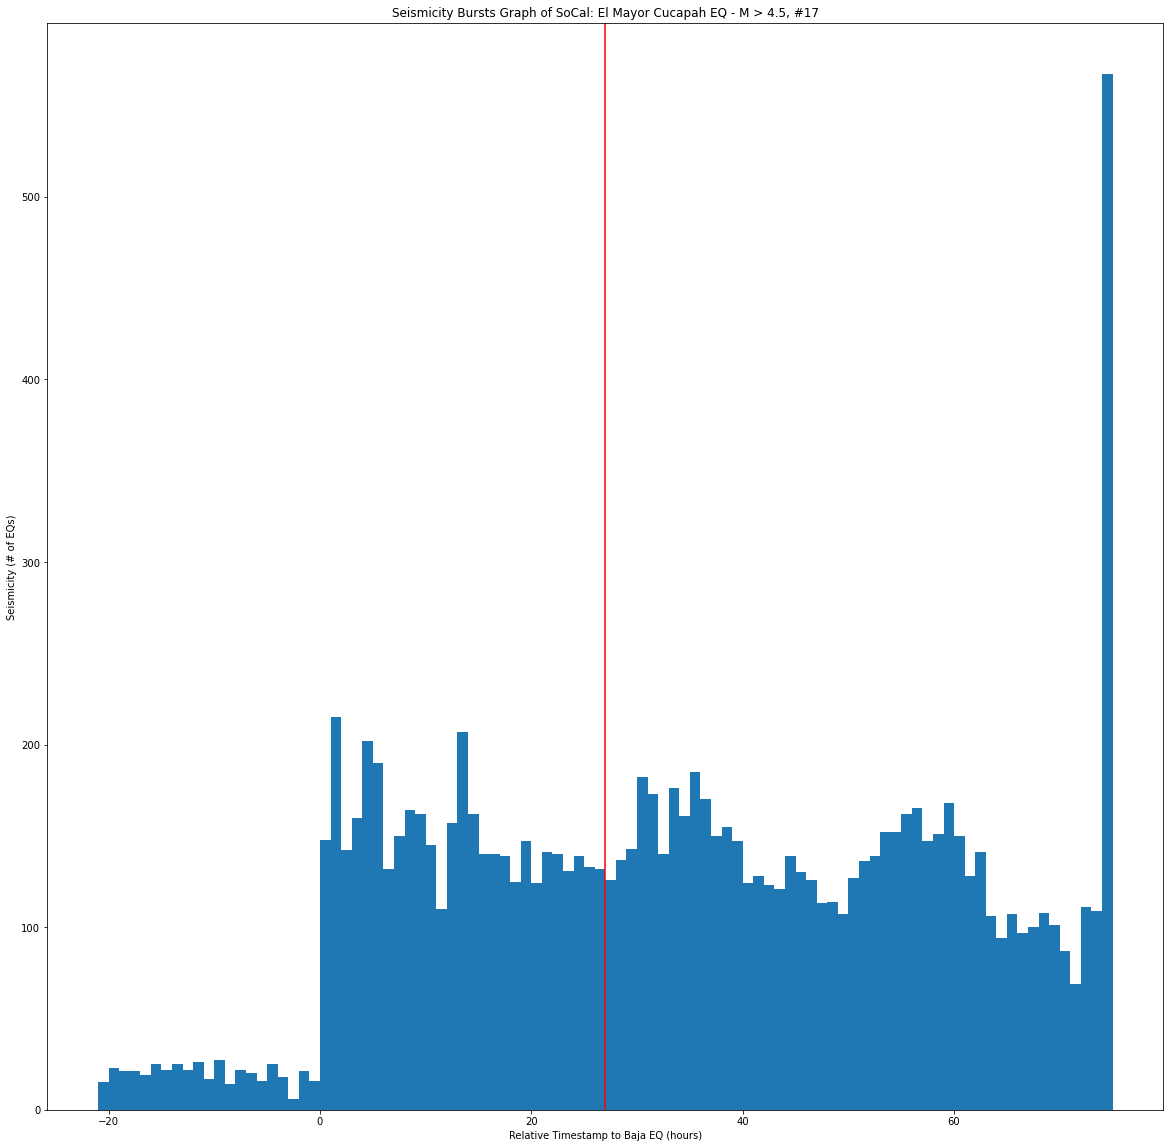

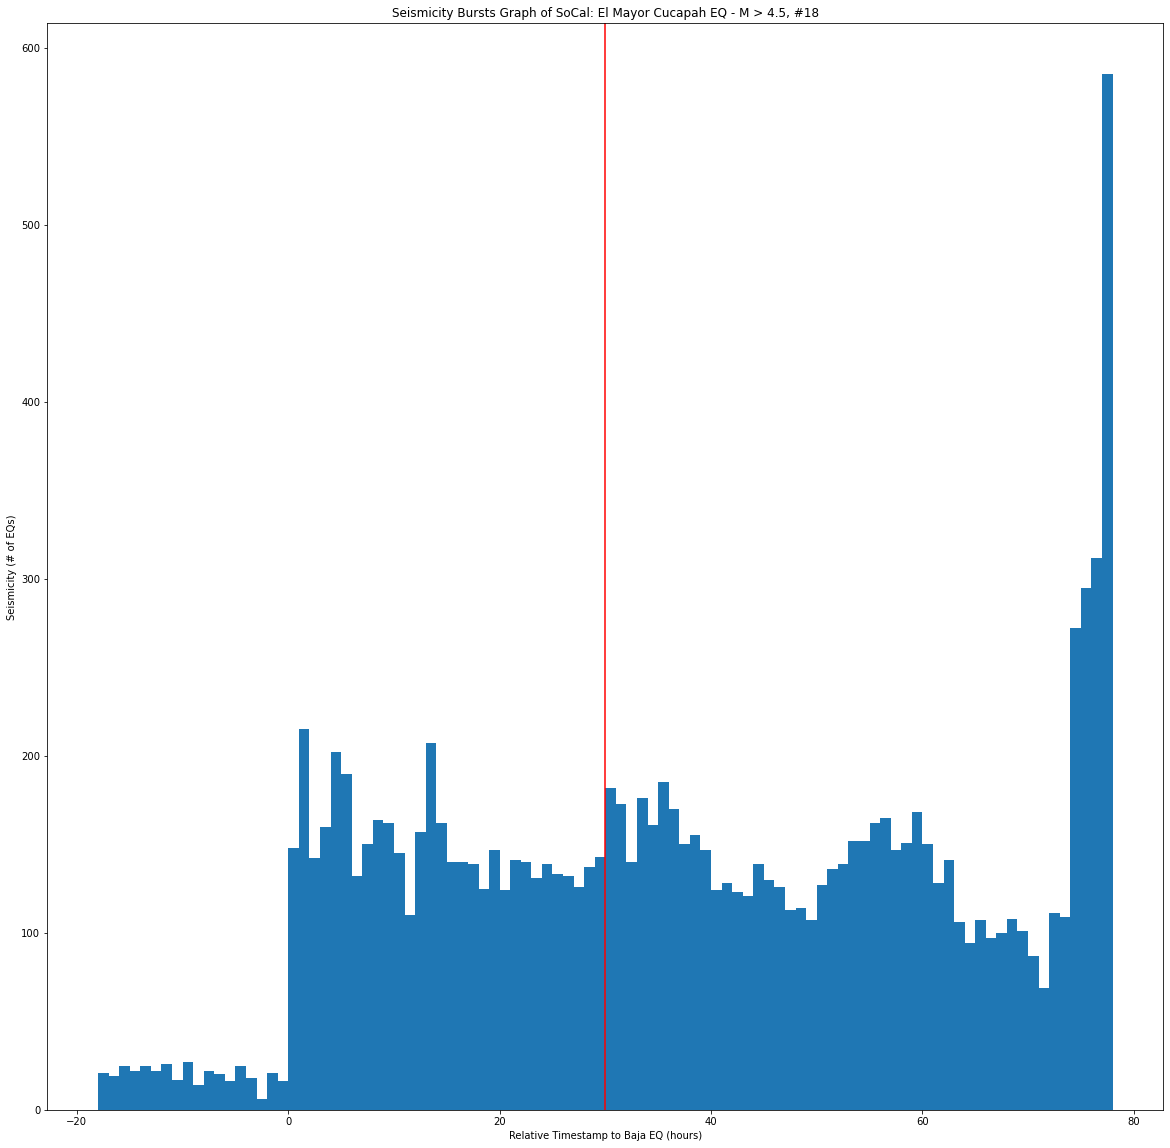

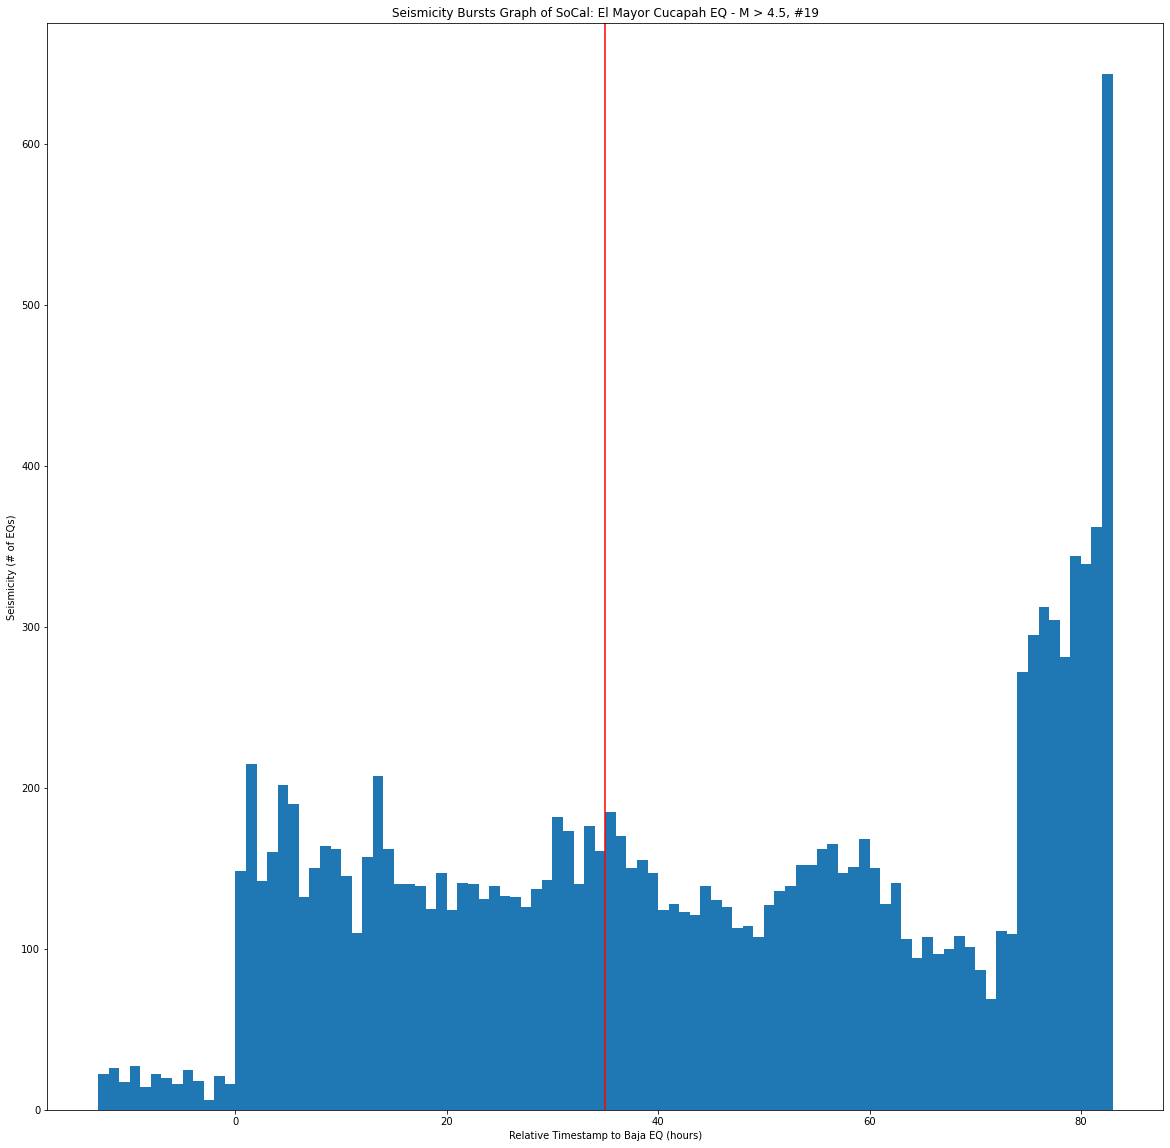

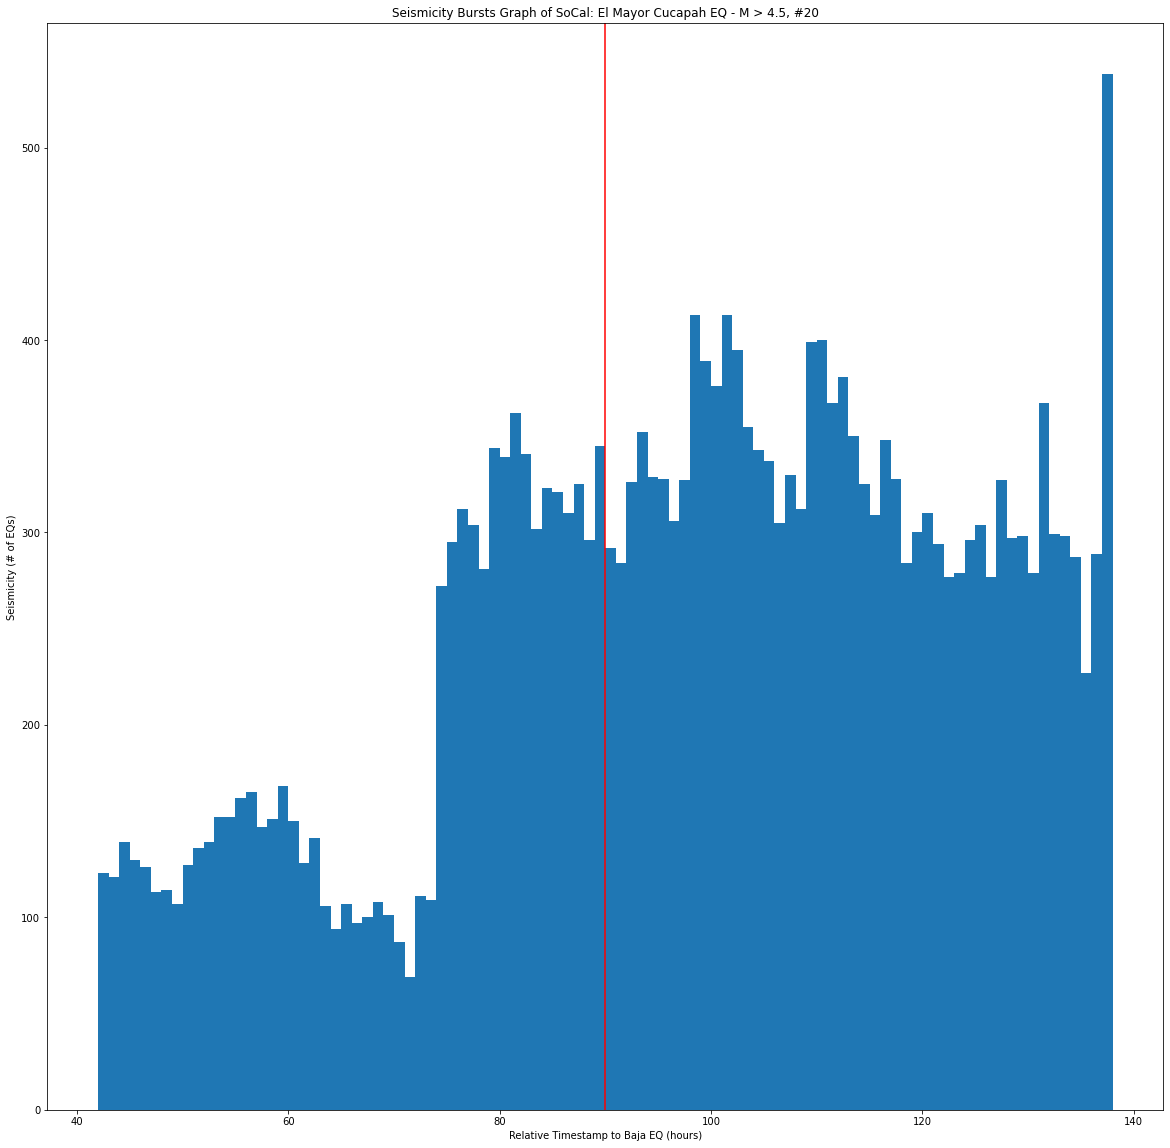

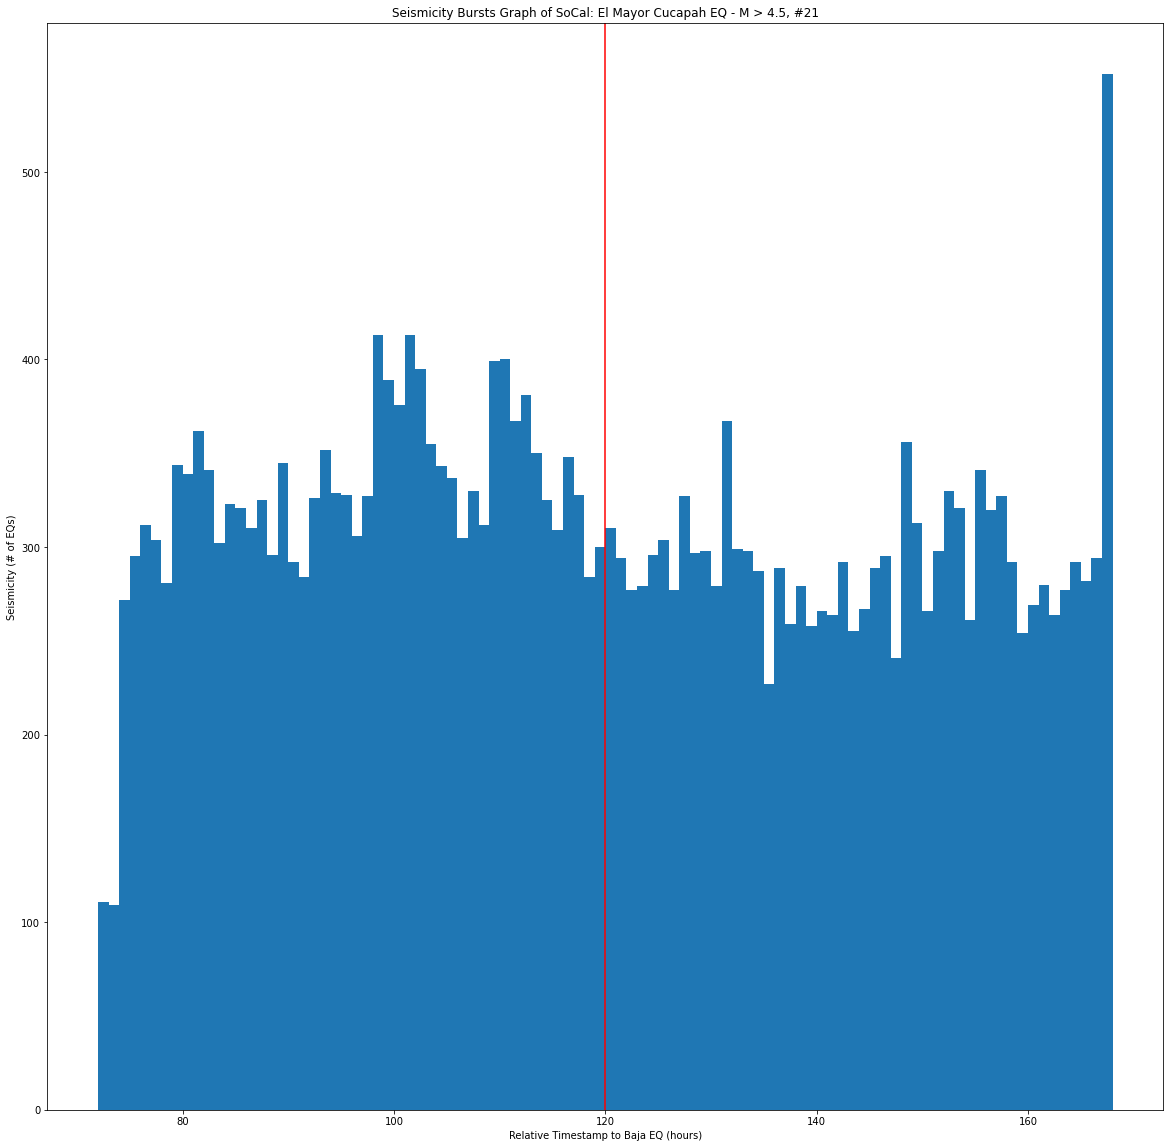

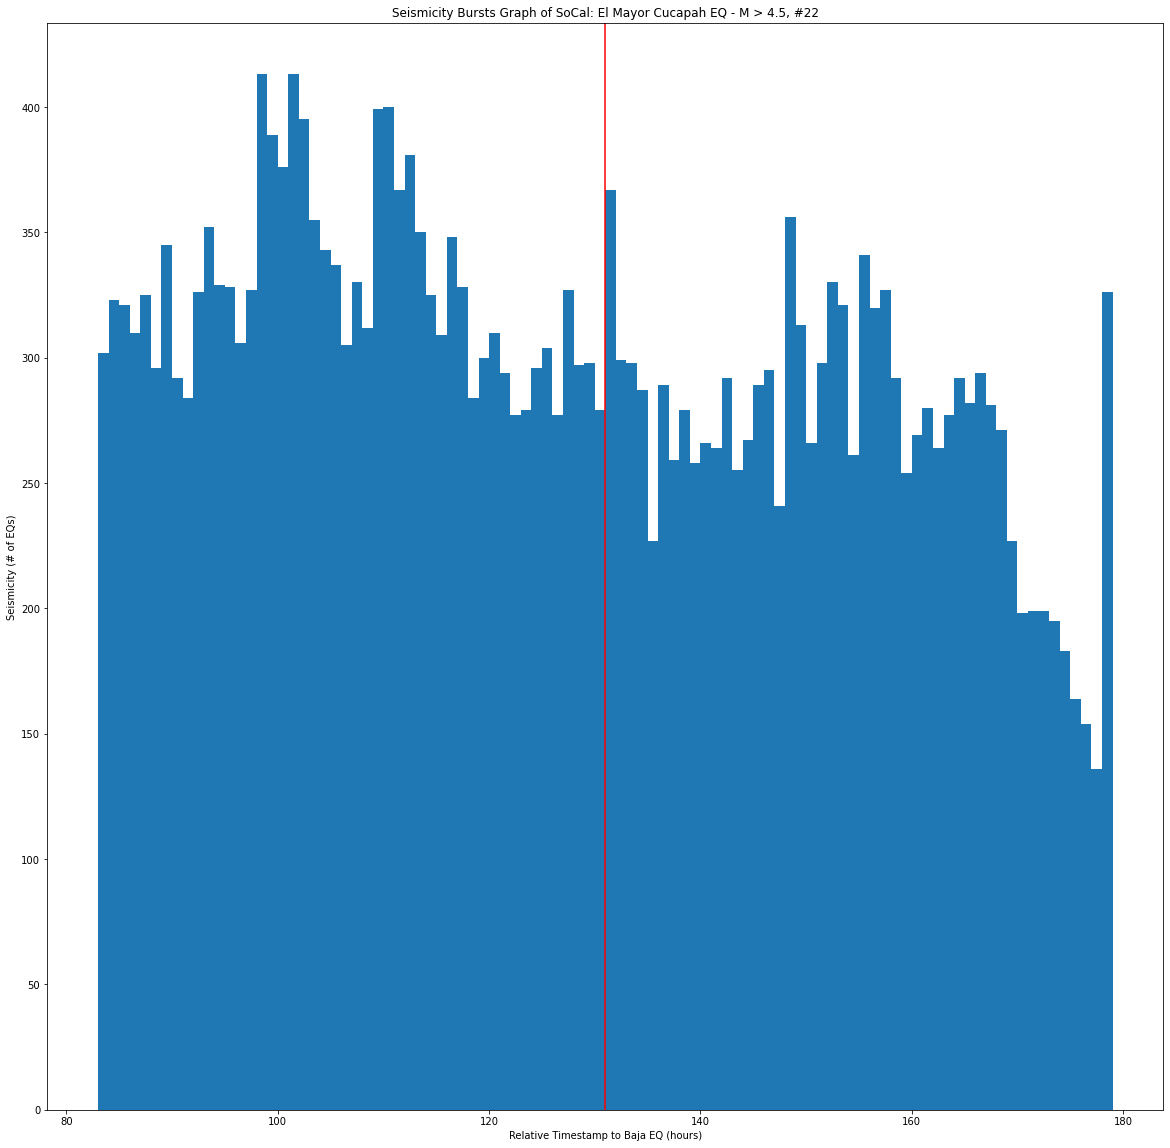

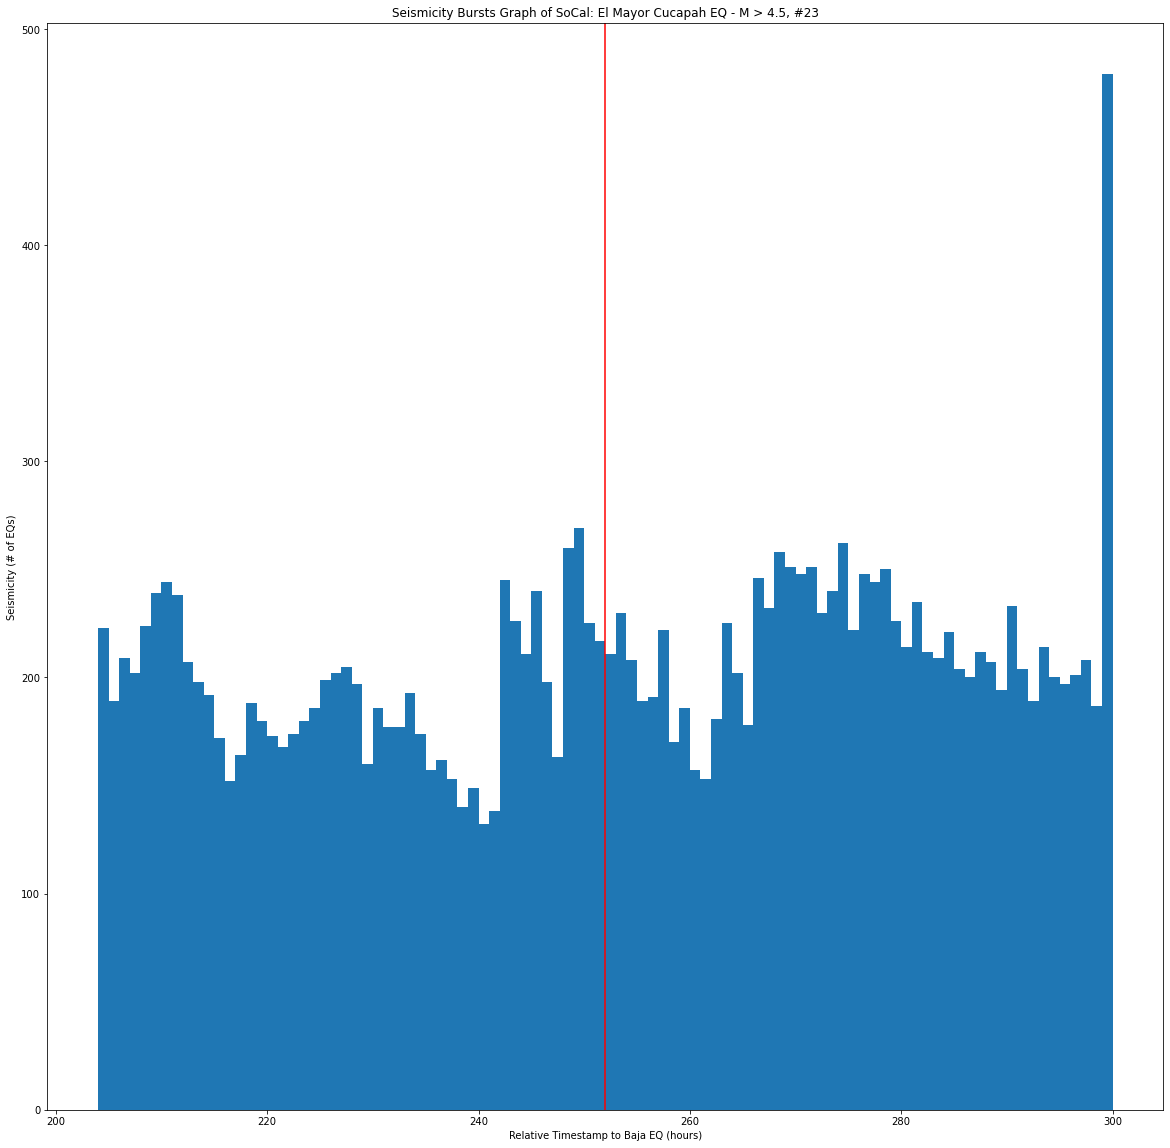

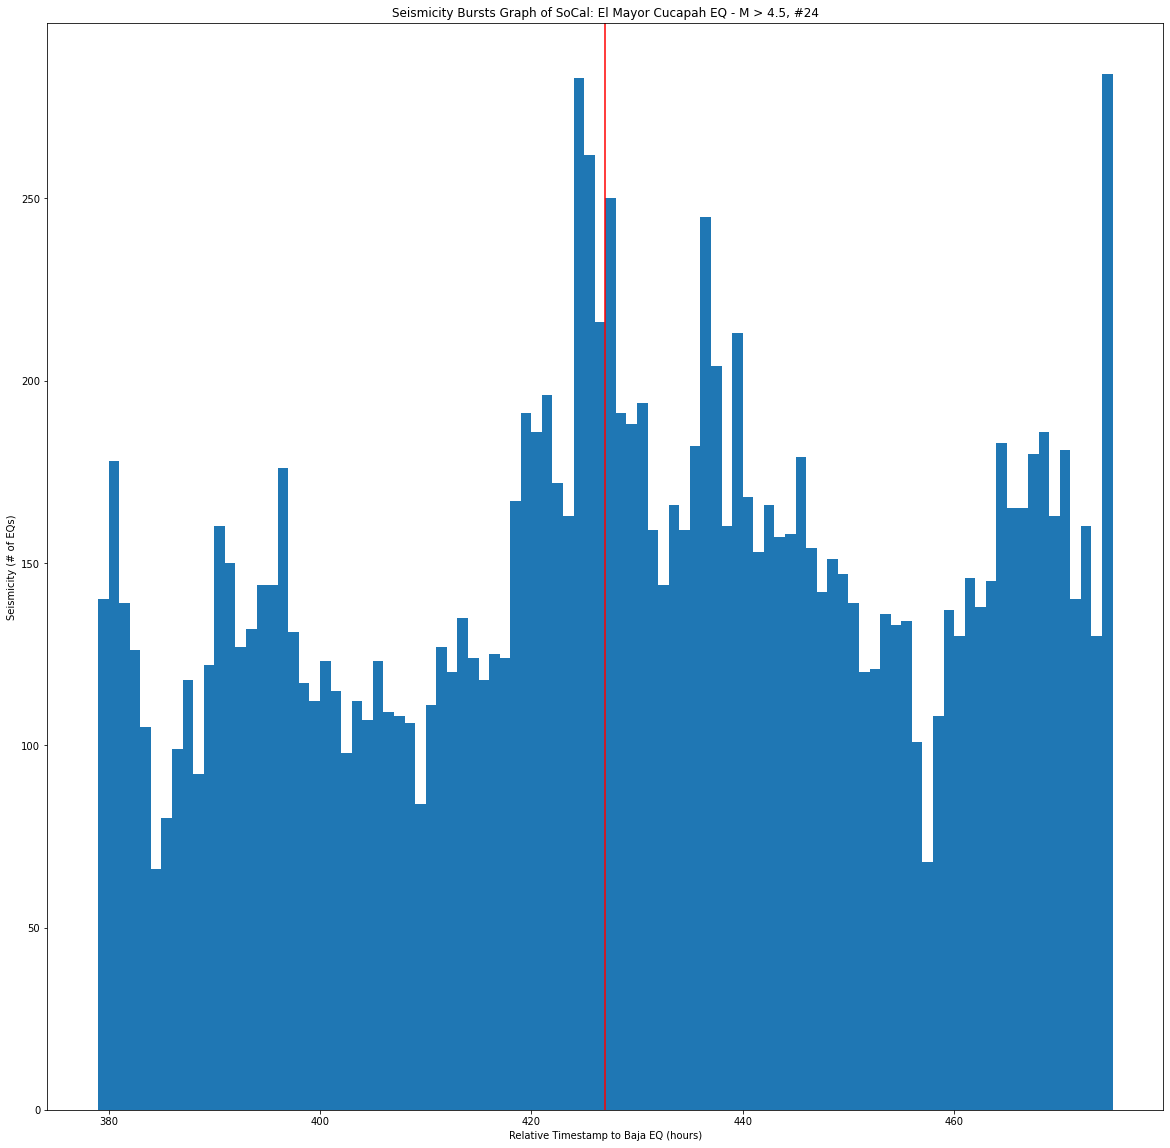

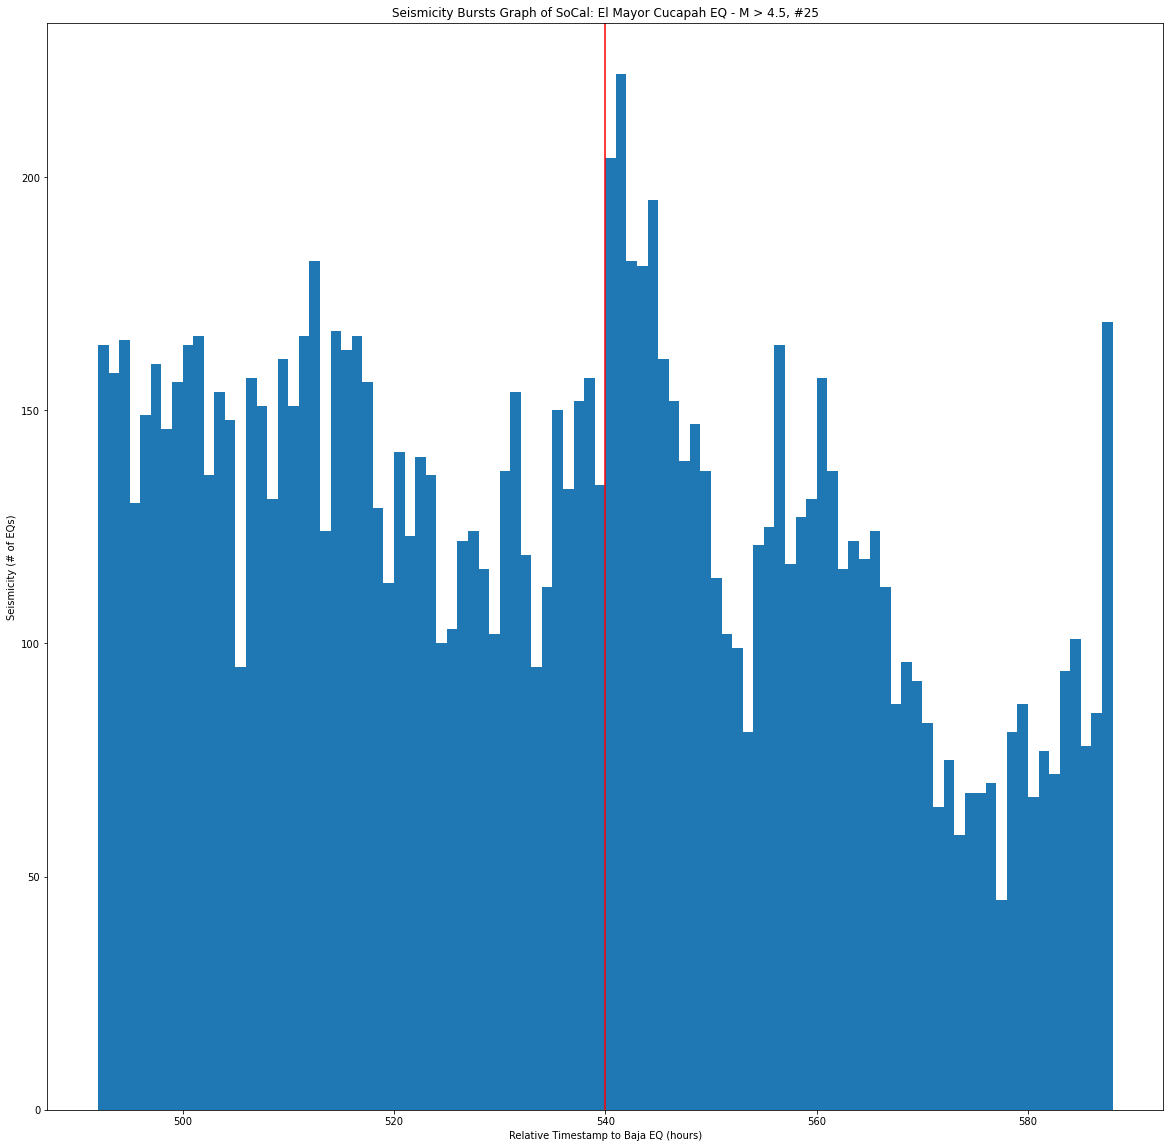

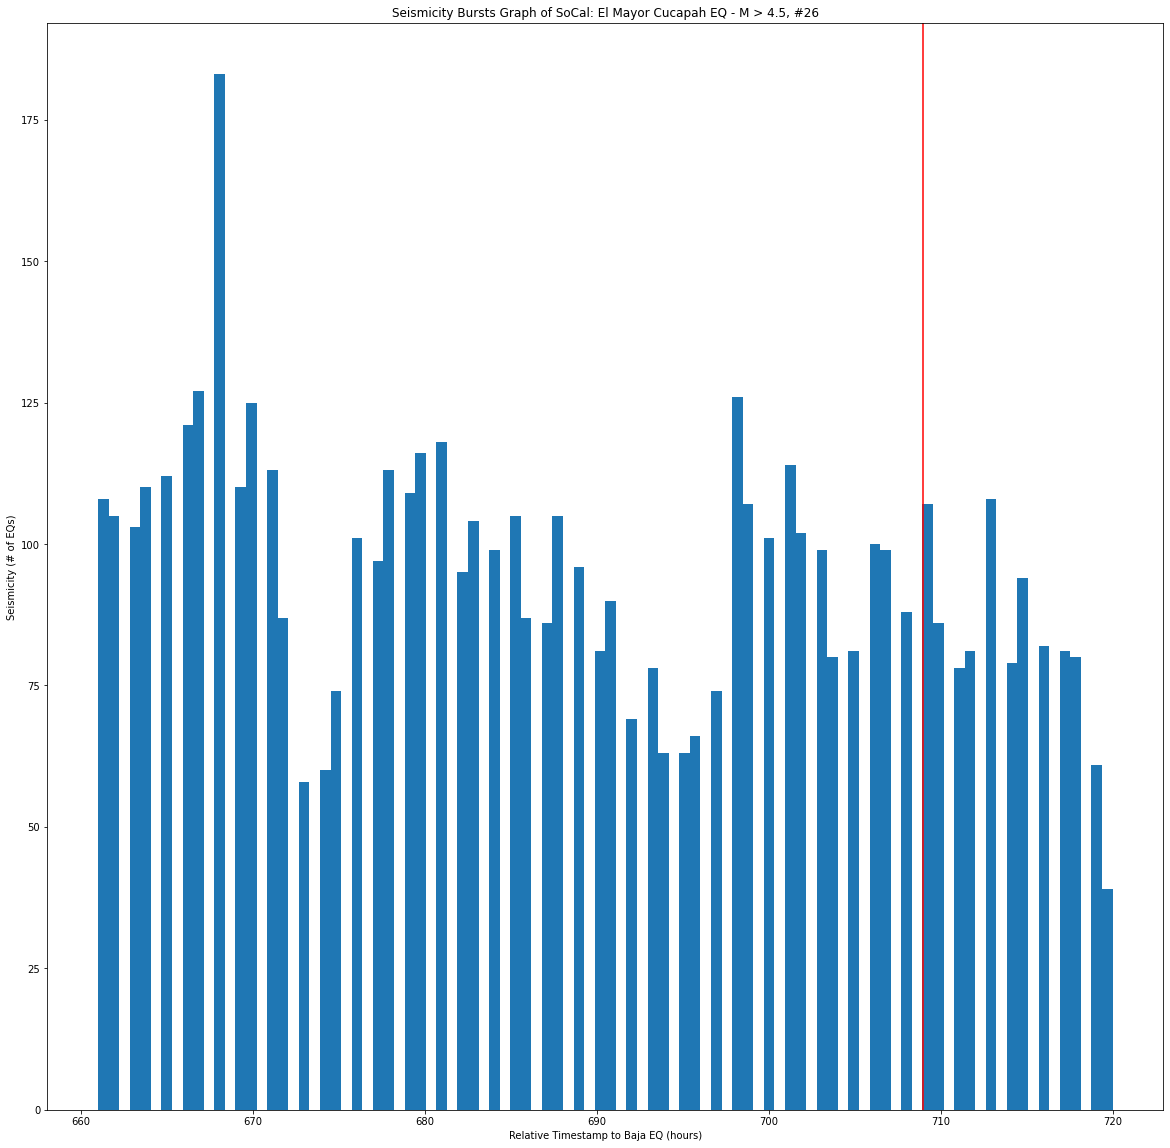

In [31]:
%%time
# 1: Seismicity bursts
# Start with seismicity, hours
j = 1
for i in HighMag4_5["RELATIVE HOUR"]: # Loop through each M >= 4.5 EQ
    fig = plt.figure(figsize=(20,20)); # Without this line, would use same plt plot
    QTM_SeisHrsBurstTEMP = QTM_Range.loc[QTM_Range["RELATIVE HOUR"] >= i - 48]
    QTM_SeisHrsBurstTEMP = QTM_SeisHrsBurstTEMP[QTM_SeisHrsBurstTEMP["RELATIVE HOUR"] <= i + 48]
    # Create temporary df to graph from each individual EQ
    plt.hist(QTM_SeisHrsBurstTEMP["RELATIVE HOUR"], bins = 4*24); # Histogram showing # EQs per relative day; 
    # the # of bins = # of hours, including day 0, when Baja EQ occurred
    plt.xlabel("Relative Timestamp to Baja EQ (hours)");
    plt.ylabel("Seismicity (# of EQs)");
    plt.title("Seismicity Bursts Graph of SoCal: El Mayor Cucapah EQ - M > 4.5, #" + str(j));
    #plt.xticks(np.arange(-48, 48, step = 2));
    plt.axvline(x = i, color = "r");
    plt.savefig("SeisHrsBursts_Hrs_4.5_" + str(j) + ".png", facecolor = "white")
    j += 1

In [32]:
#for i in range(len(HighMag4_5)):
#    print(QTM_Range["VECTORIZATION"][i])
(row, column, pnum) = (1,1,1)
print(column, type(column))
#for i in HighMag4_5["TIMESTAMP"]:
#    print(i)

1 <class 'int'>


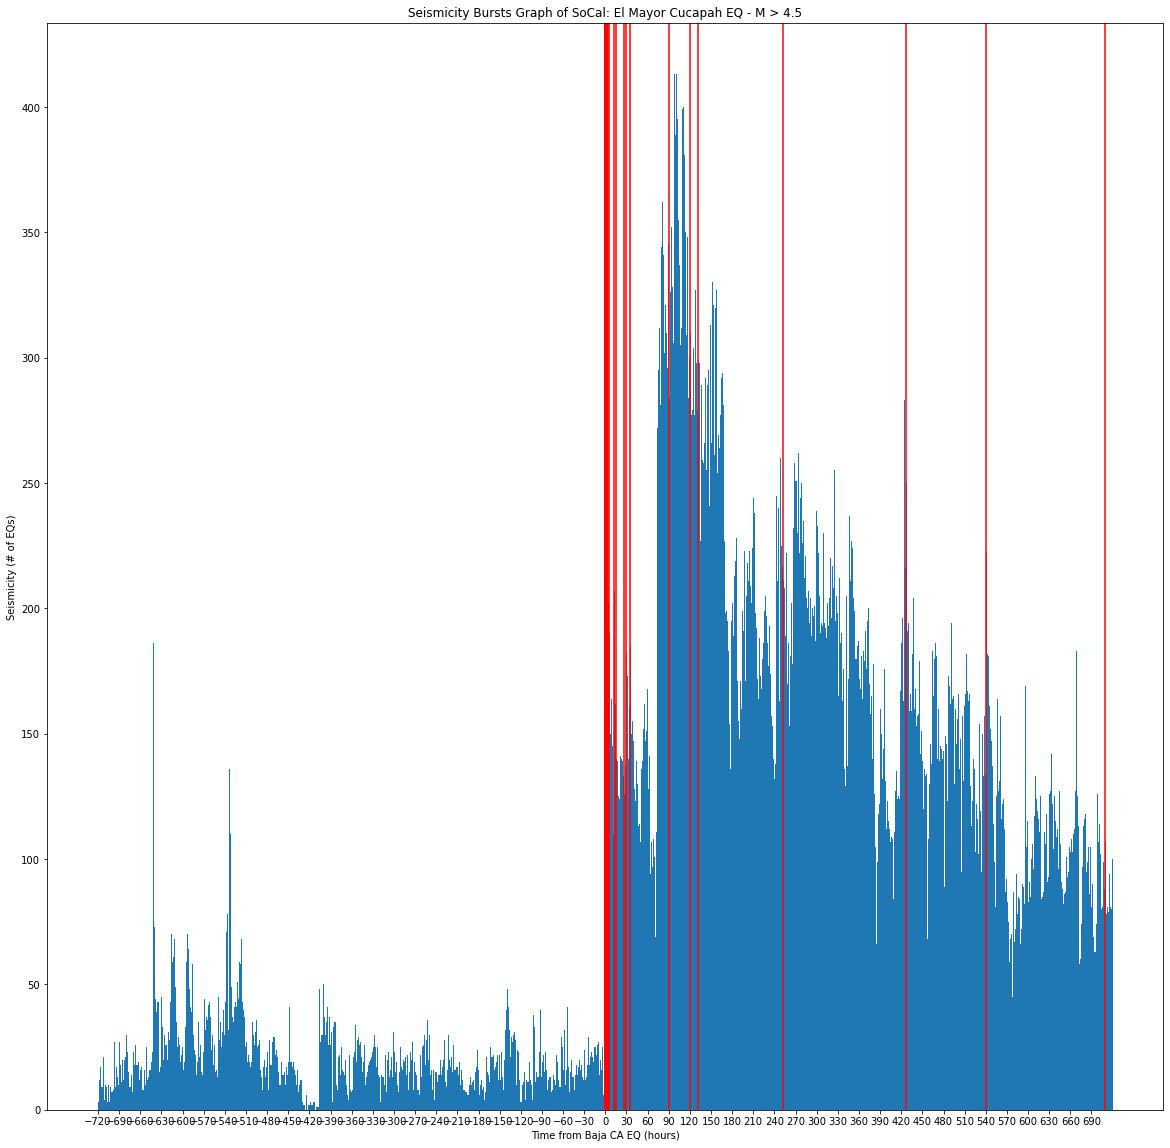

In [33]:
# 1: Seismicity bursts
# Start with seismicity, hours
plt.figure(figsize=(20,20))
plt.hist(QTM_Range["RELATIVE HOUR"], bins = 60*24); # Histogram showing # EQs per relative day; 
# the # of bins = # of hours, including day 0, when Baja EQ occurred
plt.xlabel("Time from Baja CA EQ (hours)");
plt.ylabel("Seismicity (# of EQs)");
plt.title("Seismicity Bursts Graph of SoCal: El Mayor Cucapah EQ - M > 4.5");
plt.xticks(np.arange(-720, 720, step = 30));

for i in HighMag4_5["RELATIVE HOUR"]:
    plt.axvline(x = i, color = "r");

plt.savefig("SeisHrsBursts_4.5_1.png", facecolor = "white")

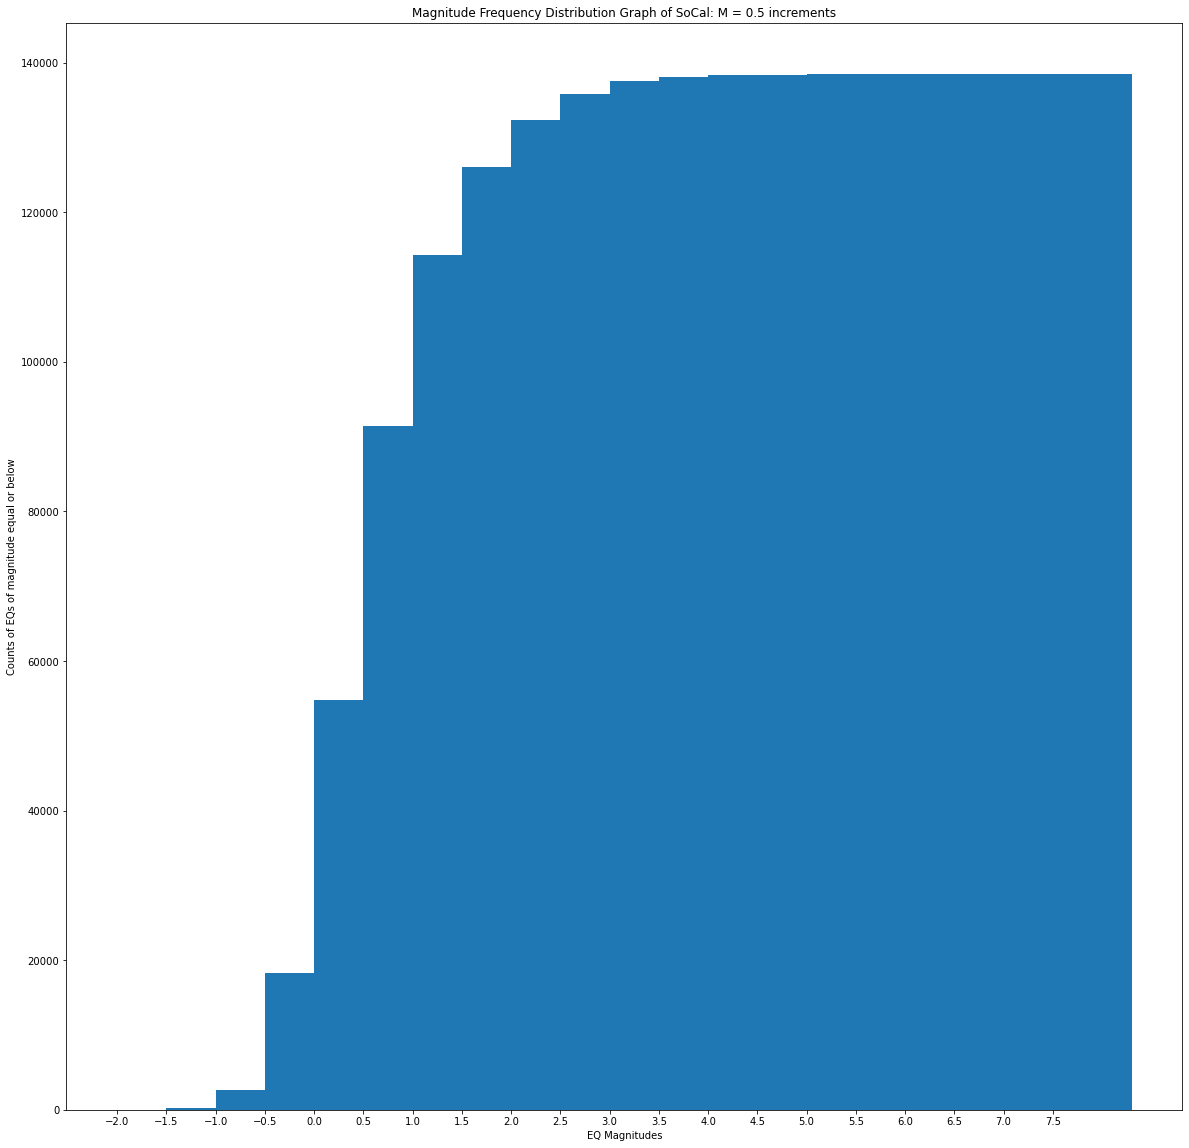

In [34]:
# 2: Magnitude frequency 
# EQ magnitudes vs. the number of EQs equal to or smaller than that magnitude
# Histogram? Try bar graph

MagList = np.arange(-2.0, 8.0, step = 0.5) # every magnitude from -2.0 to 8.0, increment by 0.5
MagFreqDistList = [] # Create a list of magnitudes' heights for the bar graph
for i in MagList: # Step through magnitudes
    temp = len(QTM_Range.loc[QTM_Range["MAGNITUDE"] <= i]) # temporary variable = count of EQs at or less than the M
    MagFreqDistList.append(temp) # append this count to our new list
#len(MagFreqDistList)
# This equals 20
plt.figure(figsize = (20, 20));
plt.bar(x = MagList, height = MagFreqDistList, align = "edge");
plt.xlabel("EQ Magnitudes");
plt.ylabel("Counts of EQs of magnitude equal or below");
plt.xticks(MagList);
plt.title("Magnitude Frequency Distribution Graph of SoCal: M = 0.5 increments");

plt.savefig("MagFreqDist.png", facecolor = "white");

In [35]:
%%time
# 2: Magnitude frequency 
# EQ magnitudes vs. the number of EQs equal to or smaller than that magnitude for Baja EQ range
# Histogram? Try bar graph

MagList2 = np.arange(-2.0, 8.0, step = 0.1) # every magnitude from -2.0 to 8.0, increment by 0.1
MagList2 = list(MagList2)
MagFreqDistList2 = [] # Create a list of magnitudes' heights for the bar graph
for i in MagList2: # Step through magnitudes
    temp = len(QTM_Range.loc[QTM_Range["MAGNITUDE"] <= i]) # temporary variable = count of EQs at or less than the M
    MagFreqDistList2.append(temp) # append this count to our new list
#len(MagFreqDistList2)
# This equals 20

Wall time: 3.11 s


In [36]:
MagList2[:10]
MagFreqDistList2[0:10]

[0, 10, 23, 48, 107, 195, 346, 627, 1024, 1668]

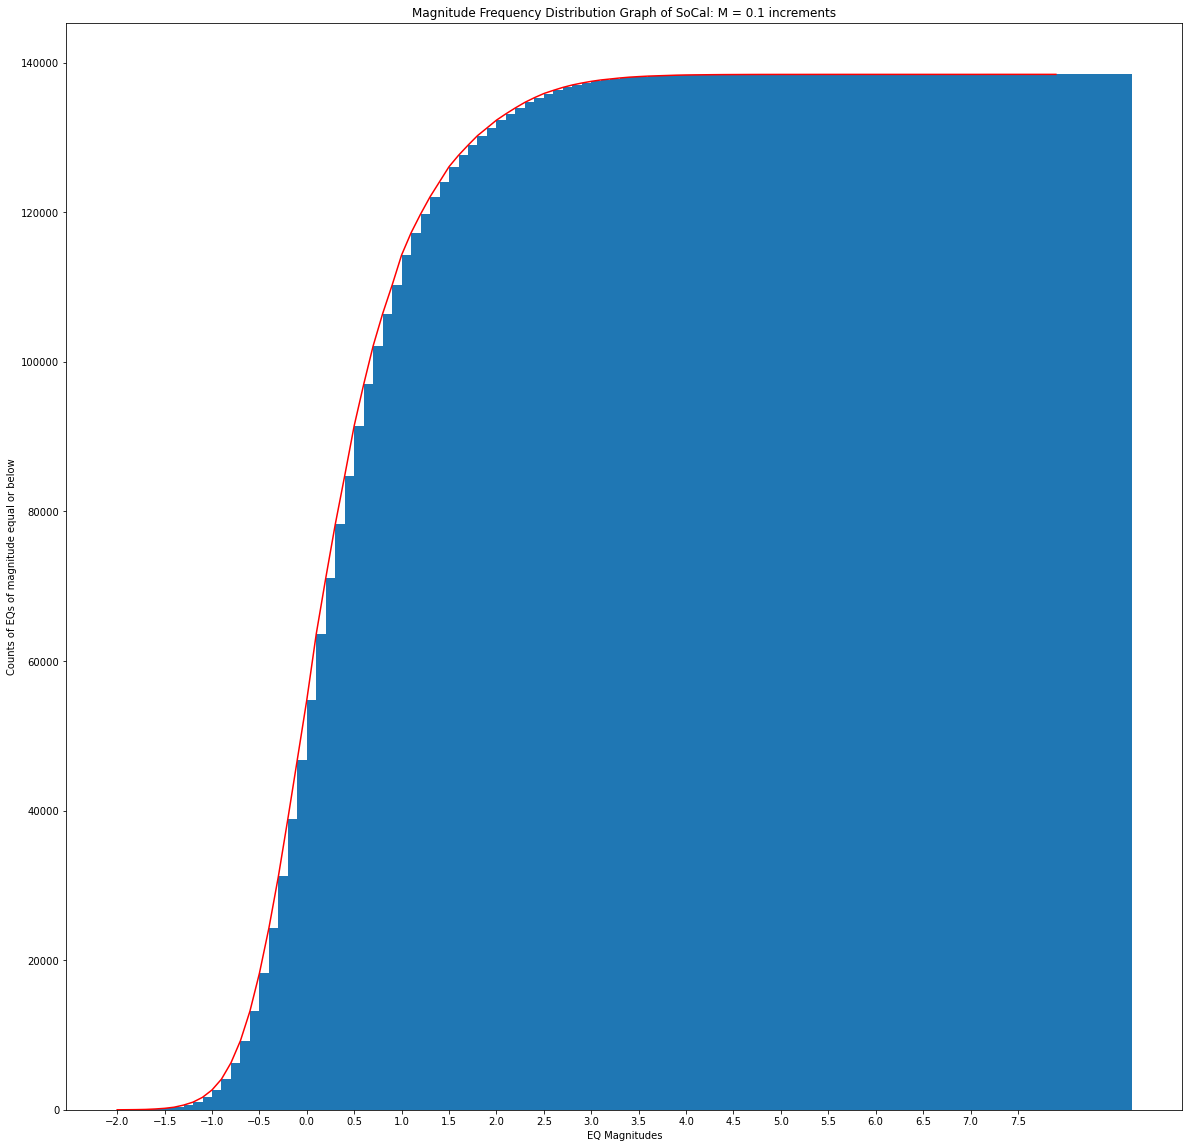

In [37]:
plt.figure(figsize = (20, 20));
plt.bar(x = MagList2, height = MagFreqDistList2, align = "edge");
plt.xlabel("EQ Magnitudes");
plt.ylabel("Counts of EQs of magnitude equal or below");
plt.xticks(np.arange(min(MagList2), max(MagList2), step = 0.5));
plt.title("Magnitude Frequency Distribution Graph of SoCal: M = 0.1 increments");

plt.plot(MagList2, MagFreqDistList2, color = "red");
# Seaborn kdeplot?
#sns.kdeplot(x = MagList2, label = "Seaborn best-fit", color = "red");
plt.savefig("MagFreqDist2.png", facecolor = "white");

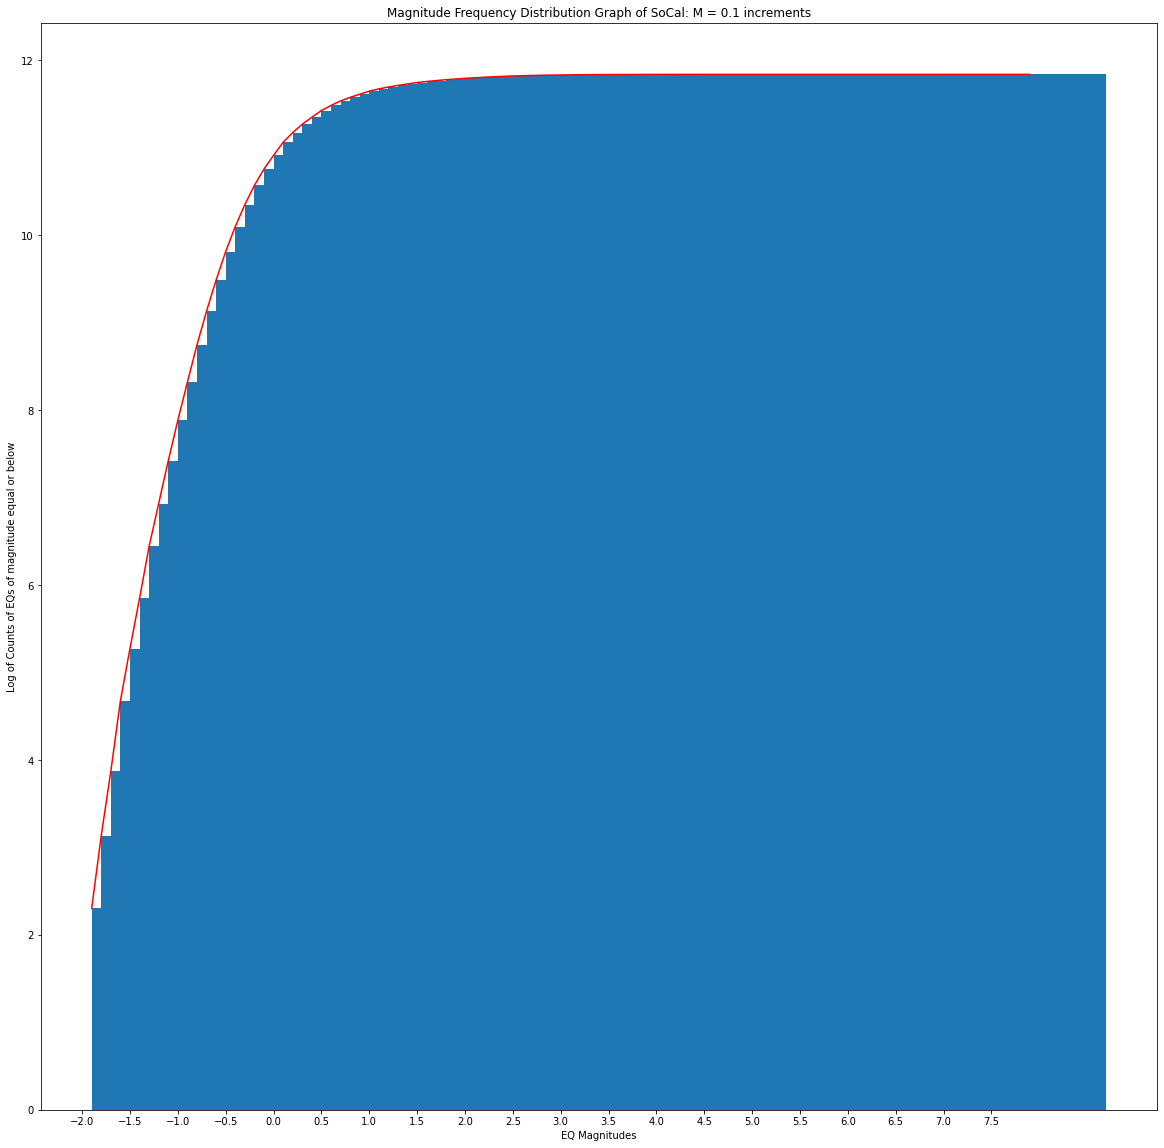

In [38]:
MagFreqDistList2LOG = np.log(MagFreqDistList2)

plt.figure(figsize = (20, 20));
plt.bar(x = MagList2, height = MagFreqDistList2LOG, align = "edge");
plt.xlabel("EQ Magnitudes");
plt.ylabel("Log of Counts of EQs of magnitude equal or below");
plt.xticks(np.arange(min(MagList2), max(MagList2), step = 0.5));
plt.title("Magnitude Frequency Distribution Graph of SoCal: M = 0.1 increments");

plt.plot(MagList2, MagFreqDistList2LOG, color = "red");
# Seaborn kdeplot?
#sns.kdeplot(x = MagList2, label = "Seaborn best-fit", color = "red");

plt.savefig("MagFreqDist3.png", facecolor = "white");

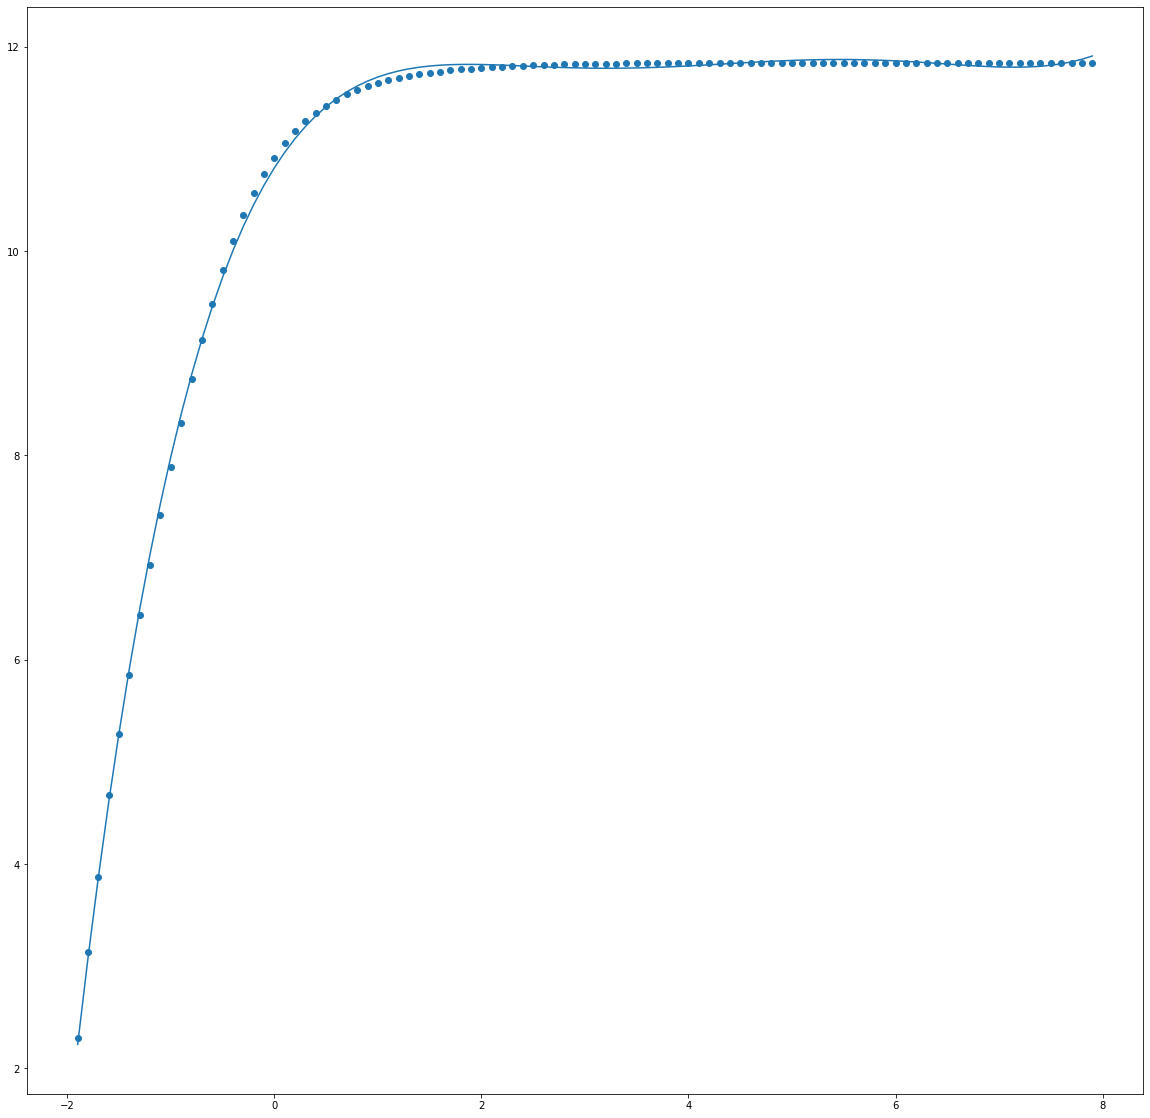

In [73]:
plt.figure(figsize = (20, 20));
plt.scatter(MagList2, MagFreqDistList2LOG);
YTemp = MagFreqDistList2
LogTemp = MagFreqDistList2LOG[1:].tolist()
ListTemp = MagList2[1:]
#LogTemp

# Use polyfit for five degree best fit line
Poly = np.polyfit(ListTemp, LogTemp, 5)
plt.plot(ListTemp, np.polyval(Poly, ListTemp));

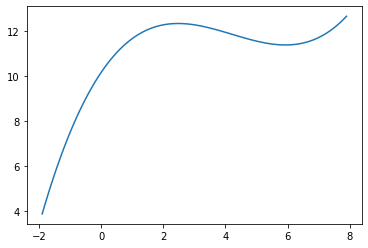

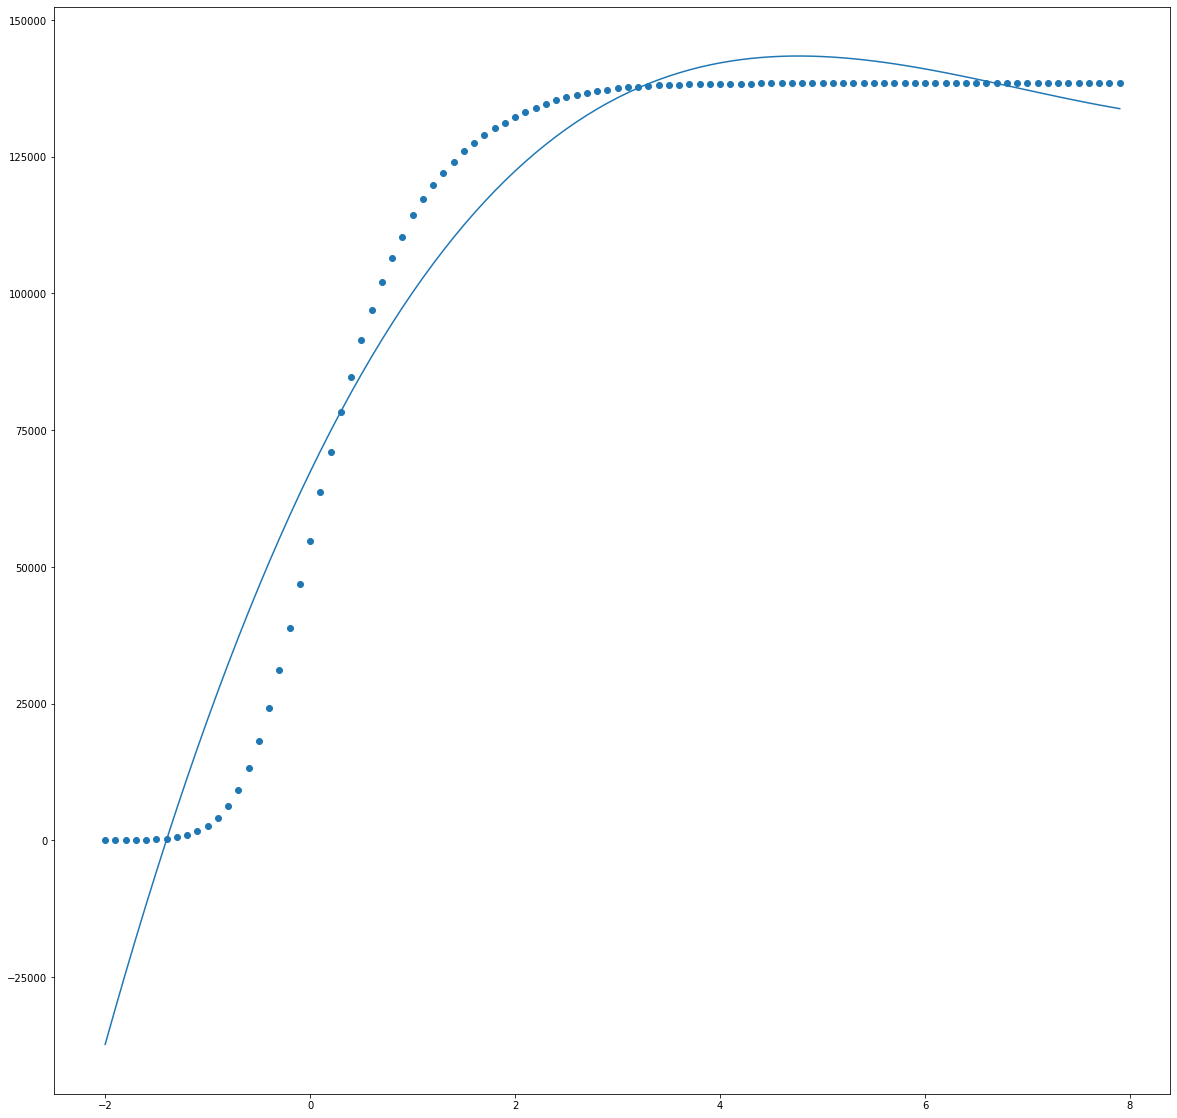

In [44]:
plt.figure(figsize = (20, 20));
plt.scatter(MagList2, MagFreqDistList2);
Poly = np.polyfit(MagList2, MagFreqDistList2, 3)
plt.plot(MagList2, np.polyval(Poly, MagList2));

In [50]:
# Throwaway test cell

Tester = UTCDateTime(2010, 4, 4, 22, 40, 42.222333)
type(Tester)
Tester.timestamp # This is the attribute I need
#type(QTM_TEST['MINUTE'][500000])
#print(type(UTCDateTime().timestamp))
#print(UTCDateTime()+5000)
#QTM_TEST_2.head()
#print(QTM_Range["YEAR"].index)
#QTM_Range["TIMESTAMP"]
MagFreqDistList2
MagFreqDistList2LOG.tolist()
LogTemp = MagFreqDistList2LOG[1:].tolist()
LogTemp

[2.302585092994046,
 3.1354942159291497,
 3.871201010907891,
 4.672828834461906,
 5.272999558563747,
 5.846438775057725,
 6.440946540632921,
 6.931471805599453,
 7.419380582918692,
 7.88193748927207,
 8.318254328798846,
 8.744488113852924,
 9.130647603066935,
 9.486228164545253,
 9.811317437563998,
 10.097531796025063,
 10.347852809601848,
 10.56833813394096,
 10.754129814173721,
 10.911500215963228,
 11.061076046304535,
 11.171758224044796,
 11.267766339598339,
 11.347838535097829,
 11.42367886445601,
 11.482270362010594,
 11.534050746585176,
 11.5752615625526,
 11.610478582054515,
 11.646389355316524,
 11.671978394824828,
 11.693078004479343,
 11.712194269150917,
 11.728528659110452,
 11.744640178700104,
 11.75660078945385,
 11.767117969834745,
 11.776988286073301,
 11.784866799472464,
 11.792781997600715,
 11.799179017573213,
 11.805117352899838,
 11.810619747548735,
 11.815220249789855,
 11.819328697790642,
 11.822444858030988,
 11.825324539958846,
 11.827714306760283,
 11.82961035